In [1]:
import textacy
import pandas as pd
from functools import partial
import requests
import json
import spacy
import random
import math

In [2]:
df = pd.read_csv("blm.csv")

In [3]:
df.head()

,id,timestamp_utc,local_time,user_screen_name,text,possibly_sensitive,retweet_count,like_count,reply_count,lang,...,place_type,place_coordinates,links,domains,media_urls,media_files,media_types,mentioned_names,mentioned_ids,hashtags
0,1300582130309890049,1598917918,2020-08-31T23:51:58,holysmokerocks,@parkhILLMATIC89 Your post is so right on! 👊🏼\...,0,0,0,0,en,...,city,"[-70.281704, 43.692941, -70.197961, 43.748681]",https://open.spotify.com/track/3WXxJBZn765OqVo...,NaN,NaN,NaN,NaN,parkhILLMATIC89,820697577792438273,BlackLivesMatter|ICantBreathe|Spotify|WeWillVote
1,1300581605036220417,1598917792,2020-08-31T23:49:52,sevenstepsup,I cried like a fucking baby watching this vid....,0,0,1,0,en,...,city,"[-86.213904, 43.043093, -86.115054, 43.117833]",https://twitter.com/ProjectLincoln/status/1300...,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter
2,1300108216051871745,1598804928,2020-08-30T16:28:48,ProjectLincoln,You don’t need to be black to be outraged. You...,0,73677,177831,4483,en,...,NaN,NaN,https://twitter.com/ProjectLincoln/status/1300...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1300580270337396737,1598917474,2020-08-31T23:44:34,lrlopez74,Black voices worth listening to. https://youtu...,0,0,0,0,en,...,city,"[-122.318673, 47.4071473, -122.241356, 47.5319...",https://www.instagram.com/p/CEkpSlpJk4U/|https...,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter|blackallianceforpeace|blackma...
4,1300579808104112129,1598917364,2020-08-31T23:42:44,CaseyyMcGaw,"Does anyone know of any good small, Black owne...",0,3,13,3,en,...,city,"[-86.348441, 39.631677, -85.937404, 39.927448]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter


In [4]:
#Okay now i'm gonna analyse engagement overtime, first by focusing on likes, and then on retweets

In [5]:
from datetime import datetime

In [6]:
#I first aggregate by day

In [7]:
def date_to_datetime(d):
    return dt.datetime(d.year,d.month,d.day)

In [8]:
def groupby_date(df):
    dfc = df.copy()
    dfc['date'] = pd.to_datetime(dfc['timestamp_utc'], unit= 's')
    return dfc

In [9]:
df = groupby_date(df)

In [10]:
df.head()

,id,timestamp_utc,local_time,user_screen_name,text,possibly_sensitive,retweet_count,like_count,reply_count,lang,...,place_coordinates,links,domains,media_urls,media_files,media_types,mentioned_names,mentioned_ids,hashtags,date
0,1300582130309890049,1598917918,2020-08-31T23:51:58,holysmokerocks,@parkhILLMATIC89 Your post is so right on! 👊🏼\...,0,0,0,0,en,...,"[-70.281704, 43.692941, -70.197961, 43.748681]",https://open.spotify.com/track/3WXxJBZn765OqVo...,NaN,NaN,NaN,NaN,parkhILLMATIC89,820697577792438273,BlackLivesMatter|ICantBreathe|Spotify|WeWillVote,2020-08-31 23:51:58
1,1300581605036220417,1598917792,2020-08-31T23:49:52,sevenstepsup,I cried like a fucking baby watching this vid....,0,0,1,0,en,...,"[-86.213904, 43.043093, -86.115054, 43.117833]",https://twitter.com/ProjectLincoln/status/1300...,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter,2020-08-31 23:49:52
2,1300108216051871745,1598804928,2020-08-30T16:28:48,ProjectLincoln,You don’t need to be black to be outraged. You...,0,73677,177831,4483,en,...,NaN,https://twitter.com/ProjectLincoln/status/1300...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-30 16:28:48
3,1300580270337396737,1598917474,2020-08-31T23:44:34,lrlopez74,Black voices worth listening to. https://youtu...,0,0,0,0,en,...,"[-122.318673, 47.4071473, -122.241356, 47.5319...",https://www.instagram.com/p/CEkpSlpJk4U/|https...,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter|blackallianceforpeace|blackma...,2020-08-31 23:44:34
4,1300579808104112129,1598917364,2020-08-31T23:42:44,CaseyyMcGaw,"Does anyone know of any good small, Black owne...",0,3,13,3,en,...,"[-86.348441, 39.631677, -85.937404, 39.927448]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter,2020-08-31 23:42:44


In [11]:
df.tail()

,id,timestamp_utc,local_time,user_screen_name,text,possibly_sensitive,retweet_count,like_count,reply_count,lang,...,place_coordinates,links,domains,media_urls,media_files,media_types,mentioned_names,mentioned_ids,hashtags,date
176172,1264945272846725127,1590421429,2020-05-25T15:43:49,VolviEinhorn,@ShlomoFelber Police are nothing but ppl who a...,0,0,0,0,en,...,"[-74.041878, 40.570842, -73.855673, 40.739434]",NaN,NaN,NaN,NaN,NaN,ShlomoFelber,1259485461384437760,BlackLivesMatter|Chasidimlivesmatter,2020-05-25 15:43:49
176173,1264932760227065857,1590418446,2020-05-25T14:54:06,SociologistRay,"On #MemorialDay, Black Americans continue to b...",0,4,8,1,en,...,"[-76.84041, 38.898935, -76.792664, 38.961303]",https://thehill.com/homenews/state-watch/49900...,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter|COVID19|MemorialDay|TuskegeeA...,2020-05-25 14:54:06
176174,1264745739340546050,1590373856,2020-05-25T02:30:56,CaliCre8ive,@californiaglow Thanks to @BLMLA @PplsCityCoun...,0,5,12,1,en,...,"[-118.668404, 33.704538, -118.155409, 34.337041]",NaN,NaN,NaN,NaN,NaN,BLMLA|GroundGameLA|PplsCityCouncil,2940882906|841881274352582656|1253939558514692098,BlackLivesMatter|CareNotCops|PeoplesBudgetLA,2020-05-25 02:30:56
176175,1264727378691076097,1590369479,2020-05-25T01:17:59,PoeticXJustin,Being black in America is the world’s most dan...,0,35,82,2,en,...,"[-88.18516, 41.630746, -88.0269003, 41.7359316]",https://twitter.com/PoeticXJustin/status/12647...,NaN,https://pbs.twimg.com/media/EY021jCWoAEy9qr.jp...,1264727378691076097_EY021jCWoAEy9qr.jpg|126472...,photo|photo|photo|photo,NaN,NaN,blacklivesmatter|blacman,2020-05-25 01:17:59
176176,1264720605275983878,1590367864,2020-05-25T00:51:04,megandoesnola,It’s great that when you call 311 to report no...,0,1,2,0,en,...,"[-90.137908, 29.889574, -89.884108, 30.075628]",NaN,NaN,NaN,NaN,NaN,NOPDNews,2792248836,blacklivesmatter,2020-05-25 00:51:04


In [12]:
df_a = df.groupby(pd.Grouper(key='date',freq='D'))['retweet_count'].sum()

In [13]:
type(df_a)

pandas.core.series.Series

In [14]:
df_a = df_a.to_frame()

In [15]:
df_a

,retweet_count
date,
2014-02-15,440
2014-02-16,0
2014-02-17,0
2014-02-18,0
2014-02-19,0
...,...
2020-08-27,2480466
2020-08-28,1155539
2020-08-29,2482909


In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

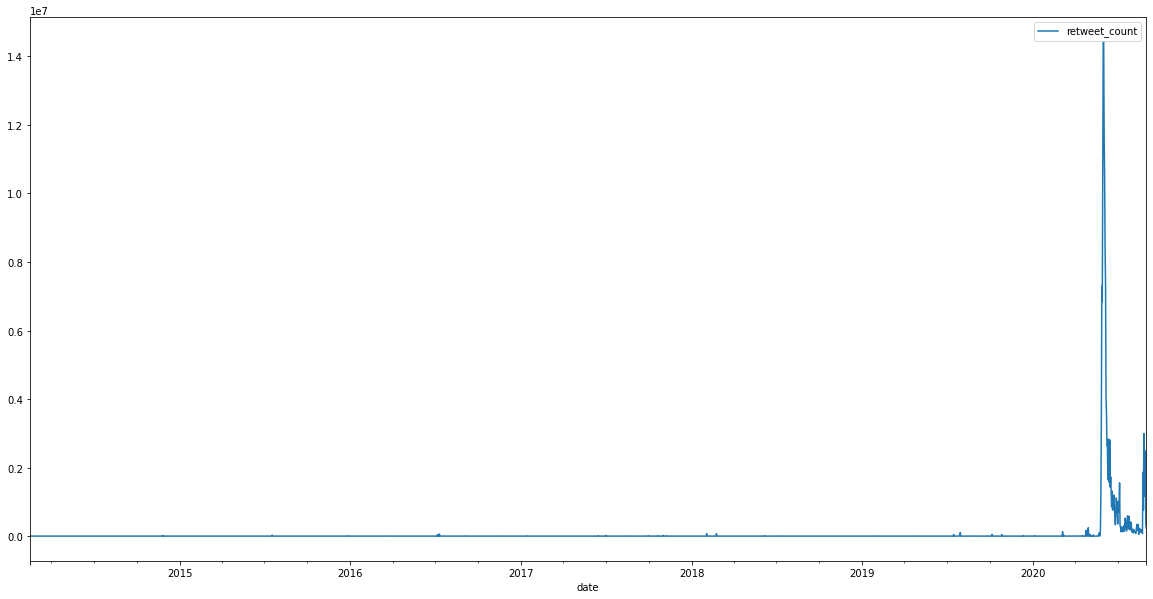

In [17]:
df_a.plot(figsize = (20,10))
plt.show()

In [18]:
df_a = df_a.loc['2020-05-25':'2020-08-31']

In [19]:
df_a.head()

,retweet_count
date,
2020-05-25,183311
2020-05-26,1239383
2020-05-27,3436116
2020-05-28,7290754
2020-05-29,6840276


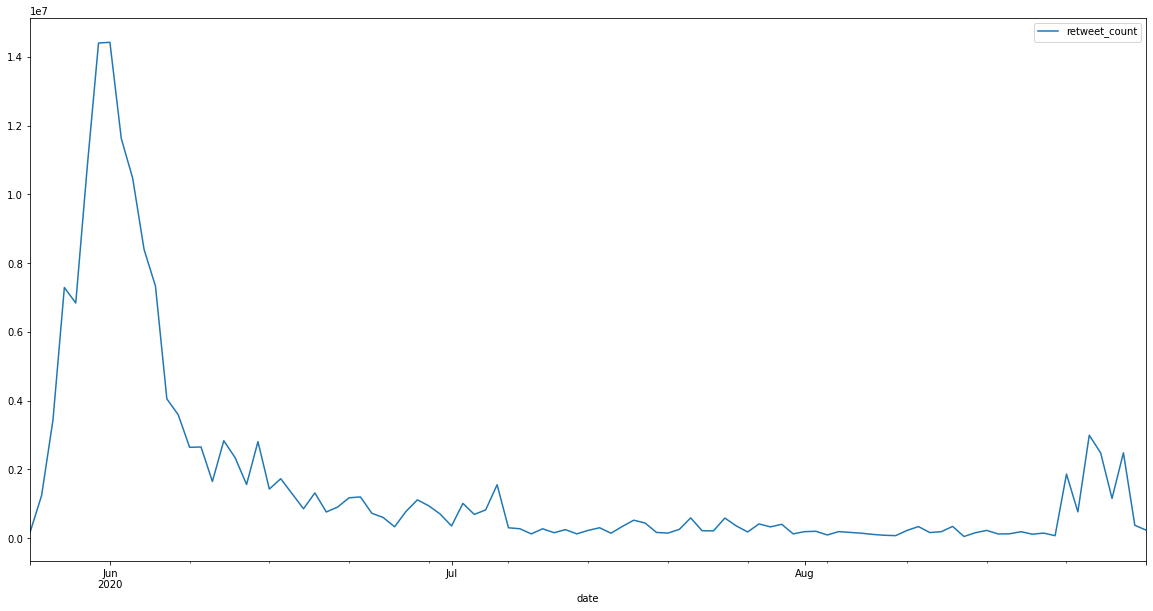

In [20]:
df_a.plot(figsize = (20,10))
plt.show()

In [21]:
df_begin = df_a.loc['2020-05-25':'2020-06-08']

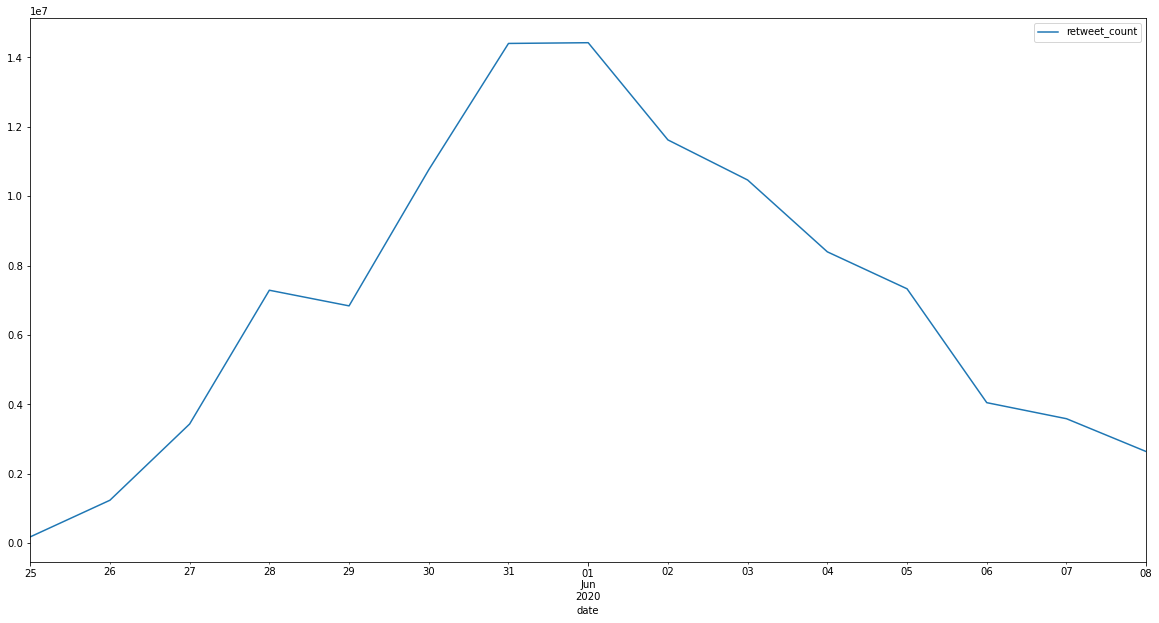

In [22]:
df_begin.plot(figsize = (20,10))
plt.show()

In [23]:
df_begin.describe()

,retweet_count
count,1.500000e+01
mean,7.111836e+06
std,4.559906e+06
min,1.833110e+05
25%,3.512352e+06
50%,7.290754e+06
75%,1.061491e+07
max,1.442300e+07


In [24]:
df_b = df.groupby(pd.Grouper(key='date',freq='D'))['user_followers'].mean()

In [25]:
df_b = df_b.to_frame()

In [26]:
df_b = df_b.loc['2020-05-25':'2020-08-31']

In [27]:
df_begin_b = df_b.loc['2020-05-25':'2020-06-08']

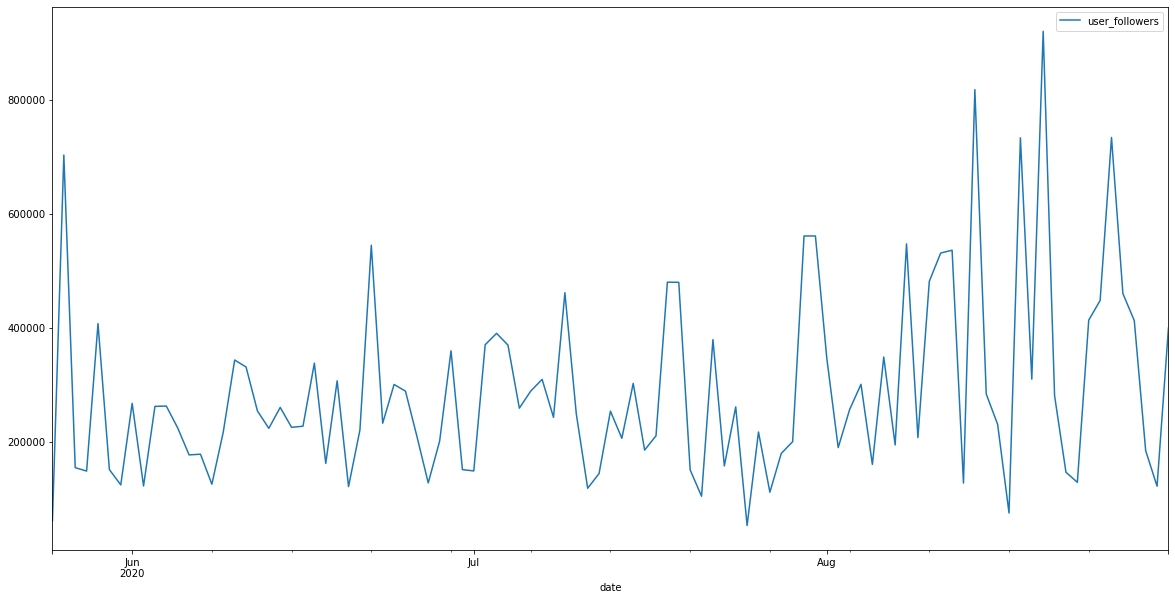

In [28]:
df_b.plot(figsize = (20,10))
plt.show()

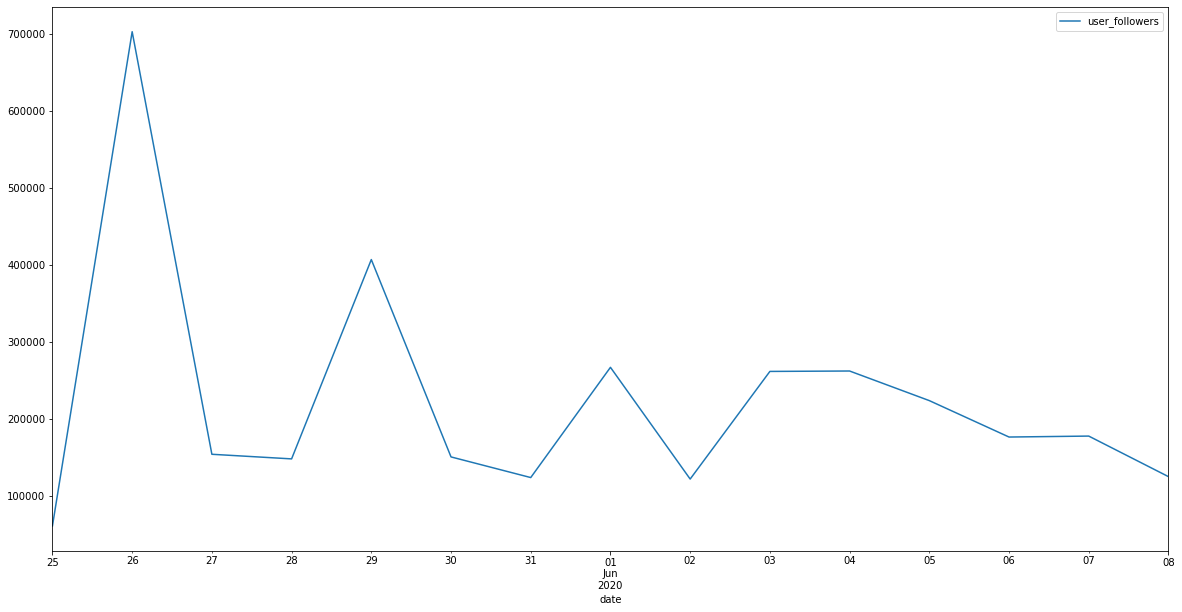

In [29]:
df_begin_b.plot(figsize = (20,10))
plt.show()

In [30]:
#Here we compute the volume of tweets
df_t = df.groupby(pd.Grouper(key='date',freq='D'))['user_name'].count()
df_t = df_t.to_frame()
df_t = df_t.loc['2020-05-25':'2020-08-31']
df_t.head()

,user_name
date,
2020-05-25,30
2020-05-26,558
2020-05-27,1680
2020-05-28,3381
2020-05-29,5149


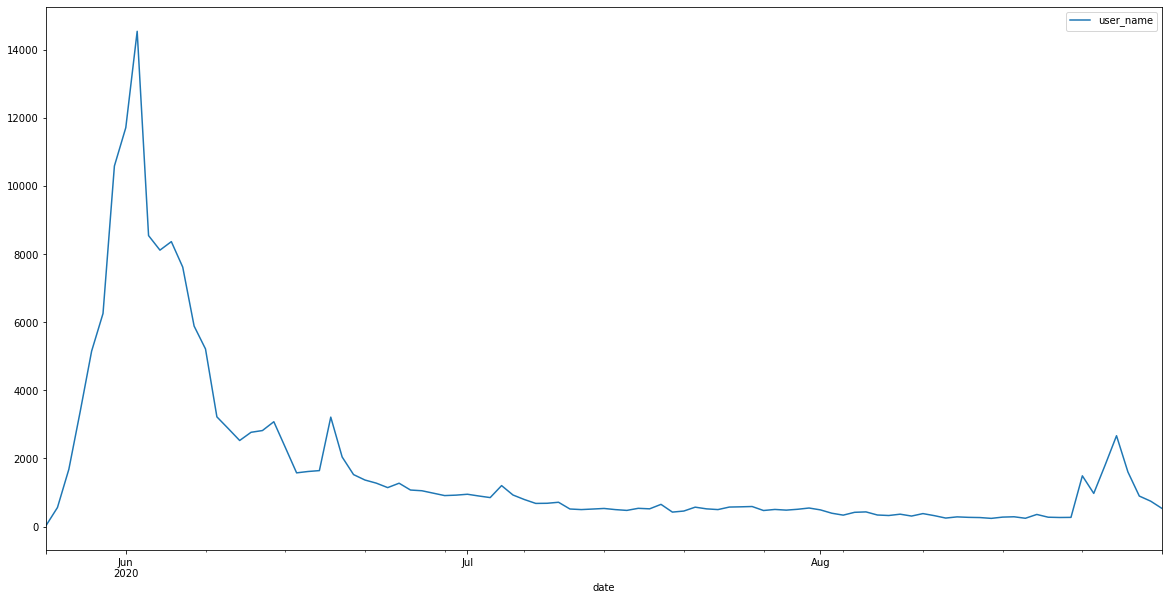

In [31]:
df_t.plot(figsize = (20,10))
plt.show()

In [32]:
df_begin_t = df_t.loc['2020-05-25':'2020-06-08']

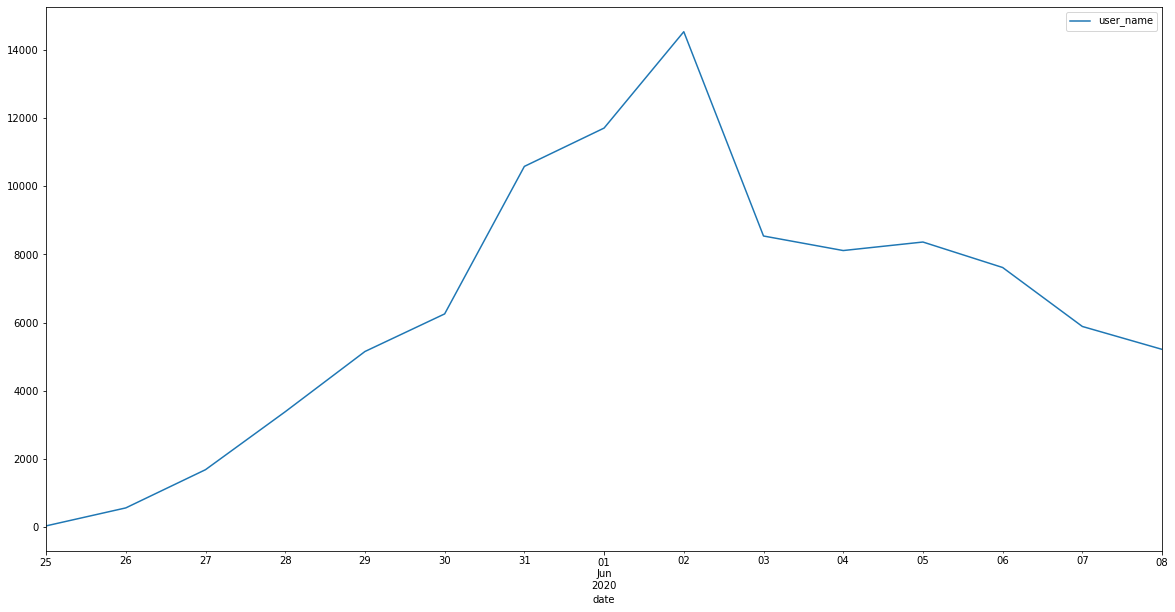

In [33]:
df_begin_t.plot(figsize = (20,10))
plt.show()

In [34]:
#Dataframe with retweets, user mean followers, user id count

In [35]:
df_b['user_followers'].head()

date
2020-05-25     61245.533333
2020-05-26    702813.098566
2020-05-27    154217.061905
2020-05-28    148235.483289
2020-05-29    406993.473204
Freq: D, Name: user_followers, dtype: float64

In [36]:
user_followers = df_b['user_followers']

In [37]:
df_a = df_a.join(user_followers)

In [38]:
twittos = df_t['user_name']

In [39]:
df_a = df_a.join(twittos)

In [40]:
df_a

,retweet_count,user_followers,user_name
date,,,
2020-05-25,183311,61245.533333,30
2020-05-26,1239383,702813.098566,558
2020-05-27,3436116,154217.061905,1680
2020-05-28,7290754,148235.483289,3381
2020-05-29,6840276,406993.473204,5149
...,...,...,...
2020-08-27,2480466,459703.308068,2665
2020-08-28,1155539,412270.007491,1602
2020-08-29,2482909,184084.993289,894


<AxesSubplot:>

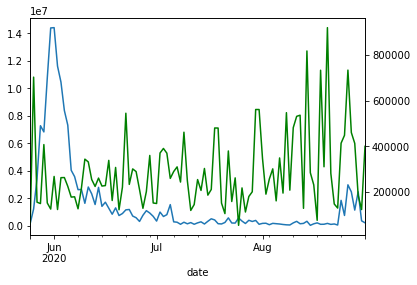

In [41]:
df_a["retweet_count"].plot();
df_a["user_followers"].plot(secondary_y=True, style="g")

<AxesSubplot:>

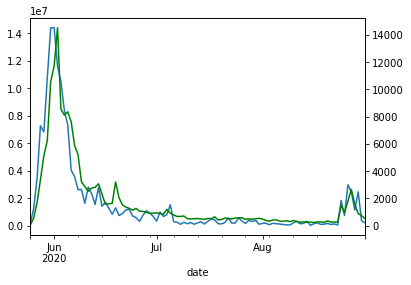

In [42]:
df_a["retweet_count"].plot();
df_a["user_name"].plot(secondary_y=True, style="g")

In [43]:
# We aggregate likes

In [44]:
df_l = df.groupby(pd.Grouper(key='date',freq='D'))['like_count'].sum()
df_l = df_l.to_frame()
df_l = df_l.loc['2020-05-25':'2020-08-31']
df_l.head()

,like_count
date,
2020-05-25,666648
2020-05-26,4808451
2020-05-27,10384634
2020-05-28,24535848
2020-05-29,25702347


In [45]:
likes = df_l['like_count']
df_a = df_a.join(likes)

In [46]:
df_a.head()

,retweet_count,user_followers,user_name,like_count
date,,,,
2020-05-25,183311,61245.533333,30,666648
2020-05-26,1239383,702813.098566,558,4808451
2020-05-27,3436116,154217.061905,1680,10384634
2020-05-28,7290754,148235.483289,3381,24535848
2020-05-29,6840276,406993.473204,5149,25702347


In [47]:
df_z = df.groupby(pd.Grouper(key='date',freq='D'))['user_id'].nunique()
df_z = df_z.to_frame()
df_z = df_z.loc['2020-05-25':'2020-08-31']
df_z.head()

,user_id
date,
2020-05-25,21
2020-05-26,470
2020-05-27,1437
2020-05-28,2777
2020-05-29,4242


In [48]:
user = df_z['user_id']
df_a = df_a.join(user)

In [49]:
df_a.head()

,retweet_count,user_followers,user_name,like_count,user_id
date,,,,,
2020-05-25,183311,61245.533333,30,666648,21
2020-05-26,1239383,702813.098566,558,4808451,470
2020-05-27,3436116,154217.061905,1680,10384634,1437
2020-05-28,7290754,148235.483289,3381,24535848,2777
2020-05-29,6840276,406993.473204,5149,25702347,4242


<AxesSubplot:>

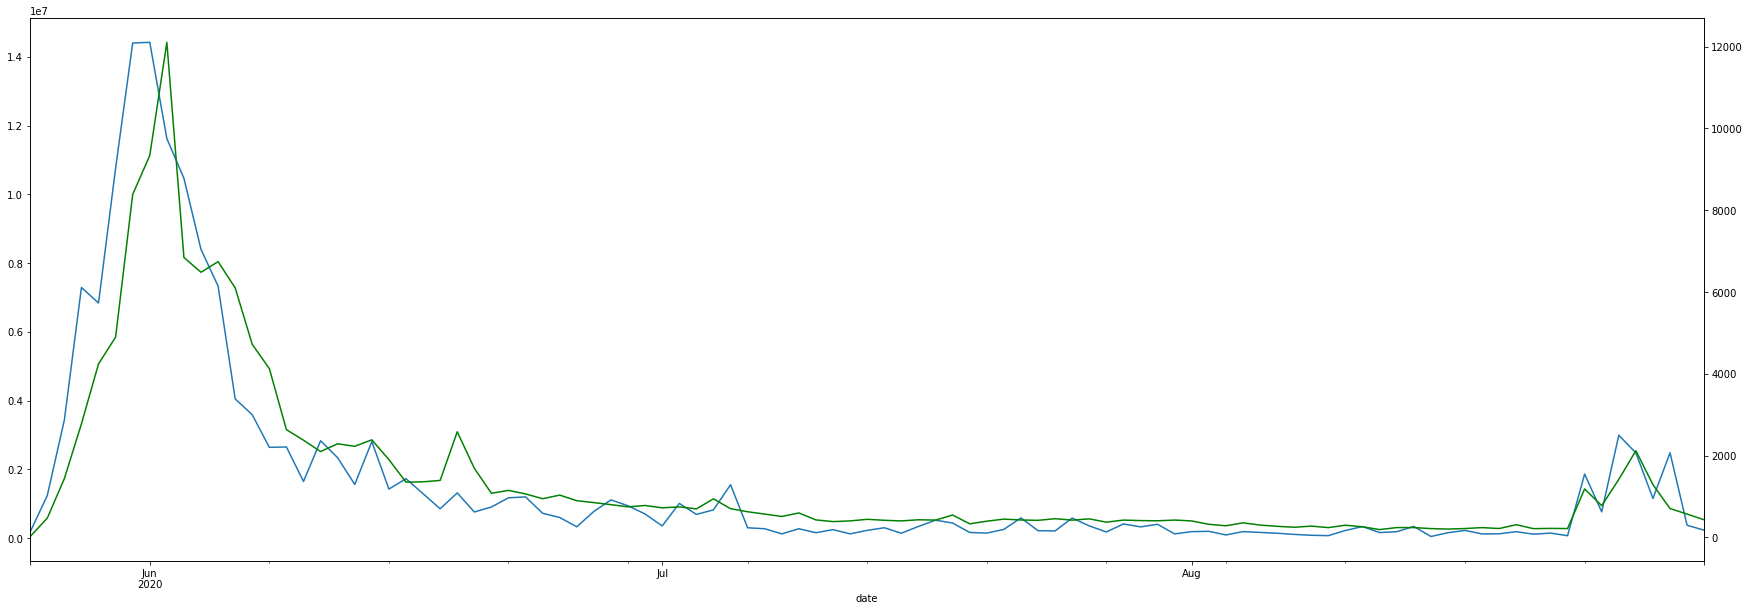

In [50]:
df_a["retweet_count"].plot(figsize = (30,10));
df_a["user_id"].plot(secondary_y=True, style="g")


<AxesSubplot:>

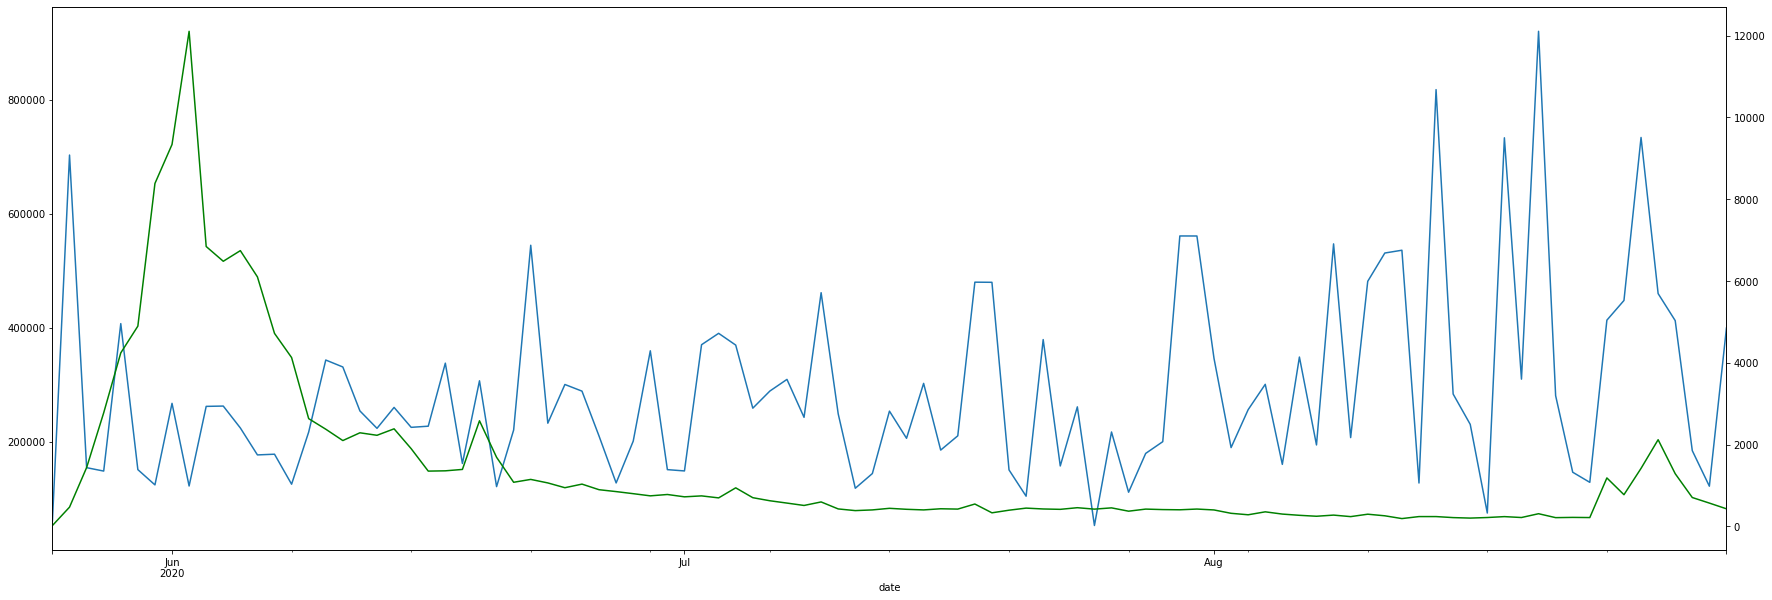

In [51]:
df_a["user_followers"].plot(figsize = (30,10));
df_a["user_id"].plot(secondary_y=True, style="g")

<AxesSubplot:>

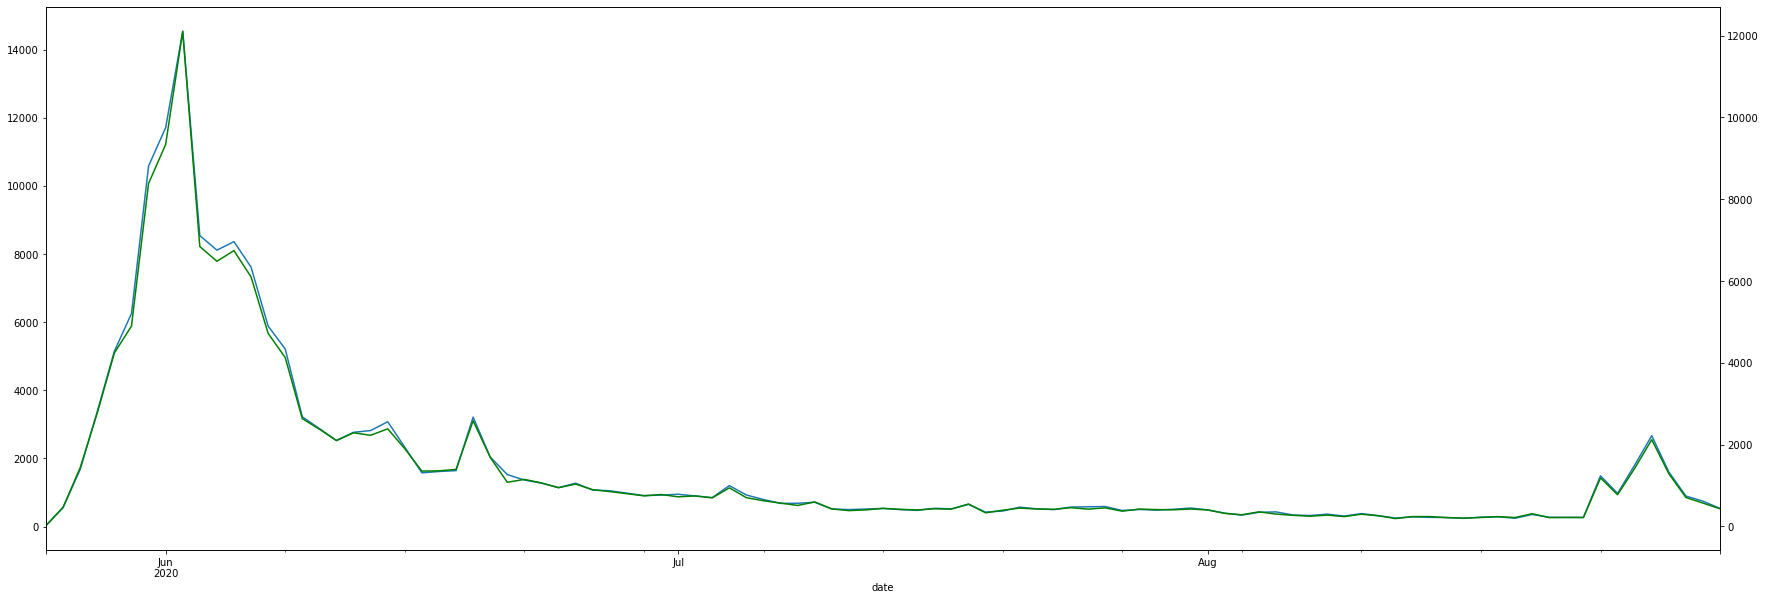

In [52]:
df_a["user_name"].plot(figsize = (30,10));
df_a["user_id"].plot(secondary_y=True, style="g")

<AxesSubplot:>

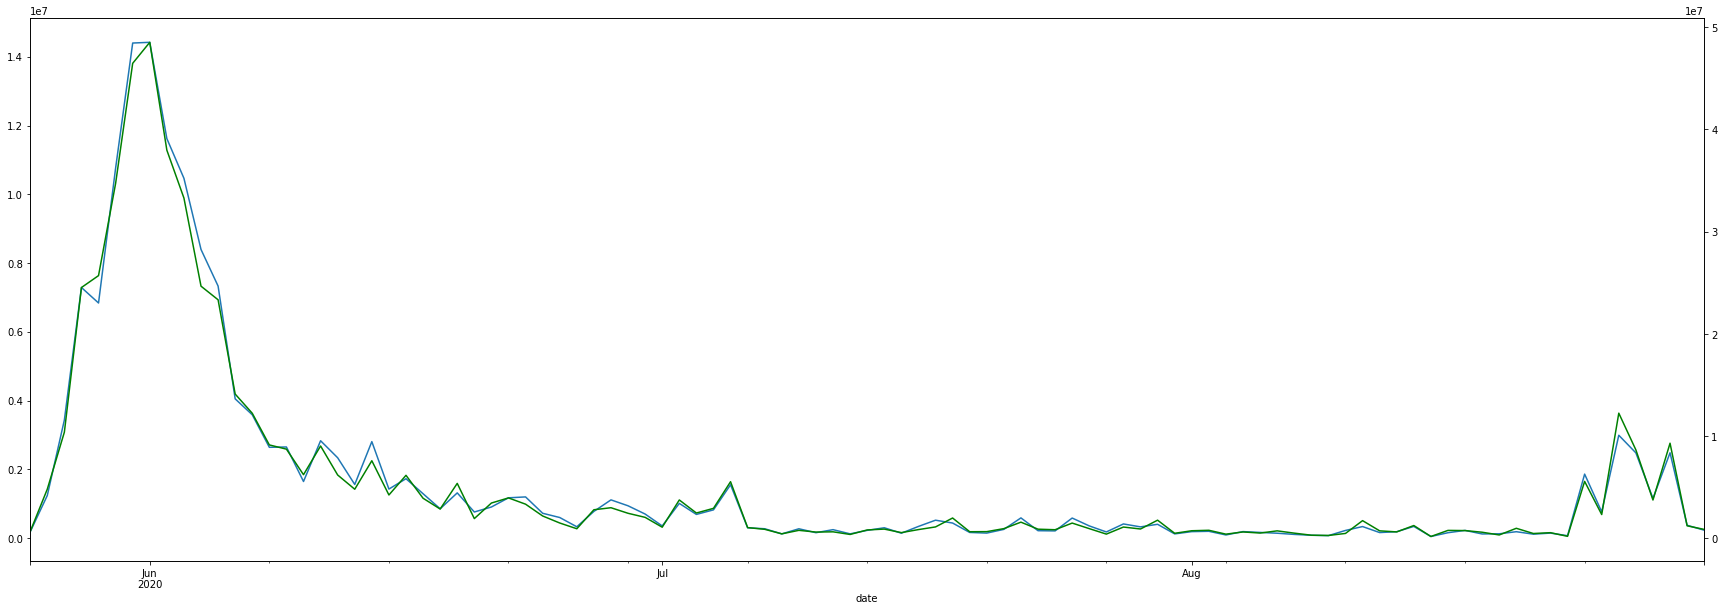

In [53]:
df_a["retweet_count"].plot(figsize = (30,10));
df_a["like_count"].plot(secondary_y=True, style="g")

In [54]:
#Volume of tweet per user_follower group

In [55]:
import numpy as np

In [56]:
df["user_followers"].describe()

count    1.761770e+05
mean     2.458632e+05
std      3.045714e+06
min      0.000000e+00
25%      2.610000e+02
50%      7.760000e+02
75%      2.672000e+03
max      1.313493e+08
Name: user_followers, dtype: float64

In [57]:
follower_base = pd.cut(df['user_followers'], bins=[0, 1000, 5000, 100000, 1000000, np.inf])
df_follower_base = df.groupby(follower_base)['id'].count()

In [58]:
df_follower_base

user_followers
(0.0, 1000.0]            98735
(1000.0, 5000.0]         46570
(5000.0, 100000.0]       22098
(100000.0, 1000000.0]     5104
(1000000.0, inf]          3534
Name: id, dtype: int64

In [59]:
df_like_base = df.groupby(follower_base)['like_count'].sum()

In [60]:
df_like_base

user_followers
(0.0, 1000.0]             41138173
(1000.0, 5000.0]          94744368
(5000.0, 100000.0]       141200465
(100000.0, 1000000.0]    100678671
(1000000.0, inf]         168412607
Name: like_count, dtype: int64

In [61]:
df_retweet_count = df.groupby(follower_base)['retweet_count'].sum()

In [62]:
df_retweet_count

user_followers
(0.0, 1000.0]            16539114
(1000.0, 5000.0]         32772530
(5000.0, 100000.0]       44022390
(100000.0, 1000000.0]    31662477
(1000000.0, inf]         40985413
Name: retweet_count, dtype: int64

In [63]:
df_summmary_rt = df.groupby(follower_base).agg({'retweet_count': ['sum','mean','max','min']}) 

In [64]:
df_summmary_rt

retweet_count                           
                                sum          mean      max min
user_followers                                                
(0.0, 1000.0]              16539114    167.510143   322652   0
(1000.0, 5000.0]           32772530    703.726219   764406   0
(5000.0, 100000.0]         44022390   1992.143633   546536   0
(100000.0, 1000000.0]      31662477   6203.463362   496591   0
(1000000.0, inf]           40985413  11597.456989  2027389   0

In [65]:
df_summmary_rt['Percentage']= ((df_summmary_rt['retweet_count']['sum'] / df_summmary_rt['retweet_count']['sum'].sum())*100).round(2).astype(str) + '%'

In [66]:
df_summmary_rt

retweet_count                            Percentage
                                sum          mean      max min           
user_followers                                                           
(0.0, 1000.0]              16539114    167.510143   322652   0      9.96%
(1000.0, 5000.0]           32772530    703.726219   764406   0     19.74%
(5000.0, 100000.0]         44022390   1992.143633   546536   0     26.52%
(100000.0, 1000000.0]      31662477   6203.463362   496591   0     19.08%
(1000000.0, inf]           40985413  11597.456989  2027389   0     24.69%

In [67]:
df_summary_like = df.groupby(follower_base).agg({'like_count': ['sum','mean','max','min']}) 
df_summary_like

like_count                           
                             sum          mean      max min
user_followers                                             
(0.0, 1000.0]           41138173    416.652383   731869   0
(1000.0, 5000.0]        94744368   2034.450676  2712028   0
(5000.0, 100000.0]     141200465   6389.739569  2096738   0
(100000.0, 1000000.0]  100678671  19725.444945  3178074   0
(1000000.0, inf]       168412607  47654.953877  7230319   0

In [68]:
df_summmary_twt = df.groupby(follower_base).agg({'id': ['count']}) 
df_summmary_twt 

,id
,count
user_followers,
"(0.0, 1000.0]",98735
"(1000.0, 5000.0]",46570
"(5000.0, 100000.0]",22098
"(100000.0, 1000000.0]",5104
"(1000000.0, inf]",3534


In [69]:
df_summmary_rt['ratio']= ((df_summmary_rt['retweet_count']['sum'] / df_summmary_twt['id']['count'])).round(2)

In [70]:
df_summmary_rt

retweet_count                            Percentage  \
                                sum          mean      max min              
user_followers                                                              
(0.0, 1000.0]              16539114    167.510143   322652   0      9.96%   
(1000.0, 5000.0]           32772530    703.726219   764406   0     19.74%   
(5000.0, 100000.0]         44022390   1992.143633   546536   0     26.52%   
(100000.0, 1000000.0]      31662477   6203.463362   496591   0     19.08%   
(1000000.0, inf]           40985413  11597.456989  2027389   0     24.69%   

                          ratio  
                                 
user_followers                   
(0.0, 1000.0]            167.51  
(1000.0, 5000.0]         703.73  
(5000.0, 100000.0]      1992.14  
(100000.0, 1000000.0]   6203.46  
(1000000.0, inf]       11597.46

In [71]:
#This shows the weight of one tweet, per category, so it shows that the more follower you have the more your twit weighs

In [72]:
#We now visually represent the time evolution of these variables

In [73]:
df_ca = df

In [74]:
df_ca['date'] = pd.to_datetime(df_ca['date'])

In [75]:
df_ca['date'] = df_ca['date'].dt.strftime('%Y-%m-%d')

In [76]:
df_ca['date'] = pd.to_datetime(df_ca['date'])

In [77]:
df_ca.head()

,id,timestamp_utc,local_time,user_screen_name,text,possibly_sensitive,retweet_count,like_count,reply_count,lang,...,place_coordinates,links,domains,media_urls,media_files,media_types,mentioned_names,mentioned_ids,hashtags,date
0,1300582130309890049,1598917918,2020-08-31T23:51:58,holysmokerocks,@parkhILLMATIC89 Your post is so right on! 👊🏼\...,0,0,0,0,en,...,"[-70.281704, 43.692941, -70.197961, 43.748681]",https://open.spotify.com/track/3WXxJBZn765OqVo...,NaN,NaN,NaN,NaN,parkhILLMATIC89,820697577792438273,BlackLivesMatter|ICantBreathe|Spotify|WeWillVote,2020-08-31
1,1300581605036220417,1598917792,2020-08-31T23:49:52,sevenstepsup,I cried like a fucking baby watching this vid....,0,0,1,0,en,...,"[-86.213904, 43.043093, -86.115054, 43.117833]",https://twitter.com/ProjectLincoln/status/1300...,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter,2020-08-31
2,1300108216051871745,1598804928,2020-08-30T16:28:48,ProjectLincoln,You don’t need to be black to be outraged. You...,0,73677,177831,4483,en,...,NaN,https://twitter.com/ProjectLincoln/status/1300...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-30
3,1300580270337396737,1598917474,2020-08-31T23:44:34,lrlopez74,Black voices worth listening to. https://youtu...,0,0,0,0,en,...,"[-122.318673, 47.4071473, -122.241356, 47.5319...",https://www.instagram.com/p/CEkpSlpJk4U/|https...,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter|blackallianceforpeace|blackma...,2020-08-31
4,1300579808104112129,1598917364,2020-08-31T23:42:44,CaseyyMcGaw,"Does anyone know of any good small, Black owne...",0,3,13,3,en,...,"[-86.348441, 39.631677, -85.937404, 39.927448]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter,2020-08-31


In [78]:
df_cc = df_ca.loc[(df_ca['date'] >= '2020-05-25')
                     & (df_ca['date'] <= '2020-08-31')]

In [79]:
df_cc['follower_base'] = pd.cut(df['user_followers'], bins=[0, 1000, 5000, 100000, 1000000, np.inf])

/var/folders/74/w7yj9db979s9x9fzb61f8lcc0000gn/T/ipykernel_49709/1770534755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cc['follower_base'] = pd.cut(df['user_followers'], bins=[0, 1000, 5000, 100000, 1000000, np.inf])


In [80]:
df_cc.head()

,id,timestamp_utc,local_time,user_screen_name,text,possibly_sensitive,retweet_count,like_count,reply_count,lang,...,links,domains,media_urls,media_files,media_types,mentioned_names,mentioned_ids,hashtags,date,follower_base
0,1300582130309890049,1598917918,2020-08-31T23:51:58,holysmokerocks,@parkhILLMATIC89 Your post is so right on! 👊🏼\...,0,0,0,0,en,...,https://open.spotify.com/track/3WXxJBZn765OqVo...,NaN,NaN,NaN,NaN,parkhILLMATIC89,820697577792438273,BlackLivesMatter|ICantBreathe|Spotify|WeWillVote,2020-08-31,"(1000.0, 5000.0]"
1,1300581605036220417,1598917792,2020-08-31T23:49:52,sevenstepsup,I cried like a fucking baby watching this vid....,0,0,1,0,en,...,https://twitter.com/ProjectLincoln/status/1300...,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter,2020-08-31,"(0.0, 1000.0]"
2,1300108216051871745,1598804928,2020-08-30T16:28:48,ProjectLincoln,You don’t need to be black to be outraged. You...,0,73677,177831,4483,en,...,https://twitter.com/ProjectLincoln/status/1300...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-30,"(1000000.0, inf]"
3,1300580270337396737,1598917474,2020-08-31T23:44:34,lrlopez74,Black voices worth listening to. https://youtu...,0,0,0,0,en,...,https://www.instagram.com/p/CEkpSlpJk4U/|https...,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter|blackallianceforpeace|blackma...,2020-08-31,"(0.0, 1000.0]"
4,1300579808104112129,1598917364,2020-08-31T23:42:44,CaseyyMcGaw,"Does anyone know of any good small, Black owne...",0,3,13,3,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter,2020-08-31,"(1000.0, 5000.0]"


In [81]:
df_byfollow = df_cc.groupby(['date','follower_base'])[['id']].count().unstack().fillna(0)

In [82]:
df_byfollow

id                                      \
follower_base (0.0, 1000.0] (1000.0, 5000.0] (5000.0, 100000.0]   
date                                                              
2020-05-25                6                6                 14   
2020-05-26              240              144                 99   
2020-05-27             1001              415                186   
2020-05-28             2053              860                307   
2020-05-29             3065             1294                532   
...                     ...              ...                ...   
2020-08-27             1400              708                353   
2020-08-28              789              460                241   
2020-08-29              434              251                147   
2020-08-30              345              242                117   
2020-08-31              264              150                 79   

                                                      
follower_base (100000.0, 1000000.0] (1000000.0, inf]  
date                                                  
2020-05-25                        4                0  
2020-05-26                       47               28  
2020-05-27                       45               33  
2020-05-28                      102               56  
2020-05-29                      134              123  
...                             ...              ...  
2020-08-27                      108               95  
2020-08-28                       65               45  
2020-08-29                       37               24  
2020-08-30                       26               14  
2020-08-31                       16               19  

[99 rows x 5 columns]

In [83]:
import matplotlib.dates as mdates

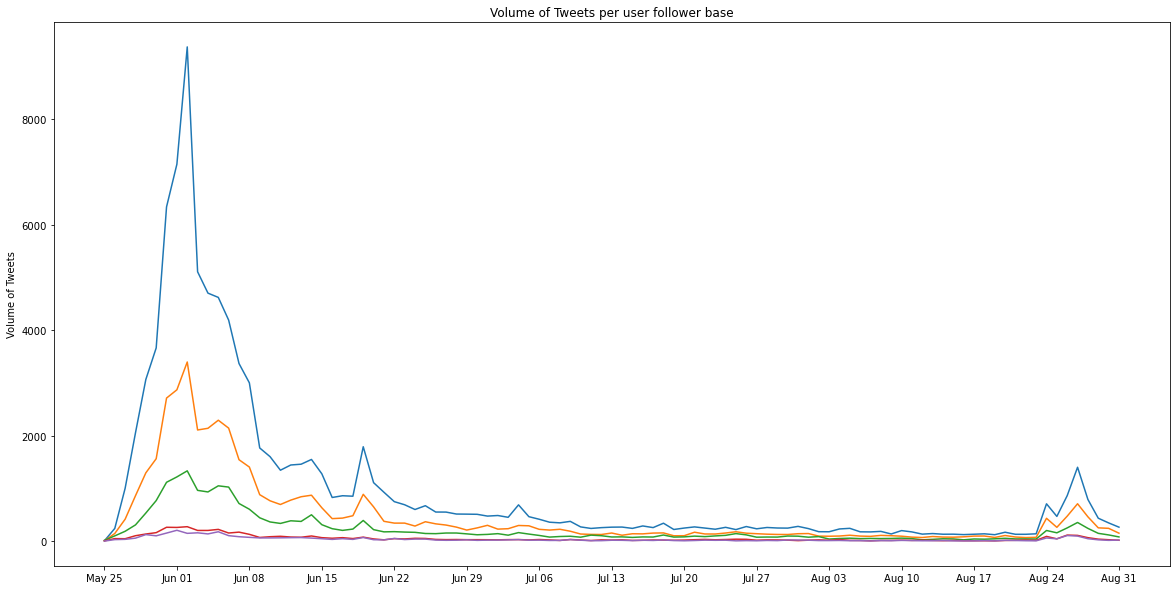

In [84]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(df_byfollow, linestyle='-')
ax.set_ylabel('Volume of Tweets')
ax.set_title('Volume of Tweets per user follower base')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [85]:
df_byfollow_e = df_cc.groupby(['date','follower_base'])[['retweet_count']].sum().unstack().fillna(0)

In [86]:
df_byfollow_e.head()

retweet_count                                      \
follower_base (0.0, 1000.0] (1000.0, 5000.0] (5000.0, 100000.0]   
date                                                              
2020-05-25                8               44             137489   
2020-05-26             9966            52323             593530   
2020-05-27           531927          1165387             627348   
2020-05-28           779256          2679405            2095653   
2020-05-29           591508          1251917            1331285   

                                                      
follower_base (100000.0, 1000000.0] (1000000.0, inf]  
date                                                  
2020-05-25                    45770                0  
2020-05-26                   311055           272509  
2020-05-27                   331404           780050  
2020-05-28                  1003973           732466  
2020-05-29                  1100511          2565055

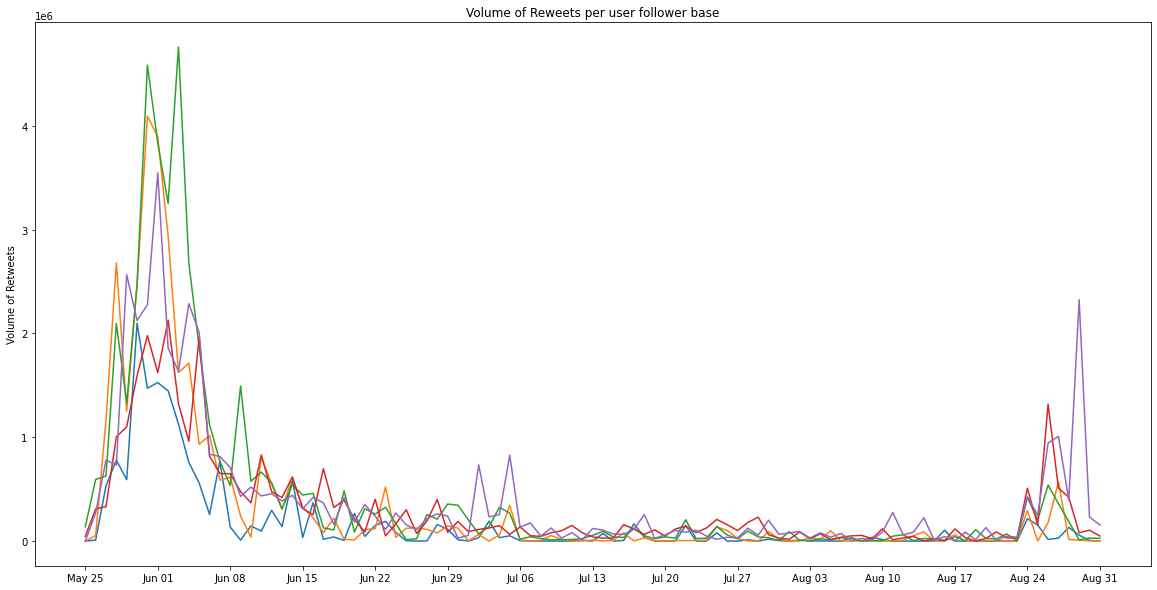

In [87]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(df_byfollow_e, linestyle='-')
ax.set_ylabel('Volume of Retweets')
ax.set_title('Volume of Reweets per user follower base')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [88]:
df_byfollow_l = df_cc.groupby(['date','follower_base'])[['like_count']].sum().unstack().fillna(0)

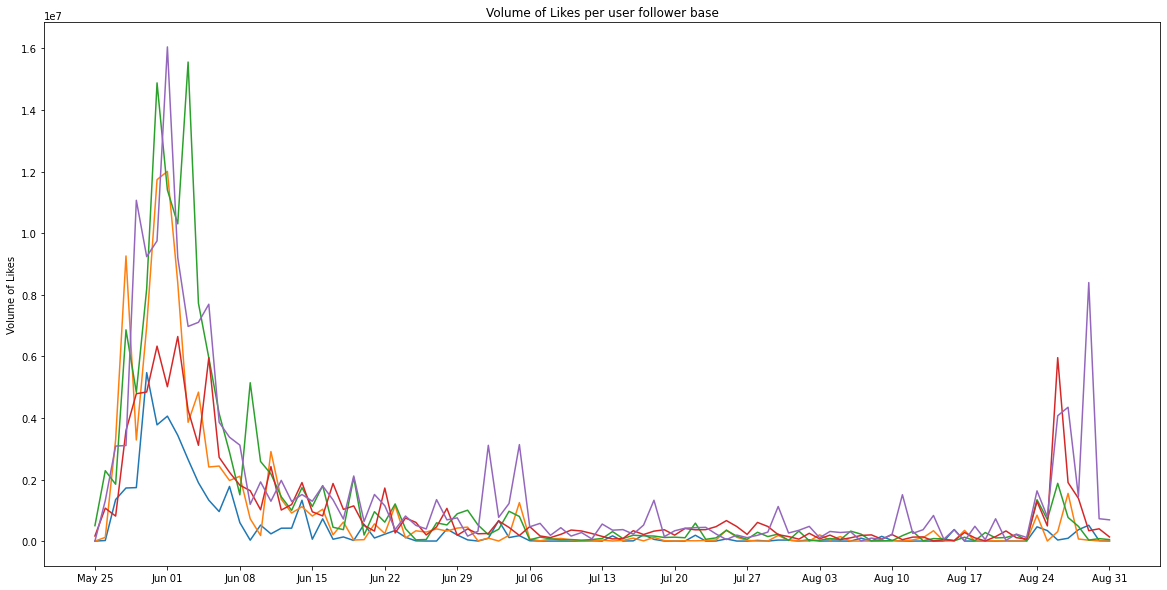

In [89]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(df_byfollow_l, linestyle='-')
ax.set_ylabel('Volume of Likes')
ax.set_title('Volume of Likes per user follower base')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [90]:
#let's zoom on the first two weeks 

In [91]:
df_cc_week = df_ca.loc[(df_ca['date'] >= '2020-05-25')
                     & (df_ca['date'] <= '2020-06-21')]

In [92]:
df_cc_week['follower_base'] = pd.cut(df_cc_week['user_followers'], bins=[0, 1000, 5000, 100000, 1000000, np.inf])

/var/folders/74/w7yj9db979s9x9fzb61f8lcc0000gn/T/ipykernel_49709/3129634137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cc_week['follower_base'] = pd.cut(df_cc_week['user_followers'], bins=[0, 1000, 5000, 100000, 1000000, np.inf])


In [93]:
df_byfollow_weekrt = df_cc_week.groupby(['date','follower_base'])[['retweet_count']].sum().unstack().fillna(0)

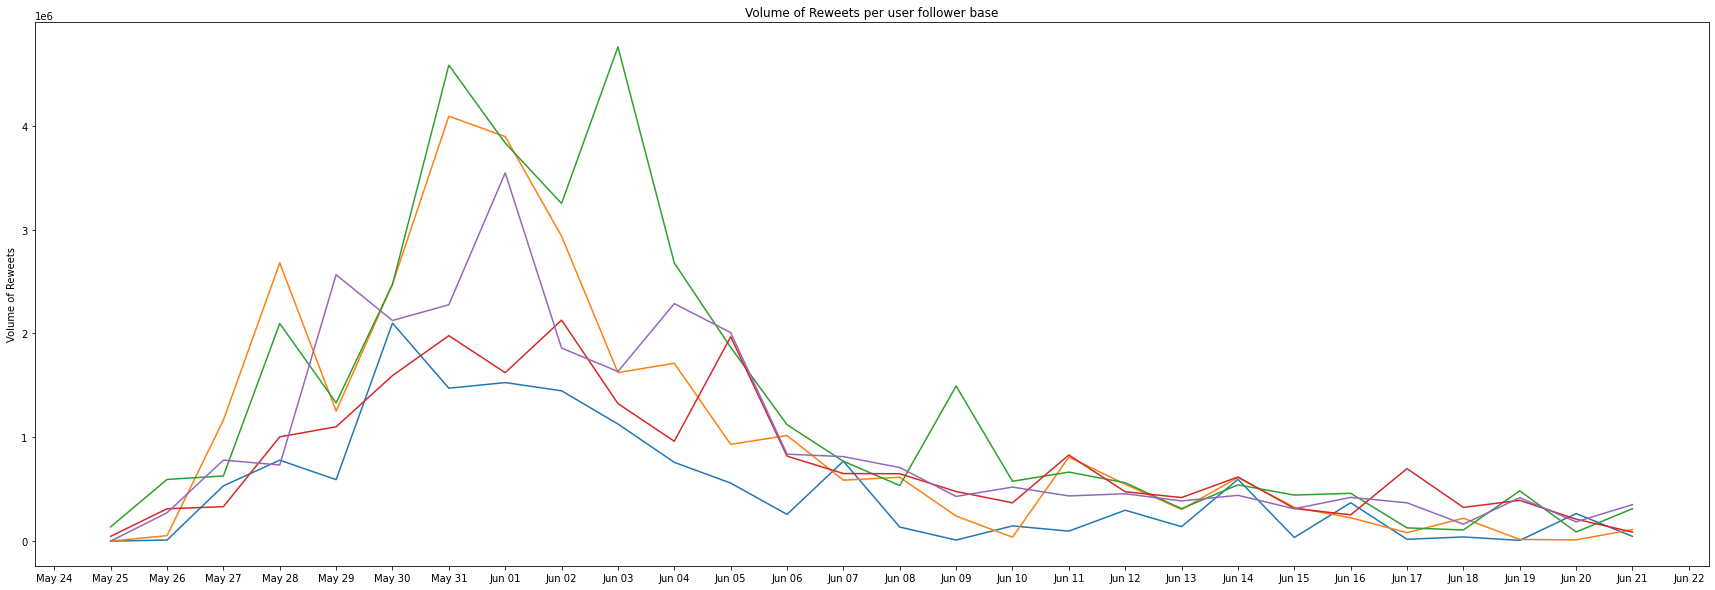

In [94]:
fig, ax = plt.subplots(figsize = (30,10))
ax.plot(df_byfollow_weekrt, linestyle='-')
ax.set_ylabel('Volume of Reweets')
ax.set_title('Volume of Reweets per user follower base')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.DayLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [95]:
df_byfollow_weektwt = df_cc_week.groupby(['date','follower_base'])[['id']].count().unstack().fillna(0)

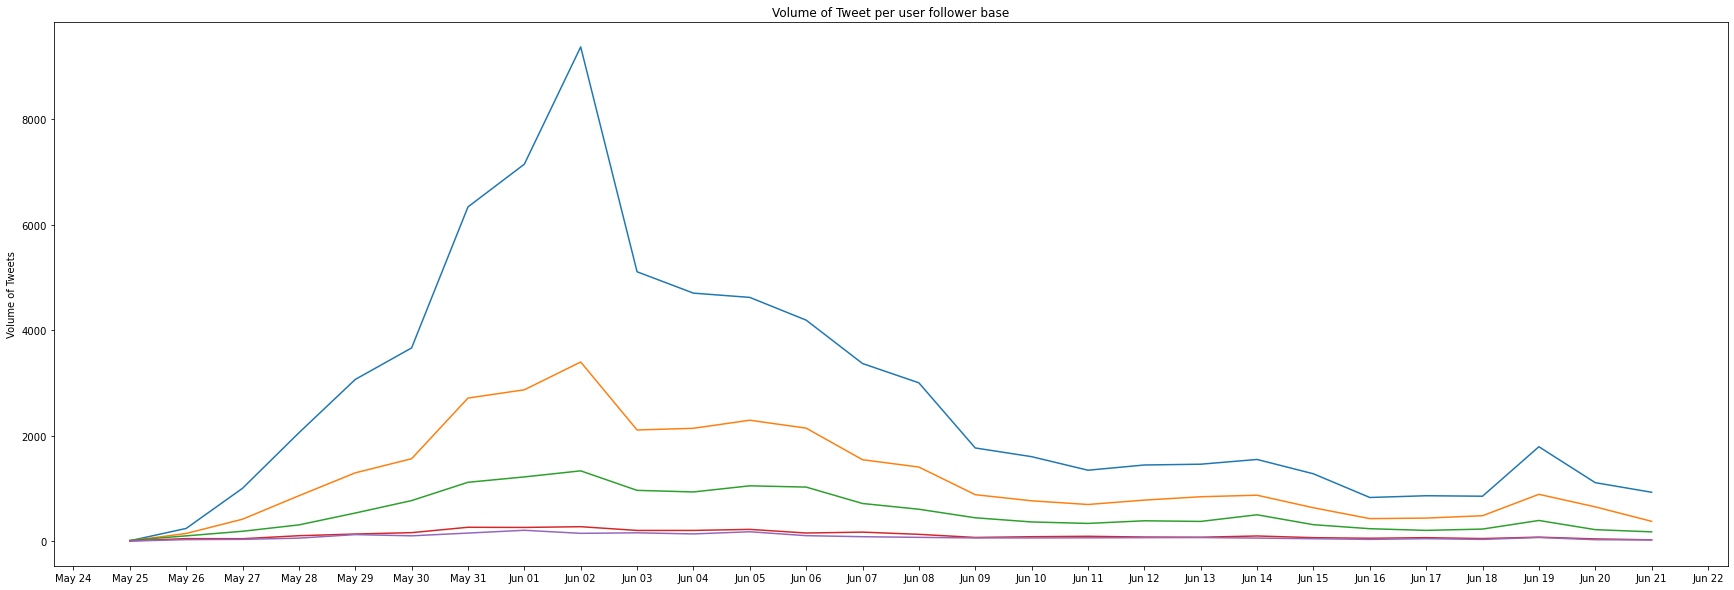

In [96]:
fig, ax = plt.subplots(figsize = (30,10))
ax.plot(df_byfollow_weektwt, linestyle='-')
ax.set_ylabel('Volume of Tweets')
ax.set_title('Volume of Tweet per user follower base')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.DayLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [97]:
df_byfollow_weekl = df_cc_week.groupby(['date','follower_base'])[['like_count']].sum().unstack().fillna(0)

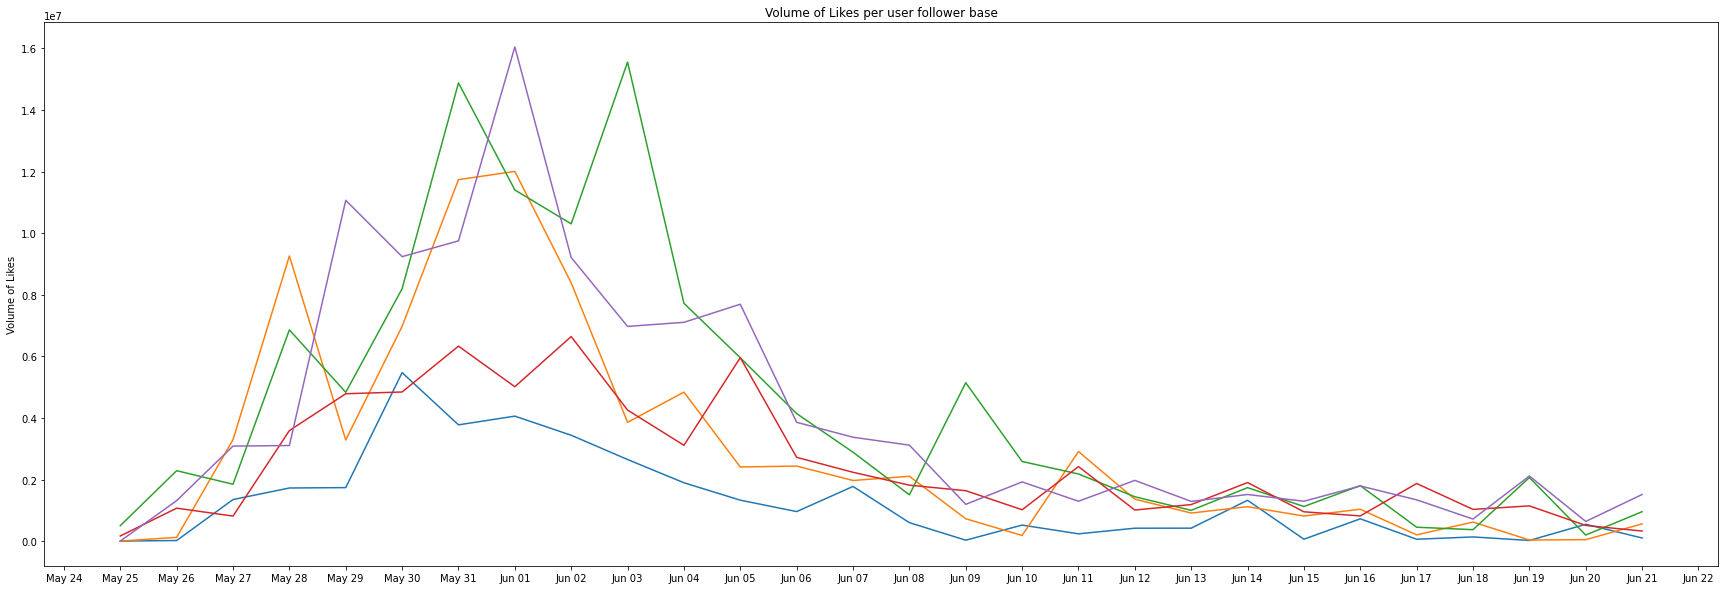

In [98]:
fig, ax = plt.subplots(figsize = (30,10))
ax.plot(df_byfollow_weekl, linestyle='-')
ax.set_ylabel('Volume of Likes')
ax.set_title('Volume of Likes per user follower base')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.DayLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [99]:
#Clean the data by looking at the number, remonte bien le cc et df by follow et ensuite trace un graphique de l'évolution du volume de tweet par user base 

In [100]:
ds = df.sort_values(by='retweet_count', ascending=False)
pd.options.display.max_colwidth = 300
ds[['retweet_count','user_followers', 'like_count', 'text', 'date', 'user_screen_name']].head(20)

,retweet_count,user_followers,like_count,text,date,user_screen_name
1775,2027389,2177804,7230319,https://twitter.com/chadwickboseman/status/1299530165463199747/photo/1,2020-08-29,chadwickboseman
110051,864340,44838279,2087299,"우리는 인종차별에 반대합니다.\n우리는 폭력에 반대합니다.\n나, 당신, 우리 모두는 존중받을 권리가 있습니다. 함께 하겠습니다.\n\nWe stand against racial discrimination.\nWe condemn violence.\nYou, I and we all have the right to be respected. We will stand together.\n\n#BlackLivesMatter",2020-06-04,BTS_twt
170213,764406,2137,2712028,What a headline https://twitter.com/1kingmyles/status/1265832328598884352/photo/1,2020-05-28,1kingmyles
32662,640192,44837531,2348788,X_X 🤍🖤 https://twitter.com/BTS_twt/status/1279801791958315009/photo/1,2020-07-05,BTS_twt
34381,631113,61106621,2697677,You can have an edit button when everyone wears a mask,2020-07-02,Twitter
124664,546536,10357,1869609,"George Floyd and I were both arrested for allegedly spending a counterfeit $20 bill. For George Floyd, a man my age, with two kids, it was a death sentence. For me, it is a story I sometimes tell at parties. That, my friends, is White privilege.",2020-06-01,m_d_mccoy
85218,532681,8878,1264294,Know the difference. https://twitter.com/Levance_/status/1268079843004026880/photo/1,2020-06-03,Levance_
142060,514501,3776,1757918,NORMALIZE CHANGING YOUR OPINION ON SOMETHING AFTER LEARNING NEW INFORMATION. ITS OKAY. I PROMISE.,2020-05-31,CH1ONESO
153587,496591,378768,1998390,"As my father explained during his lifetime, a riot is the language of the unheard.",2020-05-28,OfficialMLK3
5306,476253,848644,3178074,"Hey guys, wanna feel old?\n\nI'm 40.\n\nYou're welcome.",2020-08-26,IncredibleCulk


In [101]:
ds_week = df_cc_week.sort_values(by='retweet_count', ascending=False)
pd.options.display.max_colwidth = 300
pd.set_option("max_rows", 80)
ds_week[['retweet_count','user_followers', 'like_count', 'text', 'user_screen_name', 'date']].head(80)

,retweet_count,user_followers,like_count,text,user_screen_name,date
110051,864340,44838279,2087299,"우리는 인종차별에 반대합니다.\n우리는 폭력에 반대합니다.\n나, 당신, 우리 모두는 존중받을 권리가 있습니다. 함께 하겠습니다.\n\nWe stand against racial discrimination.\nWe condemn violence.\nYou, I and we all have the right to be respected. We will stand together.\n\n#BlackLivesMatter",BTS_twt,2020-06-04
170213,764406,2137,2712028,What a headline https://twitter.com/1kingmyles/status/1265832328598884352/photo/1,1kingmyles,2020-05-28
124664,546536,10357,1869609,"George Floyd and I were both arrested for allegedly spending a counterfeit $20 bill. For George Floyd, a man my age, with two kids, it was a death sentence. For me, it is a story I sometimes tell at parties. That, my friends, is White privilege.",m_d_mccoy,2020-06-01
85218,532681,8878,1264294,Know the difference. https://twitter.com/Levance_/status/1268079843004026880/photo/1,Levance_,2020-06-03
142060,514501,3776,1757918,NORMALIZE CHANGING YOUR OPINION ON SOMETHING AFTER LEARNING NEW INFORMATION. ITS OKAY. I PROMISE.,CH1ONESO,2020-05-31
153587,496591,378768,1998390,"As my father explained during his lifetime, a riot is the language of the unheard.",OfficialMLK3,2020-05-28
164175,469967,6048,1593338,No justice No peace https://twitter.com/spiltcoco/status/1265941079767089152/photo/1,spiltcoco,2020-05-28
160620,436958,131348515,1825711,My statement on the death of George Floyd: https://twitter.com/BarackObama/status/1266400635429310466/photo/1,BarackObama,2020-05-29
125031,433887,2774,1520822,"It’s not white vs black, it’s everybody vs racists",Alone2Rome,2020-05-28
139454,426328,5753,1529264,"WHY IS ENDING RACISM SO CONTROVERSIAL LMAOOOO, LIKE WHY IS THERE SO MUCH DISAGREEMENT?!?!???!!!!???",semaj_htx,2020-05-31


In [102]:
#Time for the qualitative analysis we start by preprocessing the tweets 

In [103]:
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/HannaAgbanrin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/HannaAgbanrin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
!pip install ekphrasis
!pip install tweet-preprocessor

In [105]:
tweets = df

In [106]:
tweets['hashtag'] = tweets['text'].apply(lambda x: re.findall(r"#(\w+)", x))

In [107]:
import numpy as np # linear algebra

In [108]:
!pip install tweet-preprocessor

In [109]:
import preprocessor as p

In [110]:
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

In [111]:
tweets['text'] = tweets.apply(preprocess_tweet, axis=1)

In [112]:
tweets.head()

,id,timestamp_utc,local_time,user_screen_name,text,possibly_sensitive,retweet_count,like_count,reply_count,lang,...,links,domains,media_urls,media_files,media_types,mentioned_names,mentioned_ids,hashtags,date,hashtag
0,1300582130309890049,1598917918,2020-08-31T23:51:58,holysmokerocks,"Your post is so right on! Here's our latest release on called ""Is This America?""Perfect podcast material?Thanks for listening!Make it a rockin' day!",0,0,0,0,en,...,https://open.spotify.com/track/3WXxJBZn765OqVoBqeugJE?si=W8L8JnRCSK6g7Gw9dTMSIA,NaN,NaN,NaN,NaN,parkhILLMATIC89,820697577792438273,BlackLivesMatter|ICantBreathe|Spotify|WeWillVote,2020-08-31,"[Spotify, BlackLivesMatter, ICantBreathe, WeWillVote]"
1,1300581605036220417,1598917792,2020-08-31T23:49:52,sevenstepsup,"I cried like a fucking baby watching this vid. I am outraged. I am a white American. If we are quiet, we are complicit.",0,0,1,0,en,...,https://twitter.com/ProjectLincoln/status/1300108216051871745,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter,2020-08-31,[BlackLivesMatter]
2,1300108216051871745,1598804928,2020-08-30T16:28:48,ProjectLincoln,You dont need to be black to be outraged. You need to be American and be outraged.,0,73677,177831,4483,en,...,https://twitter.com/ProjectLincoln/status/1300108216051871745/video/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-30,[]
3,1300580270337396737,1598917474,2020-08-31T23:44:34,lrlopez74,"Black voices worth listening to. Tukwila, Washington",0,0,0,0,en,...,https://www.instagram.com/p/CEkpSlpJk4U/|https://youtu.be/I3cg-tX1_1A,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter|blackallianceforpeace|blackmarxism|blackradicaltradition,2020-08-31,"[BlackLivesMatter, blackradicaltradition, blackallianceforpeace, blackmarxism]"
4,1300579808104112129,1598917364,2020-08-31T23:42:44,CaseyyMcGaw,"Does anyone know of any good small, Black owned online shops that sell shirts and masks? Want to buy some, but want to make sure Im directly supporting a Black artist.",0,3,13,3,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter,2020-08-31,[BlackLivesMatter]


In [113]:
from gensim.parsing.preprocessing import remove_stopwords

In [114]:
def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

In [115]:
tweets['text'] = tweets.apply(stopword_removal, axis=1)

In [116]:
tweets['text'] = tweets['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

/var/folders/74/w7yj9db979s9x9fzb61f8lcc0000gn/T/ipykernel_49709/558870651.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['text'] = tweets['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


In [117]:
tweets.head()

,id,timestamp_utc,local_time,user_screen_name,text,possibly_sensitive,retweet_count,like_count,reply_count,lang,...,links,domains,media_urls,media_files,media_types,mentioned_names,mentioned_ids,hashtags,date,hashtag
0,1300582130309890049,1598917918,2020-08-31T23:51:58,holysmokerocks,your post right on here s latest release called is this america perfect podcast material thanks listening make rockin day,0,0,0,0,en,...,https://open.spotify.com/track/3WXxJBZn765OqVoBqeugJE?si=W8L8JnRCSK6g7Gw9dTMSIA,NaN,NaN,NaN,NaN,parkhILLMATIC89,820697577792438273,BlackLivesMatter|ICantBreathe|Spotify|WeWillVote,2020-08-31,"[Spotify, BlackLivesMatter, ICantBreathe, WeWillVote]"
1,1300581605036220417,1598917792,2020-08-31T23:49:52,sevenstepsup,i cried like fucking baby watching vid i outraged i white american if quiet complicit,0,0,1,0,en,...,https://twitter.com/ProjectLincoln/status/1300108216051871745,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter,2020-08-31,[BlackLivesMatter]
2,1300108216051871745,1598804928,2020-08-30T16:28:48,ProjectLincoln,you dont need black outraged you need american outraged,0,73677,177831,4483,en,...,https://twitter.com/ProjectLincoln/status/1300108216051871745/video/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-30,[]
3,1300580270337396737,1598917474,2020-08-31T23:44:34,lrlopez74,black voices worth listening to tukwila washington,0,0,0,0,en,...,https://www.instagram.com/p/CEkpSlpJk4U/|https://youtu.be/I3cg-tX1_1A,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter|blackallianceforpeace|blackmarxism|blackradicaltradition,2020-08-31,"[BlackLivesMatter, blackradicaltradition, blackallianceforpeace, blackmarxism]"
4,1300579808104112129,1598917364,2020-08-31T23:42:44,CaseyyMcGaw,does know good small black owned online shops sell shirts masks want buy some want sure im directly supporting black artist,0,3,13,3,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter,2020-08-31,[BlackLivesMatter]


In [118]:
documents = list(tweets['text'].str.lower())

In [119]:
## instantiate the corpus object
lang = 'en_core_web_sm'
corpus = textacy.Corpus(lang)
for item in ['parser']:
  if item in corpus.spacy_lang.pipe_names:
      corpus.spacy_lang.remove_pipe(item)
## add the documents 
corpus.add_texts(documents)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}

In [120]:
#Topic Modelling with every single tweet

In [121]:
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [122]:
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

topic 0: black   woman   community   mourn   fight   brown   business   sister   brother   folk
topic 1: protest   peaceful   protester   city   downtown   protestor   tonight   street   safe   riot
topic 2: people   chain   color   t   power   lot   innocent   country   tired   tag
topic 3: police   brutality   officer   protester   violence   murder   force   reform   department   action
topic 4: life   matter   movement   blue   t   human   plaza   black   street   mural
topic 5: change   right   community   support   movement   way   thing   world   voice   love
topic 6: day   music   soul   lovely   therapy   vote   absentee   great   mail   arrest
topic 7: white   privilege   racist   supremacy   person   supremacist   thing   folk   america   friend
topic 8: time   tired   talent   promise   rescindeddonate   treasure   long   year   genius   stable
topic 9: today   proud   year   pm   tomorrow   birthday   city   powerful   happy   amazing
topic 10: justice   peace   equality  

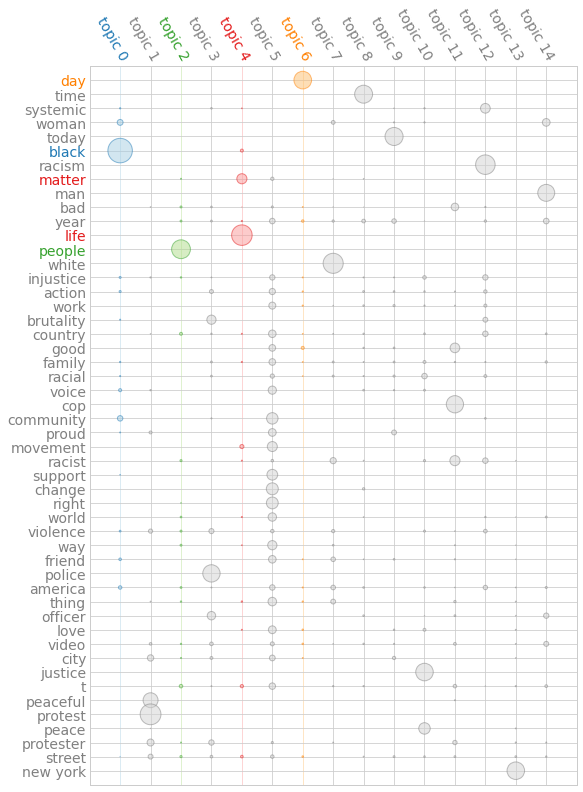

In [123]:
_ = model.termite_plot(doc_term_matrix, id_to_term, n_terms=50, highlight_topics=[0,4,6,2])

In [124]:
#Now we do topic modelling, filtering through follower base

In [125]:
df_1 = tweets[(tweets["user_followers"] > 1000000)]
df_2 = tweets[(tweets["user_followers"] <= 1000000) & (tweets["user_followers"] > 100000)]
df_3 = tweets[(tweets["user_followers"] <= 100000) & (tweets["user_followers"] > 5000)]
df_4 = tweets[(tweets["user_followers"] <= 5000) & (tweets["user_followers"] > 1000)]
df_5 = tweets[(tweets["user_followers"] <= 1000) & (tweets["user_followers"] > 0)]

In [126]:
df_1.head()

,id,timestamp_utc,local_time,user_screen_name,text,possibly_sensitive,retweet_count,like_count,reply_count,lang,...,links,domains,media_urls,media_files,media_types,mentioned_names,mentioned_ids,hashtags,date,hashtag
2,1300108216051871745,1598804928,2020-08-30T16:28:48,ProjectLincoln,you dont need black outraged you need american outraged,0,73677,177831,4483,en,...,https://twitter.com/ProjectLincoln/status/1300108216051871745/video/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-30,[]
34,1300563683572146177,1598913520,2020-08-31T22:38:40,ChrisMurphyCT,he charged with murder,0,16042,64431,4235,en,...,https://twitter.com/atrupar/status/1300557880001794049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-31,[]
39,1300492800161583104,1598896620,2020-08-31T17:57:00,JoeBiden,the simple truth donald trump failed protect america so now hes trying scare america,0,50211,281561,17313,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-31,[]
45,1300559143686684672,1598912437,2020-08-31T22:20:37,jonfavs,the president united states endorses extrajudicial killings right wing radicals,0,3178,10010,242,en,...,https://twitter.com/PodSaveAmerica/status/1300557665806868480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-31,[]
76,1300413709743984644,1598877763,2020-08-31T12:42:43,ProjectLincoln,days time ramp up,0,19227,60095,1454,en,...,https://twitter.com/ProjectLincoln/status/1300413709743984644/video/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-31,[]


In [127]:
documents = list(df_1['text'].str.lower())
## instantiate the corpus object
lang = 'en_core_web_sm'
corpus = textacy.Corpus(lang)
for item in ['parser']:
  if item in corpus.spacy_lang.pipe_names:
      corpus.spacy_lang.remove_pipe(item)
## add the documents 
corpus.add_texts(documents)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


topic 0: life   black   matter   movement   shirt   community   mural   employee   partner   woman
topic 1: police   brutality   department   violence   reform   officer   video   child   misconduct   custody
topic 2: people   american   black   mask   way   real   proud   america   brother   young
topic 3: great   day   thing   right   country   term   equality   job   floyd   human
topic 4: time   today   justice   country   racial   change   peace   injustice   community   social
topic 5: game   player   buck   milwaukee   source   boycott   orlando   nba   magic   playoff
topic 6: year   old   today   gun   shooting   ground   statue   weekend   congress   kenosha
topic 7: protester   gas   tear   white house   peaceful   rubber   bullet   church   federal   photo
topic 8: officer   minneapolis   murder   death   neck   charge   rayshard   atlanta   degree   attorney
topic 9: man   black   video   young   cop   woman   neck   america   death   car
topic 10: racism   systemic   amer

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [128]:
documents = list(df_2['text'].str.lower())
## add the documents 
corpus.add_texts(documents)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


topic 0: black   life   matter   movement   community   mural   t   shirt   support   employee
topic 1: police   brutality   violence   department   reform   car   city   force   custody   report
topic 2: people   black   thing   way   american   t   bad   color   street   america
topic 3: work   strategic   absence   legislative   presence   art   virtual   hard   power   woman
topic 4: racism   justice   systemic   community   change   racial   country   today   america   injustice
topic 5: man   black   cop   video   woman   young   car   unarmed   neck   arrest
topic 6: officer   murder   minneapolis   death   degree   neck   charge   second   knee   video
topic 7: protester   gas   tear   peaceful   white house   bullet   rubber   protestor   night   trump
topic 8: year   old   today   gun   boy   shooting   girl   month   story   family
topic 9: player   game   national   anthem   team   buck   tonight   milwaukee   nba   boycott
topic 10: day   great   right   thing   country   

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [129]:
documents = list(df_3['text'].str.lower())
## add the documents 
corpus.add_texts(documents)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


topic 0: black   community   woman   business   folk   brown   voice   child   support   proud
topic 1: police   brutality   violence   protester   reform   car   department   gas   tear   force
topic 2: people   t   color   chain   america   lot   tired   thing   way   young
topic 3: time   change   work   right   community   good   support   thing   way   movement
topic 4: man   video   woman   young   unarmed   car   neck   gun   cop   death
topic 5: protest   peaceful   protester   downtown   protestor   tonight   street   night   crowd   portland
topic 6: white   supremacy   racist   supremacist   privilege   woman   person   violence   folk   power
topic 7: life   matter   movement   black   t   street   mural   blue   shirt   sign
topic 8: city   group   large   church   new york city   cnn   gathering   synagogue   kill   ok
topic 9: day   cop   arrest   myle   cosgrove   great   good   bad   racist   protester
topic 10: today   pm   birthday   day   rally   alive   proud   pow

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [130]:
documents = list(df_4['text'].str.lower())
## add the documents 
corpus.add_texts(documents)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


topic 0: black   woman   community   business   brown   mourn   fight   folk   sister   voice
topic 1: police   officer   brutality   violence   murder   minneapolis   reform   department   force   death
topic 2: people   chain   color   t   america   lot   power   thing   break   way
topic 3: day   vote   absentee   mail   great   ballot   possible   arrest   myle   cosgrove
topic 4: music   soul   lovely   therapy   day   love   feat   video   h   major
topic 5: life   matter   movement   blue   t   black   human   plaza   street   mural
topic 6: man   year   woman   old   video   young   officer   unarmed   death   car
topic 7: white   privilege   supremacy   supremacist   racist   folk   friend   person   woman   violence
topic 8: racism   systemic   active   learning   unlearning   continuous   allyship   listening   join   oppose
topic 9: protest   peaceful   downtown   protestor   riot   right   week   yesterday   violence   crowd
topic 10: today   year   pm   proud   birthday  

In [131]:
documents = list(df_5['text'].str.lower())
## add the documents 
corpus.add_texts(documents)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


topic 0: black   woman   community   mourn   fight   brown   business   sister   brother   folk
topic 1: police   brutality   officer   protester   violence   murder   force   reform   department   action
topic 2: people   chain   color   t   power   lot   innocent   country   tired   tag
topic 3: protest   peaceful   protester   city   downtown   protestor   tonight   street   safe   riot
topic 4: life   matter   movement   blue   t   human   plaza   black   street   mural
topic 5: racism   systemic   active   learning   unlearning   continuous   allyship   oppose   join   listening
topic 6: day   music   soul   lovely   therapy   vote   absentee   great   mail   arrest
topic 7: white   privilege   racist   supremacy   person   supremacist   thing   folk   america   friend
topic 8: time   tired   talent   promise   rescindeddonate   treasure   long   year   genius   stable
topic 9: today   proud   year   pm   tomorrow   birthday   city   powerful   happy   amazing
topic 10: justice   

In [132]:
#Now we're gonna try to do some tf-idf

In [133]:
#So i'm gonna group the dataset 

In [134]:
follower_base = pd.cut(df['user_followers'], bins=[0, 1000, 5000, 100000, 1000000, np.inf])
df_corpus = df.groupby(follower_base).agg({'text': lambda x: list(x)})

In [135]:
follower_base = pd.cut(df['user_followers'], bins=[0, 1000, 5000, 100000, 1000000, np.inf])
df_corpus_2 = tweets.groupby(follower_base).agg({'text': lambda x: list(x)})

In [136]:
df_corpus

,text
user_followers,
"(0.0, 1000.0]","[i cried like fucking baby watching vid i outraged i white american if quiet complicit , black voices worth listening to tukwila washington, people shit race it s race real racists , this leader this ally hes greatest coach football field im proud today , rest peace dear officer bohannon killed ..."
"(1000.0, 5000.0]","[your post right on here s latest release called is this america perfect podcast material thanks listening make rockin day , does know good small black owned online shops sell shirts masks want buy some want sure im directly supporting black artist , posted withregram valis jpeg washington d c ,..."
"(5000.0, 100000.0]","[homes sale crime ridden city sf 1 5 million how crime ridden city , nick saban leading march social justice alabama football complex foster auditorium , the self proclaimed law order president advocates white supremacists far right vigilante groups defending murderer protesters gtfoh , this is ..."
"(100000.0, 1000000.0]","[it upsetting any parent deal raising children that any kid scared come contact police this must change thanks speaking truth power sharing piece all too common experience world , trump defends kyle rittenhouse year old supporter charged murdering protesters kenosha, by race black voters biden 5..."
"(1000000.0, inf]","[you dont need black outraged you need american outraged , he charged with murder , the simple truth donald trump failed protect america so now hes trying scare america , the president united states endorses extrajudicial killings right wing radicals , days time ramp up , interesting thinking ja..."


In [137]:
df_corpus_2

,text
user_followers,
"(0.0, 1000.0]","[i cried like fucking baby watching vid i outraged i white american if quiet complicit , black voices worth listening to tukwila washington, people shit race it s race real racists , this leader this ally hes greatest coach football field im proud today , rest peace dear officer bohannon killed ..."
"(1000.0, 5000.0]","[your post right on here s latest release called is this america perfect podcast material thanks listening make rockin day , does know good small black owned online shops sell shirts masks want buy some want sure im directly supporting black artist , posted withregram valis jpeg washington d c ,..."
"(5000.0, 100000.0]","[homes sale crime ridden city sf 1 5 million how crime ridden city , nick saban leading march social justice alabama football complex foster auditorium , the self proclaimed law order president advocates white supremacists far right vigilante groups defending murderer protesters gtfoh , this is ..."
"(100000.0, 1000000.0]","[it upsetting any parent deal raising children that any kid scared come contact police this must change thanks speaking truth power sharing piece all too common experience world , trump defends kyle rittenhouse year old supporter charged murdering protesters kenosha, by race black voters biden 5..."
"(1000000.0, inf]","[you dont need black outraged you need american outraged , he charged with murder , the simple truth donald trump failed protect america so now hes trying scare america , the president united states endorses extrajudicial killings right wing radicals , days time ramp up , interesting thinking ja..."


In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.set_option("max_rows", 600)
from pathlib import Path  
import glob

In [139]:
df_corpus['liststring'] = [','.join(map(str, l)) for l in df_corpus['text']]

In [140]:
df_corpus = df_corpus.reset_index()

In [141]:
df_corpus

,user_followers,text,liststring
0,"(0.0, 1000.0]","[i cried like fucking baby watching vid i outraged i white american if quiet complicit , black voices worth listening to tukwila washington, people shit race it s race real racists , this leader this ally hes greatest coach football field im proud today , rest peace dear officer bohannon killed ...","i cried like fucking baby watching vid i outraged i white american if quiet complicit ,black voices worth listening to tukwila washington,people shit race it s race real racists ,this leader this ally hes greatest coach football field im proud today ,rest peace dear officer bohannon killed age h..."
1,"(1000.0, 5000.0]","[your post right on here s latest release called is this america perfect podcast material thanks listening make rockin day , does know good small black owned online shops sell shirts masks want buy some want sure im directly supporting black artist , posted withregram valis jpeg washington d c ,...","your post right on here s latest release called is this america perfect podcast material thanks listening make rockin day ,does know good small black owned online shops sell shirts masks want buy some want sure im directly supporting black artist ,posted withregram valis jpeg washington d c ,thi..."
2,"(5000.0, 100000.0]","[homes sale crime ridden city sf 1 5 million how crime ridden city , nick saban leading march social justice alabama football complex foster auditorium , the self proclaimed law order president advocates white supremacists far right vigilante groups defending murderer protesters gtfoh , this is ...","homes sale crime ridden city sf 1 5 million how crime ridden city ,nick saban leading march social justice alabama football complex foster auditorium ,the self proclaimed law order president advocates white supremacists far right vigilante groups defending murderer protesters gtfoh ,this is what..."
3,"(100000.0, 1000000.0]","[it upsetting any parent deal raising children that any kid scared come contact police this must change thanks speaking truth power sharing piece all too common experience world , trump defends kyle rittenhouse year old supporter charged murdering protesters kenosha, by race black voters biden 5...","it upsetting any parent deal raising children that any kid scared come contact police this must change thanks speaking truth power sharing piece all too common experience world ,trump defends kyle rittenhouse year old supporter charged murdering protesters kenosha,by race black voters biden 58 t..."
4,"(1000000.0, inf]","[you dont need black outraged you need american outraged , he charged with murder , the simple truth donald trump failed protect america so now hes trying scare america , the president united states endorses extrajudicial killings right wing radicals , days time ramp up , interesting thinking ja...","you dont need black outraged you need american outraged ,he charged with murder ,the simple truth donald trump failed protect america so now hes trying scare america ,the president united states endorses extrajudicial killings right wing radicals ,days time ramp up ,interesting thinking jacob bl..."


In [142]:
#import the function CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Create our CountVectorizer object
countvec = CountVectorizer()

sklearn_dtm = countvec.fit_transform(df_corpus.liststring)
print(sklearn_dtm)

  (0, 12490)	79
  (0, 29684)	4266
  (0, 20388)	1263
  (0, 4667)	225
  (0, 55305)	600
  (0, 54494)	20
  (0, 36922)	148
  (0, 55853)	4680
  (0, 2740)	860
  (0, 24832)	3788
  (0, 41149)	221
  (0, 11170)	102
  (0, 6255)	14707
  (0, 54831)	814
  (0, 56597)	265
  (0, 29856)	556
  (0, 51572)	2494
  (0, 52638)	17
  (0, 55255)	949
  (0, 38124)	10560
  (0, 46042)	1454
  (0, 41219)	700
  (0, 26496)	6418
  (0, 41729)	1393
  (0, 41299)	351
  :	:
  (4, 48343)	1
  (4, 45304)	1
  (4, 31129)	1
  (4, 27974)	1
  (4, 57393)	1
  (4, 19316)	1
  (4, 14986)	1
  (4, 16950)	1
  (4, 56423)	1
  (4, 9469)	1
  (4, 51693)	2
  (4, 23002)	1
  (4, 51255)	1
  (4, 22059)	1
  (4, 47967)	1
  (4, 26127)	1
  (4, 11054)	1
  (4, 32867)	1
  (4, 43531)	1
  (4, 53896)	1
  (4, 39823)	1
  (4, 7507)	2
  (4, 55043)	1
  (4, 19494)	1
  (4, 32869)	1


In [143]:
print(countvec.get_feature_names()[-10])

zukerberg


In [144]:
dtm_df = pd.DataFrame(countvec.fit_transform(df_corpus.liststring).toarray(), columns=countvec.get_feature_names(), index = df_corpus.user_followers)
dtm_df

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zukerberg,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz
user_followers,,,,,,,,,,,,,,,,,,,,,
"(0.0, 1000.0]",82,58,0,0,0,0,0,1,20,1,...,1,1,2,0,1,1,0,1,1,0
"(1000.0, 5000.0]",43,33,1,0,0,0,0,1,4,0,...,0,0,1,0,0,1,1,0,0,1
"(5000.0, 100000.0]",18,47,0,1,1,0,1,0,4,0,...,0,0,0,0,0,0,0,0,0,0
"(100000.0, 1000000.0]",5,16,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
"(1000000.0, inf]",4,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [145]:
print(dtm_df.sum().sort_values(ascending=False))

black       27382
people      18618
this        18065
the         15922
we          15918
            ...  
coddle          1
code1701        1
misting         1
coder           1
zz              1
Length: 57615, dtype: int64


In [146]:
#import the function
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvec = TfidfVectorizer()

#create the dtm, but with cells weigthed by the tf-idf score.
dtm_tfidf_df = pd.DataFrame(tfidfvec.fit_transform(df_corpus.liststring).toarray(), columns=tfidfvec.get_feature_names(), index = df_corpus.user_followers)

#view results
dtm_tfidf_df

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zukerberg,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz
user_followers,,,,,,,,,,,,,,,,,,,,,
"(0.0, 1000.0]",0.002015,0.001425,0.000000,0.00000,0.00000,0.000000,0.00000,0.000042,0.000691,0.000052,...,0.000052,0.000052,0.000083,0.000000,0.000052,0.000035,0.000000,0.000052,0.000052,0.000000
"(1000.0, 5000.0]",0.002194,0.001683,0.000107,0.00000,0.00000,0.000000,0.00000,0.000086,0.000287,0.000000,...,0.000000,0.000000,0.000086,0.000000,0.000000,0.000072,0.000107,0.000000,0.000000,0.000107
"(5000.0, 100000.0]",0.001885,0.004921,0.000000,0.00022,0.00022,0.000000,0.00022,0.000000,0.000589,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(100000.0, 1000000.0]",0.001900,0.006080,0.000000,0.00000,0.00000,0.000797,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(1000000.0, inf]",0.002102,0.009458,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000738,0.000000,0.000000,0.000000,0.000000


In [147]:
print(dtm_tfidf_df.max().sort_values(ascending=False)[:20])

black        0.397481
police       0.332066
people       0.259508
the          0.253841
this         0.249162
we           0.226588
you          0.213972
lives        0.191253
it           0.185280
matter       0.171812
george       0.156575
trump        0.151846
white        0.150101
floyd        0.137135
today        0.131614
protest      0.125626
im           0.114248
dont         0.113437
president    0.107711
justice      0.105441
dtype: float64


In [148]:
dtm_tfidf_df

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zukerberg,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz
user_followers,,,,,,,,,,,,,,,,,,,,,
"(0.0, 1000.0]",0.002015,0.001425,0.000000,0.00000,0.00000,0.000000,0.00000,0.000042,0.000691,0.000052,...,0.000052,0.000052,0.000083,0.000000,0.000052,0.000035,0.000000,0.000052,0.000052,0.000000
"(1000.0, 5000.0]",0.002194,0.001683,0.000107,0.00000,0.00000,0.000000,0.00000,0.000086,0.000287,0.000000,...,0.000000,0.000000,0.000086,0.000000,0.000000,0.000072,0.000107,0.000000,0.000000,0.000107
"(5000.0, 100000.0]",0.001885,0.004921,0.000000,0.00022,0.00022,0.000000,0.00022,0.000000,0.000589,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(100000.0, 1000000.0]",0.001900,0.006080,0.000000,0.00000,0.00000,0.000797,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(1000000.0, inf]",0.002102,0.009458,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000738,0.000000,0.000000,0.000000,0.000000


In [149]:
#Copy our tfidf df to a new df to add genre this is the one
dtm_tfidf_df_follow = dtm_tfidf_df
dtm_tfidf_df_follow['FOLLOW'] = ["xsmall", "small", "medium", "big", "major"] 

In [150]:
dtm_tfidf_df_follow

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz,FOLLOW
user_followers,,,,,,,,,,,,,,,,,,,,,
"(0.0, 1000.0]",0.002015,0.001425,0.000000,0.00000,0.00000,0.000000,0.00000,0.000042,0.000691,0.000052,...,0.000052,0.000083,0.000000,0.000052,0.000035,0.000000,0.000052,0.000052,0.000000,xsmall
"(1000.0, 5000.0]",0.002194,0.001683,0.000107,0.00000,0.00000,0.000000,0.00000,0.000086,0.000287,0.000000,...,0.000000,0.000086,0.000000,0.000000,0.000072,0.000107,0.000000,0.000000,0.000107,small
"(5000.0, 100000.0]",0.001885,0.004921,0.000000,0.00022,0.00022,0.000000,0.00022,0.000000,0.000589,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,medium
"(100000.0, 1000000.0]",0.001900,0.006080,0.000000,0.00000,0.00000,0.000797,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,big
"(1000000.0, inf]",0.002102,0.009458,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000738,0.000000,0.000000,0.000000,0.000000,major


In [151]:
df_corpus['user_followers']

0            (0.0, 1000.0]
1         (1000.0, 5000.0]
2       (5000.0, 100000.0]
3    (100000.0, 1000000.0]
4         (1000000.0, inf]
Name: user_followers, dtype: category
Categories (5, interval[float64, right]): [(0.0, 1000.0] < (1000.0, 5000.0] < (5000.0, 100000.0] < (100000.0, 1000000.0] < (1000000.0, inf]]

In [152]:
df_corpus_name = ["xsmall", "small", "medium", "big", "major"] 

In [153]:
df_corpus["user_base"] = df_corpus_name

In [154]:
df_corpus

,user_followers,text,liststring,user_base
0,"(0.0, 1000.0]","[i cried like fucking baby watching vid i outraged i white american if quiet complicit , black voices worth listening to tukwila washington, people shit race it s race real racists , this leader this ally hes greatest coach football field im proud today , rest peace dear officer bohannon killed ...","i cried like fucking baby watching vid i outraged i white american if quiet complicit ,black voices worth listening to tukwila washington,people shit race it s race real racists ,this leader this ally hes greatest coach football field im proud today ,rest peace dear officer bohannon killed age h...",xsmall
1,"(1000.0, 5000.0]","[your post right on here s latest release called is this america perfect podcast material thanks listening make rockin day , does know good small black owned online shops sell shirts masks want buy some want sure im directly supporting black artist , posted withregram valis jpeg washington d c ,...","your post right on here s latest release called is this america perfect podcast material thanks listening make rockin day ,does know good small black owned online shops sell shirts masks want buy some want sure im directly supporting black artist ,posted withregram valis jpeg washington d c ,thi...",small
2,"(5000.0, 100000.0]","[homes sale crime ridden city sf 1 5 million how crime ridden city , nick saban leading march social justice alabama football complex foster auditorium , the self proclaimed law order president advocates white supremacists far right vigilante groups defending murderer protesters gtfoh , this is ...","homes sale crime ridden city sf 1 5 million how crime ridden city ,nick saban leading march social justice alabama football complex foster auditorium ,the self proclaimed law order president advocates white supremacists far right vigilante groups defending murderer protesters gtfoh ,this is what...",medium
3,"(100000.0, 1000000.0]","[it upsetting any parent deal raising children that any kid scared come contact police this must change thanks speaking truth power sharing piece all too common experience world , trump defends kyle rittenhouse year old supporter charged murdering protesters kenosha, by race black voters biden 5...","it upsetting any parent deal raising children that any kid scared come contact police this must change thanks speaking truth power sharing piece all too common experience world ,trump defends kyle rittenhouse year old supporter charged murdering protesters kenosha,by race black voters biden 58 t...",big
4,"(1000000.0, inf]","[you dont need black outraged you need american outraged , he charged with murder , the simple truth donald trump failed protect america so now hes trying scare america , the president united states endorses extrajudicial killings right wing radicals , days time ramp up , interesting thinking ja...","you dont need black outraged you need american outraged ,he charged with murder ,the simple truth donald trump failed protect america so now hes trying scare america ,the president united states endorses extrajudicial killings right wing radicals ,days time ramp up ,interesting thinking jacob bl...",major


In [155]:
dtm_tfidf_df_follow = dtm_tfidf_df

In [156]:
dtm_tfidf_df_follow

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz,FOLLOW
user_followers,,,,,,,,,,,,,,,,,,,,,
"(0.0, 1000.0]",0.002015,0.001425,0.000000,0.00000,0.00000,0.000000,0.00000,0.000042,0.000691,0.000052,...,0.000052,0.000083,0.000000,0.000052,0.000035,0.000000,0.000052,0.000052,0.000000,xsmall
"(1000.0, 5000.0]",0.002194,0.001683,0.000107,0.00000,0.00000,0.000000,0.00000,0.000086,0.000287,0.000000,...,0.000000,0.000086,0.000000,0.000000,0.000072,0.000107,0.000000,0.000000,0.000107,small
"(5000.0, 100000.0]",0.001885,0.004921,0.000000,0.00022,0.00022,0.000000,0.00022,0.000000,0.000589,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,medium
"(100000.0, 1000000.0]",0.001900,0.006080,0.000000,0.00000,0.00000,0.000797,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,big
"(1000000.0, inf]",0.002102,0.009458,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000738,0.000000,0.000000,0.000000,0.000000,major


In [157]:
dtm_tfidf_df_follow['FOLLOW'] = ["xsmall", "small", "medium", "big", "major"]
dtm_tfidf_df_follow

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz,FOLLOW
user_followers,,,,,,,,,,,,,,,,,,,,,
"(0.0, 1000.0]",0.002015,0.001425,0.000000,0.00000,0.00000,0.000000,0.00000,0.000042,0.000691,0.000052,...,0.000052,0.000083,0.000000,0.000052,0.000035,0.000000,0.000052,0.000052,0.000000,xsmall
"(1000.0, 5000.0]",0.002194,0.001683,0.000107,0.00000,0.00000,0.000000,0.00000,0.000086,0.000287,0.000000,...,0.000000,0.000086,0.000000,0.000000,0.000072,0.000107,0.000000,0.000000,0.000107,small
"(5000.0, 100000.0]",0.001885,0.004921,0.000000,0.00022,0.00022,0.000000,0.00022,0.000000,0.000589,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,medium
"(100000.0, 1000000.0]",0.001900,0.006080,0.000000,0.00000,0.00000,0.000797,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,big
"(1000000.0, inf]",0.002102,0.009458,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000738,0.000000,0.000000,0.000000,0.000000,major


In [158]:
dtm_xsmall = dtm_tfidf_df_follow[dtm_tfidf_df_follow['FOLLOW']=="xsmall"]

In [159]:
dtm_xsmall

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz,FOLLOW
user_followers,,,,,,,,,,,,,,,,,,,,,
"(0.0, 1000.0]",0.002015,0.001425,0.0,0.0,0.0,0.0,0.0,0.000042,0.000691,0.000052,...,0.000052,0.000083,0.0,0.000052,0.000035,0.0,0.000052,0.000052,0.0,xsmall


In [160]:
#pull out the reviews for three genres, Rap, Alternative/Indie Rock, and Jazz
dtm_xsmall = dtm_tfidf_df_follow[dtm_tfidf_df_follow['FOLLOW']=="xsmall"]
dtm_small = dtm_tfidf_df_follow[dtm_tfidf_df_follow['FOLLOW']=="small"]
dtm_medium = dtm_tfidf_df_follow[dtm_tfidf_df_follow['FOLLOW']=="medium"]
dtm_big = dtm_tfidf_df_follow[dtm_tfidf_df_follow['FOLLOW']=="big"]
dtm_major = dtm_tfidf_df_follow[dtm_tfidf_df_follow['FOLLOW']=="major"]
#print the words with the highest tf-idf scores for each genre
print("Very mall accounts")
print(dtm_xsmall.max(numeric_only=True).sort_values(ascending=False)[0:20])
print()
print("Small accounts")
print(dtm_small.max(numeric_only=True).sort_values(ascending=False)[0:20])
print()
print("Medium accounts")
print(dtm_medium.max(numeric_only=True).sort_values(ascending=False)[0:20])
print("Big accounts")
print(dtm_big.max(numeric_only=True).sort_values(ascending=False)[0:20])
print("Major accounts")
print(dtm_major.max(numeric_only=True).sort_values(ascending=False)[0:20])

Very mall accounts
black      0.361419
people     0.259508
this       0.249162
you        0.213972
we         0.209843
the        0.203257
lives      0.157720
it         0.157720
police     0.148873
matter     0.136807
protest    0.125626
today      0.117172
white      0.115009
im         0.114248
dont       0.113437
like       0.104835
justice    0.095227
need       0.094662
new        0.094539
time       0.093187
dtype: float64

Small accounts
black      0.374386
people     0.251597
this       0.239864
we         0.222316
the        0.215582
you        0.192932
it         0.185280
police     0.154876
lives      0.141358
today      0.131614
protest    0.121514
white      0.120952
matter     0.116820
im         0.107587
dont       0.099323
like       0.098609
day        0.094936
justice    0.092946
support    0.090600
time       0.089783
dtype: float64

Medium accounts
black      0.370561
this       0.241456
the        0.239781
people     0.233184
we         0.226588
police     0.20030

In [161]:
df_q = tweets[(tweets["retweet_count"] > 100000)]
df_s = tweets[(tweets["retweet_count"] <= 100000) & (tweets["retweet_count"] > 5000)]
df_d = tweets[(tweets["retweet_count"] <= 5000) & (tweets["retweet_count"] > 1000)]
df_f = tweets[(tweets["retweet_count"] <= 1000) & (tweets["retweet_count"] > 0)]

In [162]:
documents = list(df_q['text'].str.lower())
## add the documents 
corpus.add_texts(documents)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


topic 0: black   woman   community   mourn   fight   brown   business   sister   brother   folk
topic 1: police   brutality   officer   protester   violence   murder   force   reform   department   action
topic 2: people   chain   color   t   power   lot   innocent   country   tired   tag
topic 3: protest   peaceful   protester   city   downtown   protestor   tonight   street   safe   riot
topic 4: life   matter   movement   blue   t   human   plaza   black   street   mural
topic 5: racism   systemic   active   learning   unlearning   continuous   allyship   oppose   join   listening
topic 6: day   music   soul   lovely   therapy   vote   absentee   great   mail   arrest
topic 7: white   privilege   racist   supremacy   person   supremacist   thing   folk   america   friend
topic 8: time   tired   talent   promise   rescindeddonate   treasure   long   year   genius   stable
topic 9: today   proud   year   pm   tomorrow   birthday   city   powerful   happy   amazing
topic 10: justice   

In [163]:
documents = list(df_s['text'].str.lower())
## add the documents 
corpus.add_texts(documents)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


topic 0: black   woman   mourn   man   community   fight   brown   business   america   sister
topic 1: police   brutality   officer   protester   violence   murder   force   department   minneapolis   reform
topic 2: people   chain   color   t   power   lot   country   innocent   racist   tired
topic 3: community   change   support   movement   way   voice   proud   friend   good   love
topic 4: life   matter   movement   blue   t   black   plaza   human   street   color
topic 5: protest   peaceful   protester   city   downtown   protestor   tonight   street   riot   safe
topic 6: white   racist   privilege   supremacy   person   supremacist   folk   thing   friend   america
topic 7: day   music   soul   lovely   therapy   vote   absentee   great   mail   good
topic 8: time   tired   talent   promise   rescindeddonate   treasure   year   long   genius   stable
topic 9: today   year   proud   pm   tomorrow   birthday   old   happy   powerful   city
topic 10: justice   peace   equality 

In [164]:
documents = list(df_d['text'].str.lower())
## add the documents 
corpus.add_texts(documents)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


topic 0: black   woman   mourn   community   fight   man   brown   business   america   sister
topic 1: police   brutality   officer   protester   violence   murder   minneapolis   force   reform   department
topic 2: people   chain   color   t   power   lot   country   innocent   tired   break
topic 3: community   change   support   movement   way   voice   proud   friend   good   work
topic 4: life   matter   movement   blue   t   black   human   plaza   street   mural
topic 5: protest   peaceful   protester   city   downtown   protestor   tonight   street   riot   safe
topic 6: white   racist   privilege   supremacy   supremacist   person   folk   thing   friend   america
topic 7: day   music   soul   lovely   therapy   great   vote   absentee   good   mail
topic 8: time   tired   talent   promise   rescindeddonate   treasure   year   long   genius   stable
topic 9: today   year   proud   pm   tomorrow   birthday   old   happy   powerful   amazing
topic 10: justice   peace   equalit

In [165]:
documents = list(df_f['text'].str.lower())
## add the documents 
corpus.add_texts(documents)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


topic 0: black   woman   community   mourn   fight   brown   business   sister   brother   folk
topic 1: police   brutality   officer   protester   violence   murder   minneapolis   force   reform   department
topic 2: people   chain   color   t   power   country   lot   innocent   tired   tag
topic 3: community   change   right   support   movement   way   voice   proud   world   thing
topic 4: protest   peaceful   protester   city   downtown   protestor   tonight   street   safe   riot
topic 5: life   matter   movement   blue   human   t   black   plaza   street   mural
topic 6: white   privilege   supremacy   person   supremacist   folk   thing   friend   woman   america
topic 7: day   music   soul   lovely   therapy   great   vote   absentee   word   mail
topic 8: time   tired   year   long   promise   talent   treasure   rescindeddonate   silent   change
topic 9: today   year   proud   pm   tomorrow   birthday   old   amazing   powerful   city
topic 10: justice   peace   racial   

In [166]:
documents = list(df_q['text'].str.lower())
## add the documents 
corpus.add_texts(documents)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


topic 0: black   woman   community   mourn   fight   brown   business   sister   brother   folk
topic 1: police   brutality   officer   protester   violence   murder   minneapolis   force   reform   department
topic 2: people   chain   color   t   power   country   lot   innocent   tired   tag
topic 3: community   change   right   support   movement   way   voice   proud   world   thing
topic 4: protest   peaceful   protester   city   downtown   protestor   tonight   street   safe   riot
topic 5: life   matter   movement   blue   t   human   black   plaza   street   mural
topic 6: white   privilege   supremacy   person   supremacist   folk   thing   friend   woman   america
topic 7: day   music   soul   lovely   therapy   great   vote   absentee   word   mail
topic 8: time   tired   year   long   promise   talent   treasure   rescindeddonate   silent   change
topic 9: today   year   proud   pm   tomorrow   birthday   old   amazing   city   powerful
topic 10: justice   peace   racial   

In [167]:
retweeted = pd.cut(tweets['retweet_count'], bins=[0, 1000, 5000, np.inf])
df_corpus_rt = tweets.groupby(retweeted).agg({'text': lambda x: list(x)})

In [168]:
df_corpus_rt

,text
retweet_count,
"(0.0, 1000.0]","[does know good small black owned online shops sell shirts masks want buy some want sure im directly supporting black artist , only america armed vigilante like hailed hero nonviolent activist like reviled villain , we dont want freedom gradually we want freedom now , i feel like stuck a time ki..."
"(1000.0, 5000.0]","[the president united states endorses extrajudicial killings right wing radicals , unacceptable cops sit idly nearby white man knife hand spews hate racism blm protesters if roles reversed gone much differently , wow breonna taylor s ex boyfriend jamarcus glover offered plea bargain month admit ..."
"(5000.0, inf]","[you dont need black outraged you need american outraged , trump defends kyle rittenhouse year old supporter charged murdering protesters kenosha, he charged with murder , the simple truth donald trump failed protect america so now hes trying scare america , black people know truth they know ex..."


In [169]:
df_corpus_rt['liststring'] = [','.join(map(str, l)) for l in df_corpus_rt['text']]

In [170]:
df_corpus_rt = df_corpus_rt.reset_index()

In [171]:
df_corpus_rt

,retweet_count,text,liststring
0,"(0.0, 1000.0]","[does know good small black owned online shops sell shirts masks want buy some want sure im directly supporting black artist , only america armed vigilante like hailed hero nonviolent activist like reviled villain , we dont want freedom gradually we want freedom now , i feel like stuck a time ki...","does know good small black owned online shops sell shirts masks want buy some want sure im directly supporting black artist ,only america armed vigilante like hailed hero nonviolent activist like reviled villain ,we dont want freedom gradually we want freedom now ,i feel like stuck a time kill t..."
1,"(1000.0, 5000.0]","[the president united states endorses extrajudicial killings right wing radicals , unacceptable cops sit idly nearby white man knife hand spews hate racism blm protesters if roles reversed gone much differently , wow breonna taylor s ex boyfriend jamarcus glover offered plea bargain month admit ...","the president united states endorses extrajudicial killings right wing radicals ,unacceptable cops sit idly nearby white man knife hand spews hate racism blm protesters if roles reversed gone much differently ,wow breonna taylor s ex boyfriend jamarcus glover offered plea bargain month admit tay..."
2,"(5000.0, inf]","[you dont need black outraged you need american outraged , trump defends kyle rittenhouse year old supporter charged murdering protesters kenosha, he charged with murder , the simple truth donald trump failed protect america so now hes trying scare america , black people know truth they know ex...","you dont need black outraged you need american outraged ,trump defends kyle rittenhouse year old supporter charged murdering protesters kenosha,he charged with murder ,the simple truth donald trump failed protect america so now hes trying scare america , black people know truth they know exactly..."


In [172]:
#import the function CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Create our CountVectorizer object
countvec = CountVectorizer()

sklearn_dtm = countvec.fit_transform(df_corpus_rt.liststring)
print(sklearn_dtm)

  (0, 9740)	133
  (0, 17779)	2146
  (0, 13607)	1073
  (0, 29407)	328
  (0, 3867)	10192
  (0, 23057)	223
  (0, 22581)	110
  (0, 28868)	18
  (0, 28377)	20
  (0, 28810)	106
  (0, 19700)	230
  (0, 34468)	1611
  (0, 5049)	77
  (0, 29648)	337
  (0, 30995)	418
  (0, 15636)	2459
  (0, 9301)	92
  (0, 30947)	419
  (0, 2399)	141
  (0, 22584)	164
  (0, 1687)	1135
  (0, 2308)	113
  (0, 34124)	9
  (0, 18584)	2229
  (0, 14159)	1
  :	:
  (2, 3045)	1
  (2, 7701)	1
  (2, 15563)	1
  (2, 10956)	1
  (2, 10174)	1
  (2, 20522)	1
  (2, 27266)	1
  (2, 4000)	1
  (2, 15444)	1
  (2, 33072)	1
  (2, 32268)	1
  (2, 1689)	1
  (2, 32712)	1
  (2, 35400)	1
  (2, 25058)	1
  (2, 17259)	1
  (2, 4456)	1
  (2, 18288)	1
  (2, 11403)	1
  (2, 34403)	1
  (2, 12355)	1
  (2, 2722)	1
  (2, 24462)	1
  (2, 15450)	1
  (2, 5551)	1


In [173]:
print(countvec.get_feature_names()[-10])

zquinyquil


In [174]:
dtm_df = pd.DataFrame(countvec.fit_transform(df_corpus_rt.liststring).toarray(), columns=countvec.get_feature_names(), index = df_corpus_rt.retweet_count)
dtm_df

,00,000,000and,000over,000thats,000to,00am,00amwhere,00pm,00pmplace,...,zquinyquil,zuchini,zuck,zuckerberg,zuckerbergs,zucman,zulu,zumba,zumwalt,zuri
retweet_count,,,,,,,,,,,,,,,,,,,,,
"(0.0, 1000.0]",65,100,1,1,0,1,7,1,25,1,...,1,1,1,4,1,1,1,2,1,1
"(1000.0, 5000.0]",3,8,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
"(5000.0, inf]",2,12,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [175]:
print(dtm_df.sum().sort_values(ascending=False))

black                   11576
people                   7298
this                     7065
the                      6773
we                       6768
                        ...  
investor                    1
investmentin                1
investigatorsmedical        1
investigationjoe            1
zuri                        1
Length: 35935, dtype: int64


In [176]:
#import the function
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvec = TfidfVectorizer()

#create the dtm, but with cells weigthed by the tf-idf score.
dtm_tfidf_df = pd.DataFrame(tfidfvec.fit_transform(df_corpus_rt.liststring).toarray(), columns=tfidfvec.get_feature_names(), index = df_corpus_rt.retweet_count)

#view results
dtm_tfidf_df

,00,000,000and,000over,000thats,000to,00am,00amwhere,00pm,00pmplace,...,zquinyquil,zuchini,zuck,zuckerberg,zuckerbergs,zucman,zulu,zumba,zumwalt,zuri
retweet_count,,,,,,,,,,,,,,,,,,,,,
"(0.0, 1000.0]",0.002468,0.003796,0.000064,0.000064,0.000000,0.000064,0.00045,0.000064,0.001222,0.000064,...,0.000064,0.000064,0.000064,0.000152,0.000064,0.000064,0.000064,0.000129,0.000064,0.000064
"(1000.0, 5000.0]",0.001746,0.004655,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(5000.0, inf]",0.000969,0.005816,0.000000,0.000000,0.000821,0.000000,0.00000,0.000000,0.000624,0.000000,...,0.000000,0.000000,0.000000,0.000485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [177]:
print(dtm_tfidf_df.max().sort_values(ascending=False)[:20])

black      0.386929
police     0.346793
this       0.304857
the        0.280460
people     0.246652
we         0.233175
white      0.171573
you        0.164877
lives      0.158082
protest    0.152387
today      0.148781
it         0.144916
matter     0.129951
man        0.123591
he         0.114382
justice    0.110095
trump      0.108227
george     0.104154
support    0.098213
racism     0.097416
dtype: float64


In [178]:
dtm_tfidf_df

,00,000,000and,000over,000thats,000to,00am,00amwhere,00pm,00pmplace,...,zquinyquil,zuchini,zuck,zuckerberg,zuckerbergs,zucman,zulu,zumba,zumwalt,zuri
retweet_count,,,,,,,,,,,,,,,,,,,,,
"(0.0, 1000.0]",0.002468,0.003796,0.000064,0.000064,0.000000,0.000064,0.00045,0.000064,0.001222,0.000064,...,0.000064,0.000064,0.000064,0.000152,0.000064,0.000064,0.000064,0.000129,0.000064,0.000064
"(1000.0, 5000.0]",0.001746,0.004655,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(5000.0, inf]",0.000969,0.005816,0.000000,0.000000,0.000821,0.000000,0.00000,0.000000,0.000624,0.000000,...,0.000000,0.000000,0.000000,0.000485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [179]:
#Copy our tfidf df to a new df to add genre this is the one
dtm_tfidf_df_retweet = dtm_tfidf_df
dtm_tfidf_df_retweet['RETWEET'] = ["notalot", "abit", "alot"] 

In [180]:
dtm_tfidf_df_retweet

,00,000,000and,000over,000thats,000to,00am,00amwhere,00pm,00pmplace,...,zuchini,zuck,zuckerberg,zuckerbergs,zucman,zulu,zumba,zumwalt,zuri,RETWEET
retweet_count,,,,,,,,,,,,,,,,,,,,,
"(0.0, 1000.0]",0.002468,0.003796,0.000064,0.000064,0.000000,0.000064,0.00045,0.000064,0.001222,0.000064,...,0.000064,0.000064,0.000152,0.000064,0.000064,0.000064,0.000129,0.000064,0.000064,notalot
"(1000.0, 5000.0]",0.001746,0.004655,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,abit
"(5000.0, inf]",0.000969,0.005816,0.000000,0.000000,0.000821,0.000000,0.00000,0.000000,0.000624,0.000000,...,0.000000,0.000000,0.000485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,alot


In [181]:
dtm_notalot = dtm_tfidf_df_retweet[dtm_tfidf_df_retweet['RETWEET']=="notalot"]

In [182]:
dtm_notalot

,00,000,000and,000over,000thats,000to,00am,00amwhere,00pm,00pmplace,...,zuchini,zuck,zuckerberg,zuckerbergs,zucman,zulu,zumba,zumwalt,zuri,RETWEET
retweet_count,,,,,,,,,,,,,,,,,,,,,
"(0.0, 1000.0]",0.002468,0.003796,0.000064,0.000064,0.0,0.000064,0.00045,0.000064,0.001222,0.000064,...,0.000064,0.000064,0.000152,0.000064,0.000064,0.000064,0.000129,0.000064,0.000064,notalot


In [183]:
#pull out the reviews for three genres, Rap, Alternative/Indie Rock, and Jazz
dtm_abit = dtm_tfidf_df_retweet[dtm_tfidf_df_retweet['RETWEET']=="abit"]
dtm_alot = dtm_tfidf_df_retweet[dtm_tfidf_df_retweet['RETWEET']=="alot"]
#print the words with the highest tf-idf scores for each genre
print("Not A Lot")
print(dtm_notalot.max(numeric_only=True).sort_values(ascending=False)[0:20])
print()
print("A Bit")
print(dtm_abit.max(numeric_only=True).sort_values(ascending=False)[0:20])
print()
print("A Lot")
print(dtm_alot.max(numeric_only=True).sort_values(ascending=False)[0:20])

Not A Lot
black      0.386929
people     0.246652
we         0.233175
this       0.228391
the        0.219849
police     0.191528
you        0.164877
lives      0.158082
protest    0.152387
today      0.148781
it         0.139707
matter     0.129951
white      0.111083
justice    0.110095
support    0.098213
racism     0.097416
dont       0.095138
im         0.093353
if         0.088304
change     0.087317
dtype: float64

A Bit
black         0.381123
police        0.346793
the           0.280460
this          0.244384
people        0.204817
we            0.172233
white         0.155358
lives         0.139648
it            0.125101
matter        0.118701
man           0.111718
trump         0.108227
george        0.104154
today         0.102409
protest       0.094262
you           0.092517
video         0.091353
floyd         0.091353
officers      0.080298
protesters    0.080298
dtype: float64

A Lot
black     0.353324
police    0.331999
this      0.304857
the       0.242335
people    

In [184]:
# Time analysis of topic evoked 

In [185]:
tweets['date'] = pd.to_datetime(tweets['date'])

In [186]:
tweets_w1 = tweets[(tweets['date'] >= '2020-05-25')
                     & (tweets['date'] <= '2020-06-08')]

In [187]:
tweets_w1

,id,timestamp_utc,local_time,user_screen_name,text,possibly_sensitive,retweet_count,like_count,reply_count,lang,...,links,domains,media_urls,media_files,media_types,mentioned_names,mentioned_ids,hashtags,date,hashtag
164,1266751520055459847,1590852072,2020-05-30T15:21:12,greg_doucette,to simplify following criminal justice news hours i posted set links police brutality videos facebook can t here obvsso i m putting thread,0,67631,98716,1277,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-30,[]
1093,1269214683938066435,1591439336,2020-06-06T10:28:56,guardian,teargas pepper spray accelerate spread covid 19 doctors warn,0,281,363,31,en,...,https://www.theguardian.com/us-news/2020/jun/06/teargas-coronavirus-george-floyd-protests?CMP=twt_gu#Echobox=1591439335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-06,[Echobox]
2004,1265393180922576897,1590528218,2020-05-26T21:23:38,realbezaleel,so denzel paid chadwick boseman s tuition this speech moving denzel emotional,0,18375,71309,427,en,...,https://twitter.com/realbezaleel/status/1265393180922576897/video/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-26,[]
3232,1269365236907343874,1591475230,2020-06-06T20:27:10,CoachKALoney,we turmoil were,0,13,113,10,en,...,https://twitter.com/CoachKALoney/status/1269365236907343874/photo/1,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter|JusticeforBreonnaTaylor|LibertyAndJusticeForAll,2020-06-06,"[BlackLivesMatter, JusticeforBreonnaTaylor, LibertyAndJusticeForAll]"
4641,1267535690004299783,1591039032,2020-06-01T19:17:12,EmmettJohnson_,more than just an athlete,1,7,29,0,en,...,https://twitter.com/emmetthoops1/status/1267535690004299783/photo/1,NaN,NaN,NaN,NaN,NaN,NaN,Blacklivesmatter|JusticeForGeorgeFloyd,2020-06-01,"[JusticeForGeorgeFloyd, Blacklivesmatter]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176172,1264945272846725127,1590421429,2020-05-25T15:43:49,VolviEinhorn,police ppl looking powerthey officially discriminate minority groups so time i m going defend baby action i m aware talking,0,0,0,0,en,...,NaN,NaN,NaN,NaN,NaN,ShlomoFelber,1259485461384437760,BlackLivesMatter|Chasidimlivesmatter,2020-05-25,"[BlackLivesMatter, Chasidimlivesmatter]"
176173,1264932760227065857,1590418446,2020-05-25T14:54:06,SociologistRay,on black americans continue reminded little sworn protect serve value humanity bodies minds enslaved purple heart bronze star granddaddy deaths,0,4,8,1,en,...,https://thehill.com/homenews/state-watch/499004-officer-fired-for-saying-its-unfortunate-more-black-people-didnt-die-of,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter|COVID19|MemorialDay|TuskegeeAirmen,2020-05-25,"[MemorialDay, BlackLivesMatter, TuskegeeAirmen, COVID19]"
176174,1264745739340546050,1590373856,2020-05-25T02:30:56,CaliCre8ive,thanks organizing event empowering speakers left feeling inspired onward victory,0,5,12,1,en,...,NaN,NaN,NaN,NaN,NaN,BLMLA|GroundGameLA|PplsCityCouncil,2940882906|841881274352582656|1253939558514692098,BlackLivesMatter|CareNotCops|PeoplesBudgetLA,2020-05-25,"[PeoplesBudgetLA, CareNotCops, BlackLivesMatter]"
176175,1264727378691076097,1590369479,2020-05-25T01:17:59,PoeticXJustin,being black america worlds dangerous game,0,35,82,2,en,...,https://twitter.com/PoeticXJustin/status/1264727378691076097/photo/1,NaN,https://pbs.twimg.com/media/EY021jCWoAEy9qr.jpg|https://pbs.twimg.com/media/EY021kRWkAELx7N.jpg|https://pbs.twimg.com/media/EY021jJWoAEWtJq.jpg|https://pbs.twimg.com/media/EY021jbXgAchFzG.jpg,1264727378691076097_EY021jCWoAEy9qr.jpg|1264727378691076097_EY021kRWkAELx7N.jpg|1264727378691076097_EY021jJWoAEWtJq.jpg|1264727378691076097_EY021jbXgAchFzG.jpg,photo|photo|photo|photo,NaN,NaN,blacklivesmatter|blacman,2020-05-25,"[blacklivesmatter, blacman]"


In [188]:
#Top 20 tweets from week 1 with the most engagement 

In [189]:
top_tweets_w1 = tweets[(tweets['date'] >= '2020-05-25')
                     & (tweets['date'] <= '2020-06-08')]

In [190]:
ds_1 = top_tweets_w1.sort_values(by='retweet_count', ascending=False)
ds_1[['retweet_count','user_followers', 'like_count', 'text']].head(20)

,retweet_count,user_followers,like_count,text
110051,864340,44838279,2087299,we stand racial discrimination we condemn violence you i right respected we stand together
170213,764406,2137,2712028,what headline
124664,546536,10357,1869609,george floyd i arrested allegedly spending counterfeit 20 bill for george floyd man age kids death sentence for me story i tell parties that friends white privilege
85218,532681,8878,1264294,know difference
142060,514501,3776,1757918,normalize changing your opinion on something after learning new information its okay i promise
153587,496591,378768,1998390,as father explained lifetime riot language unheard
164175,469967,6048,1593338,no justice no peace
160620,436958,131348515,1825711,my statement death george floyd
125031,433887,2774,1520822,its white vs black everybody vs racists
139454,426328,5753,1529264,why is ending racism so controversial lmaoooo like why is there so much disagreement


In [191]:
tweets_date = tweets.groupby(pd.Grouper(key='date',freq='W')).agg({'text': lambda x: list(x)})

In [192]:
tweets_date

,text
date,
2014-02-16,[]
2014-02-23,[]
2014-03-02,[]
2014-03-09,[]
2014-03-16,[]
2014-03-23,[]
2014-03-30,[]
2014-04-06,[]
2014-04-13,[]


In [193]:
tweets_date = tweets_date.loc['2020-05-25':'2020-08-31']
tweets_date.head()

,text
date,
2020-05-31,"[issued known challenge men color to arms paper recruited free blacks including sons lewis charles memorial valor th , watch white woman black man the weaponizing white fragility itself game it lead black death sometimes karen indifferent truth at times like this appears intentional this terrify..."
2020-06-07,"[more than just an athlete, this probably impactful picture i taken , youre waiting someone step up speak shape change you someone , they rejected recruiters wwi they fought fight country thought equal they prevailed they called best kept military secret remember rejection fight remember no cons..."
2020-06-14,"[is sheep preaching hate says im going let wolf eat anymore denzel washington 1992 , keep momentum endurance lets continue pressure issues equality black people police brutality sexual violence how better appreciate black women covid, black lives matter , just like trump blocking, available free..."
2020-06-21,"[dont mistake placation justice real change we need change massive shifts paradigms dichotomies, somewhere grieving layers injustice building dope life spite of , today connected privately artist lady a transparent honest authentic conversations had we excited share moving forward positive solut..."
2020-06-28,"[after noose garage stall night drivers support talladega , new report black americans ages 54 dying covid 19 x rate white americans age , we appreciate support , seahawks lb shaquem griffin surprised taquarius wair special message year s jimmy v award perseverance , i teach grandkids hate, rebu..."


In [194]:
tweets_date['liststring'] = [','.join(map(str, l)) for l in tweets_date['text']]

/var/folders/74/w7yj9db979s9x9fzb61f8lcc0000gn/T/ipykernel_49709/3557378632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_date['liststring'] = [','.join(map(str, l)) for l in tweets_date['text']]


In [195]:
tweets_date

,text,liststring
date,,
2020-05-31,"[issued known challenge men color to arms paper recruited free blacks including sons lewis charles memorial valor th , watch white woman black man the weaponizing white fragility itself game it lead black death sometimes karen indifferent truth at times like this appears intentional this terrify...","issued known challenge men color to arms paper recruited free blacks including sons lewis charles memorial valor th ,watch white woman black man the weaponizing white fragility itself game it lead black death sometimes karen indifferent truth at times like this appears intentional this terrifyin..."
2020-06-07,"[more than just an athlete, this probably impactful picture i taken , youre waiting someone step up speak shape change you someone , they rejected recruiters wwi they fought fight country thought equal they prevailed they called best kept military secret remember rejection fight remember no cons...","more than just an athlete,this probably impactful picture i taken ,youre waiting someone step up speak shape change you someone ,they rejected recruiters wwi they fought fight country thought equal they prevailed they called best kept military secret remember rejection fight remember no construc..."
2020-06-14,"[is sheep preaching hate says im going let wolf eat anymore denzel washington 1992 , keep momentum endurance lets continue pressure issues equality black people police brutality sexual violence how better appreciate black women covid, black lives matter , just like trump blocking, available free...","is sheep preaching hate says im going let wolf eat anymore denzel washington 1992 ,keep momentum endurance lets continue pressure issues equality black people police brutality sexual violence how better appreciate black women covid,black lives matter ,just like trump blocking,available free plat..."
2020-06-21,"[dont mistake placation justice real change we need change massive shifts paradigms dichotomies, somewhere grieving layers injustice building dope life spite of , today connected privately artist lady a transparent honest authentic conversations had we excited share moving forward positive solut...","dont mistake placation justice real change we need change massive shifts paradigms dichotomies,somewhere grieving layers injustice building dope life spite of ,today connected privately artist lady a transparent honest authentic conversations had we excited share moving forward positive solution..."
2020-06-28,"[after noose garage stall night drivers support talladega , new report black americans ages 54 dying covid 19 x rate white americans age , we appreciate support , seahawks lb shaquem griffin surprised taquarius wair special message year s jimmy v award perseverance , i teach grandkids hate, rebu...","after noose garage stall night drivers support talladega ,new report black americans ages 54 dying covid 19 x rate white americans age ,we appreciate support ,seahawks lb shaquem griffin surprised taquarius wair special message year s jimmy v award perseverance ,i teach grandkids hate,rebuttals ..."
2020-07-05,"[things databasing 1 cops masks 2 cops covered badge numbers 3 general portraits cops connect w disciplinary records peoples submission form , , a reminder killed having toy gun pointed gun peaceful protesters hand on trigger practicing law sits missouri bar associations ethics panel , cannot be...","things databasing 1 cops masks 2 cops covered badge numbers 3 general portraits cops connect w disciplinary records peoples submission form ,,a reminder killed having toy gun pointed gun peaceful protesters hand on trigger practicing law sits missouri bar associations ethics panel ,cannot believ..."
2020-07-12,"[wow claiming racism doesnt exist saying youre free forefathers i wish i i shocked im not , christians allowed attend church months finally are blm inc rioters allowed assault themchristianity physical assault radical left wing terrorismwhere media coverage this rt , i read

In [196]:
tweets_date['week']= ['week 1','week 2', 'week 3', 'week 4', 'week 5','week 6','week 7','week 8','week 9', 'week 10', 'week 11', 'week 12', 'week 13', 'week 14']

/var/folders/74/w7yj9db979s9x9fzb61f8lcc0000gn/T/ipykernel_49709/2822468334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_date['week']= ['week 1','week 2', 'week 3', 'week 4', 'week 5','week 6','week 7','week 8','week 9', 'week 10', 'week 11', 'week 12', 'week 13', 'week 14']


In [197]:
tweets_date

,text,liststring,week
date,,,
2020-05-31,"[issued known challenge men color to arms paper recruited free blacks including sons lewis charles memorial valor th , watch white woman black man the weaponizing white fragility itself game it lead black death sometimes karen indifferent truth at times like this appears intentional this terrify...","issued known challenge men color to arms paper recruited free blacks including sons lewis charles memorial valor th ,watch white woman black man the weaponizing white fragility itself game it lead black death sometimes karen indifferent truth at times like this appears intentional this terrifyin...",week 1
2020-06-07,"[more than just an athlete, this probably impactful picture i taken , youre waiting someone step up speak shape change you someone , they rejected recruiters wwi they fought fight country thought equal they prevailed they called best kept military secret remember rejection fight remember no cons...","more than just an athlete,this probably impactful picture i taken ,youre waiting someone step up speak shape change you someone ,they rejected recruiters wwi they fought fight country thought equal they prevailed they called best kept military secret remember rejection fight remember no construc...",week 2
2020-06-14,"[is sheep preaching hate says im going let wolf eat anymore denzel washington 1992 , keep momentum endurance lets continue pressure issues equality black people police brutality sexual violence how better appreciate black women covid, black lives matter , just like trump blocking, available free...","is sheep preaching hate says im going let wolf eat anymore denzel washington 1992 ,keep momentum endurance lets continue pressure issues equality black people police brutality sexual violence how better appreciate black women covid,black lives matter ,just like trump blocking,available free plat...",week 3
2020-06-21,"[dont mistake placation justice real change we need change massive shifts paradigms dichotomies, somewhere grieving layers injustice building dope life spite of , today connected privately artist lady a transparent honest authentic conversations had we excited share moving forward positive solut...","dont mistake placation justice real change we need change massive shifts paradigms dichotomies,somewhere grieving layers injustice building dope life spite of ,today connected privately artist lady a transparent honest authentic conversations had we excited share moving forward positive solution...",week 4
2020-06-28,"[after noose garage stall night drivers support talladega , new report black americans ages 54 dying covid 19 x rate white americans age , we appreciate support , seahawks lb shaquem griffin surprised taquarius wair special message year s jimmy v award perseverance , i teach grandkids hate, rebu...","after noose garage stall night drivers support talladega ,new report black americans ages 54 dying covid 19 x rate white americans age ,we appreciate support ,seahawks lb shaquem griffin surprised taquarius wair special message year s jimmy v award perseverance ,i teach grandkids hate,rebuttals ...",week 5
2020-07-05,"[things databasing 1 cops masks 2 cops covered badge numbers 3 general portraits cops connect w disciplinary records peoples submission form , , a reminder killed having toy gun pointed gun peaceful protesters hand on trigger practicing law sits missouri bar associations ethics panel , cannot be...","things databasing 1 cops masks 2 cops covered badge numbers 3 general portraits cops connect w disciplinary records peoples submission form ,,a reminder killed having toy gun pointed gun peaceful protesters hand on trigger practicing law sits missouri bar associations ethics panel ,cannot believ...",week 6
2020-07-12,"[wow claiming racism doesnt exist saying youre free forefathers i wish i i shocked im not , christians allowed attend church months finally are blm inc rioters allowed assault themchristianity physical assault radical left win

In [198]:
#import the function CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Create our CountVectorizer object
countvec = CountVectorizer()

sklearn_dtm = countvec.fit_transform(tweets_date.liststring)
print(sklearn_dtm)

  (0, 26417)	4
  (0, 28352)	53
  (0, 9331)	37
  (0, 32205)	342
  (0, 10754)	482
  (0, 51420)	920
  (0, 3722)	16
  (0, 37302)	12
  (0, 41897)	1
  (0, 20071)	215
  (0, 6365)	85
  (0, 25261)	44
  (0, 47304)	45
  (0, 29419)	5
  (0, 9481)	10
  (0, 32186)	36
  (0, 53965)	1
  (0, 50475)	146
  (0, 55127)	284
  (0, 55685)	2094
  (0, 56204)	174
  (0, 6234)	5272
  (0, 30991)	831
  (0, 50545)	2527
  (0, 55285)	4
  :	:
  (13, 47139)	1
  (13, 43511)	1
  (13, 27430)	1
  (13, 7369)	1
  (13, 18746)	1
  (13, 44616)	2
  (13, 6041)	1
  (13, 52740)	1
  (13, 11319)	1
  (13, 27215)	1
  (13, 46833)	1
  (13, 43241)	1
  (13, 46374)	1
  (13, 20924)	1
  (13, 55029)	1
  (13, 57374)	1
  (13, 27363)	1
  (13, 8364)	1
  (13, 10838)	1
  (13, 56944)	1
  (13, 27974)	2
  (13, 6465)	1
  (13, 9698)	1
  (13, 29232)	1
  (13, 57388)	1


In [199]:
print(countvec.get_feature_names()[-10])

zukerberg


In [200]:
tweets_date = tweets_date.reset_index()

In [201]:
dtm_df = pd.DataFrame(countvec.fit_transform(tweets_date.liststring).toarray(), columns=countvec.get_feature_names(), index = tweets_date.date)
dtm_df

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zukerberg,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz
date,,,,,,,,,,,,,,,,,,,,,
2020-05-31,7,13,0,0,0,0,0,1,3,0,...,0,0,0,0,0,0,0,0,0,1
2020-06-07,74,60,0,1,1,1,1,0,12,0,...,1,1,0,1,0,0,1,0,0,0
2020-06-14,15,30,0,0,0,0,0,1,0,0,...,0,0,2,0,0,1,0,0,1,0
2020-06-21,16,25,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2020-06-28,10,6,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2020-07-05,3,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-12,5,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-19,1,3,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-26,6,2,0,0,0,0,0,0,5,1,...,0,0,0,0,0,0,0,0,0,0


In [202]:
print(dtm_df.sum().sort_values(ascending=False))

black           27307
people          18555
this            18018
we              15859
the             15858
                ...  
involvedlink        1
involvedwe          1
inwardly            1
inwe                1
zz                  1
Length: 57440, dtype: int64


In [203]:
#import the function
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvec = TfidfVectorizer()

#create the dtm, but with cells weigthed by the tf-idf score.
dtm_tfidf_df = pd.DataFrame(tfidfvec.fit_transform(tweets_date.liststring).toarray(), columns=tfidfvec.get_feature_names(), index = tweets_date.date)

#view results
dtm_tfidf_df

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zukerberg,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz
date,,,,,,,,,,,,,,,,,,,,,
2020-05-31,0.000534,0.000991,0.000000,0.00000,0.00000,0.00000,0.00000,0.000186,0.000377,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000215
2020-06-07,0.002884,0.002339,0.000000,0.00011,0.00011,0.00011,0.00011,0.000000,0.000771,0.000000,...,0.00011,0.00011,0.000000,0.00011,0.000000,0.000000,0.00011,0.000000,0.000000,0.000000
2020-06-14,0.001735,0.003470,0.000000,0.00000,0.00000,0.00000,0.00000,0.000282,0.000000,0.000000,...,0.00000,0.00000,0.000565,0.00000,0.000000,0.000251,0.00000,0.000000,0.000326,0.000000
2020-06-21,0.002930,0.004578,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000447,0.00000,0.000516,0.000000,0.00000,0.000000,0.000000,0.000000
2020-06-28,0.003209,0.001925,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000529,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000697,0.00000,0.000000,0.000000,0.000000
2020-07-05,0.001186,0.003559,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2020-07-12,0.002954,0.004726,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2020-07-19,0.000729,0.002186,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.004806,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2020-07-26,0.004475,0.001492,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.006147,0.002103,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [204]:
print(dtm_tfidf_df.max().sort_values(ascending=False)[:20])

black         0.428069
people        0.288833
this          0.268962
the           0.265942
you           0.249528
we            0.231767
police        0.221154
it            0.218273
lives         0.188433
blake         0.181408
juneteenth    0.178103
protest       0.163821
matter        0.158593
im            0.158220
portland      0.150693
day           0.150185
white         0.149374
today         0.145269
kenosha       0.141174
jacob         0.140509
dtype: float64


In [205]:
dtm_tfidf_df

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zukerberg,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz
date,,,,,,,,,,,,,,,,,,,,,
2020-05-31,0.000534,0.000991,0.000000,0.00000,0.00000,0.00000,0.00000,0.000186,0.000377,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000215
2020-06-07,0.002884,0.002339,0.000000,0.00011,0.00011,0.00011,0.00011,0.000000,0.000771,0.000000,...,0.00011,0.00011,0.000000,0.00011,0.000000,0.000000,0.00011,0.000000,0.000000,0.000000
2020-06-14,0.001735,0.003470,0.000000,0.00000,0.00000,0.00000,0.00000,0.000282,0.000000,0.000000,...,0.00000,0.00000,0.000565,0.00000,0.000000,0.000251,0.00000,0.000000,0.000326,0.000000
2020-06-21,0.002930,0.004578,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000447,0.00000,0.000516,0.000000,0.00000,0.000000,0.000000,0.000000
2020-06-28,0.003209,0.001925,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000529,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000697,0.00000,0.000000,0.000000,0.000000
2020-07-05,0.001186,0.003559,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2020-07-12,0.002954,0.004726,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2020-07-19,0.000729,0.002186,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.004806,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2020-07-26,0.004475,0.001492,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.006147,0.002103,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [206]:
#Copy our tfidf df to a new df to add genre this is the one
dtm_tfidf_df_date = dtm_tfidf_df
dtm_tfidf_df_date['WEEK'] = ['week 1','week 2', 'week 3', 'week 4', 'week 5','week 6','week 7','week 8','week 9', 'week 10', 'week 11', 'week 12', 'week 13', 'week 14']

In [207]:
dtm_tfidf_df_date

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz,WEEK
date,,,,,,,,,,,,,,,,,,,,,
2020-05-31,0.000534,0.000991,0.000000,0.00000,0.00000,0.00000,0.00000,0.000186,0.000377,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000215,week 1
2020-06-07,0.002884,0.002339,0.000000,0.00011,0.00011,0.00011,0.00011,0.000000,0.000771,0.000000,...,0.00011,0.000000,0.00011,0.000000,0.000000,0.00011,0.000000,0.000000,0.000000,week 2
2020-06-14,0.001735,0.003470,0.000000,0.00000,0.00000,0.00000,0.00000,0.000282,0.000000,0.000000,...,0.00000,0.000565,0.00000,0.000000,0.000251,0.00000,0.000000,0.000326,0.000000,week 3
2020-06-21,0.002930,0.004578,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000447,0.00000,0.000516,0.000000,0.00000,0.000000,0.000000,0.000000,week 4
2020-06-28,0.003209,0.001925,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000529,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000697,0.00000,0.000000,0.000000,0.000000,week 5
2020-07-05,0.001186,0.003559,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,week 6
2020-07-12,0.002954,0.004726,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,week 7
2020-07-19,0.000729,0.002186,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.004806,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,week 8
2020-07-26,0.004475,0.001492,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.006147,0.002103,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,week 9


In [208]:
#pull out the reviews for three genres, Rap, Alternative/Indie Rock, and Jazz
dtm_w1 = dtm_tfidf_df_date[dtm_tfidf_df_date['WEEK']=="week 1"]
dtm_w2 = dtm_tfidf_df_date[dtm_tfidf_df_date['WEEK']=="week 2"]
dtm_w3 = dtm_tfidf_df_date[dtm_tfidf_df_date['WEEK']=="week 3"]
dtm_w4 = dtm_tfidf_df_date[dtm_tfidf_df_date['WEEK']=="week 4"]
dtm_w5 = dtm_tfidf_df_date[dtm_tfidf_df_date['WEEK']=="week 5"]
dtm_w6 = dtm_tfidf_df_date[dtm_tfidf_df_date['WEEK']=="week 6"]
dtm_w7 = dtm_tfidf_df_date[dtm_tfidf_df_date['WEEK']=="week 7"]
dtm_w8 = dtm_tfidf_df_date[dtm_tfidf_df_date['WEEK']=="week 8"]
dtm_w9 = dtm_tfidf_df_date[dtm_tfidf_df_date['WEEK']=="week 9"]
dtm_w10 = dtm_tfidf_df_date[dtm_tfidf_df_date['WEEK']=="week 10"]
dtm_w11 = dtm_tfidf_df_date[dtm_tfidf_df_date['WEEK']=="week 11"]
dtm_w12 = dtm_tfidf_df_date[dtm_tfidf_df_date['WEEK']=="week 12"]
dtm_w13 = dtm_tfidf_df_date[dtm_tfidf_df_date['WEEK']=="week 13"]
dtm_w14 = dtm_tfidf_df_date[dtm_tfidf_df_date['WEEK']=="week 14"]
#print the words with the highest tf-idf scores for each genre

print("Week 1")
print(dtm_w1.max(numeric_only=True).sort_values(ascending=False)[0:30])

print("Week 2")
print(dtm_w2.max(numeric_only=True).sort_values(ascending=False)[0:30])
print()
print("Week 3")
print(dtm_w3.max(numeric_only=True).sort_values(ascending=False)[0:30])
print("Week 4")
print(dtm_w4.max(numeric_only=True).sort_values(ascending=False)[0:30])
print("Week 5")
print(dtm_w5.max(numeric_only=True).sort_values(ascending=False)[0:30])
print("Week 6")
print(dtm_w6.max(numeric_only=True).sort_values(ascending=False)[0:30])
print("Week 7")
print(dtm_w7.max(numeric_only=True).sort_values(ascending=False)[0:30])
print("Week 8")
print(dtm_w8.max(numeric_only=True).sort_values(ascending=False)[0:30])
print("Week 9")
print(dtm_w9.max(numeric_only=True).sort_values(ascending=False)[0:30])
print("Week 10")
print(dtm_w10.max(numeric_only=True).sort_values(ascending=False)[0:30])
print("Week 11")
print(dtm_w11.max(numeric_only=True).sort_values(ascending=False)[0:30])
print("Week 12")
print(dtm_w12.max(numeric_only=True).sort_values(ascending=False)[0:30])
print("Week 13")
print(dtm_w13.max(numeric_only=True).sort_values(ascending=False)[0:30])
print("Week 14")
print(dtm_w14.max(numeric_only=True).sort_values(ascending=False)[0:30])

Week 1
black      0.376075
people     0.288833
you        0.249528
this       0.240682
we         0.198880
police     0.180976
the        0.180262
im         0.158220
it         0.151657
white      0.149374
lives      0.136606
protest    0.125263
dont       0.119129
matter     0.110640
justice    0.109427
if         0.099868
need       0.098085
right      0.097657
like       0.093305
george     0.093305
stand      0.086457
floyd      0.085673
today      0.082605
know       0.082534
and        0.081036
time       0.080965
change     0.078539
all        0.078111
now        0.077683
racism     0.073546
dtype: float64
Week 2
black       0.324652
people      0.255266
this        0.244984
we          0.227227
the         0.203710
you         0.196053
protest     0.163821
police      0.158388
lives       0.147960
it          0.147559
today       0.143512
matter      0.126156
white       0.109639
dont        0.107670
peaceful    0.103842
stand       0.102821
im          0.101946
support     0.

In [209]:
df_defund = pd.read_csv("tweetsgf.csv")

In [210]:
df_wait = pd.read_csv("cantwaittweets.csv")

In [211]:
df_reform = pd.read_csv("tweetsreform.csv")

In [212]:
df_abolition = pd.read_csv("tweetsabo.csv")

In [213]:
df_blm = pd.read_csv("blm.csv")

In [214]:
df_blm['Theme'] = "BLM"

In [215]:
df_defund['Theme'] = "Defund"

In [216]:
df_defund.head()

,id,timestamp_utc,local_time,user_screen_name,text,possibly_sensitive,retweet_count,like_count,reply_count,lang,...,place_coordinates,links,domains,media_urls,media_files,media_types,mentioned_names,mentioned_ids,hashtags,Theme
0,1300540657598160896,1598908030,2020-08-31T21:07:10,markm1853,"Keep doing the work and showing up. #AntiRacism #BlackLivesMatter #DefendBlackLives #DefundthePolice #WhitePrivilege #WhiteSupremacy @ Worcester, Massachusetts https://www.instagram.com/p/CEkXR2xBfMvz8XyErCC11HcsuKwoE2WE8FdXXs0/?igshid=1bgv9k2z6f1ku",0,0,0,0,en,...,"[-71.893265, 42.210065, -71.731611, 42.341455]",https://www.instagram.com/p/CEkXR2xBfMvz8XyErCC11HcsuKwoE2WE8FdXXs0/,NaN,NaN,NaN,NaN,NaN,NaN,AntiRacism|BlackLivesMatter|DefendBlackLives|DefundthePolice|WhitePrivilege|WhiteSupremacy,Defund
1,1300534711924662272,1598906612,2020-08-31T20:43:32,GurdeepKaur40,"@Rendon63rd How are you voting on #SB731? People convicted of domestic violence should not be police officers. If they treat their own families like crap, how do you think they're treating the public? #DefundThePolice #blm #BlackLivesMatter",0,0,0,0,en,...,"[-118.188188, 33.8798125, -118.142651, 33.9188118]",NaN,NaN,NaN,NaN,NaN,Rendon63rd,1200043633,BlackLivesMatter|DefundThePolice|SB731|blm,Defund
2,1300530098962149379,1598905512,2020-08-31T20:25:12,ellensbowen,"Let’s not #DefundThePolice Let’s #retrainthepolice to prevent #SystemicRacism Obviously, they are not prepared for crisis situations and only know how to react with their guns.",0,0,0,0,en,...,"[-73.388984, 41.094742, -73.296065, 41.194542]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,DefundThePolice|SystemicRacism|retrainthepolice,Defund
3,1300526761386549249,1598904717,2020-08-31T20:11:57,LA0811,This is sickening. \n\n#JusticeforBreonnaTaylor #defundthepolice #lockthemup #BlackLivesMatter https://twitter.com/Phil_Lewis_/status/1300504438268989443,0,0,1,1,en,...,"[-93.329515, 44.889964, -93.194578, 45.051257]",https://twitter.com/Phil_Lewis_/status/1300504438268989443,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter|JusticeforBreonnaTaylor|defundthepolice|lockthemup,Defund
4,1300504438268989443,1598899394,2020-08-31T18:43:14,Phil_Lewis_,"Wow: Breonna Taylor's ex-boyfriend Jamarcus Glover was offered a plea bargain last month if he would admit that Taylor was a member of his “organized crime syndicate,” court records show. https://www.wdrb.com/in-depth/drug-suspect-offered-july-plea-deal-if-he-would-admit-breonna-taylor-part-of-o...",0,1277,1444,67,en,...,NaN,https://www.wdrb.com/in-depth/drug-suspect-offered-july-plea-deal-if-he-would-admit-breonna-taylor-part-of-organized/article_df18d6e0-ebaf-11ea-b636-9ff3afe1f8ed.html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Defund


In [217]:
df_wait['Theme'] = "8CantWait"

In [218]:
df_reform = pd.read_csv("tweetsreform.csv")
df_reform['Theme'] = "Reform"

In [219]:
df_abolition['Theme'] = "Abolition"

In [220]:
df_toabolition = pd.read_csv("toabolitiontweets.csv")
df_toabolition['Theme'] = "8ToAbolition"

In [221]:
master_df = df_wait.append(df_reform)

In [222]:
master_df = master_df.append(df_abolition)

In [223]:
master_df = master_df.append(df_toabolition)

In [224]:
master_df = master_df.append(df_defund)

In [225]:
master_df = master_df.append(df_blm)

In [226]:
len(master_df)

192944

In [227]:
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

In [228]:
master_df['text'] = master_df.apply(preprocess_tweet, axis=1)

In [229]:
from gensim.parsing.preprocessing import remove_stopwords

In [230]:
def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

In [231]:
master_df['text'] = master_df.apply(stopword_removal, axis=1)

In [232]:
master_df['text'] = master_df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

/var/folders/74/w7yj9db979s9x9fzb61f8lcc0000gn/T/ipykernel_49709/3532259470.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  master_df['text'] = master_df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


In [233]:
df_analysis = master_df.groupby('Theme').agg({'text': lambda x: list(x)})

In [234]:
df_analysis.head()

,text
Theme,
8CantWait,"[remember co pushing milwaukee pd deadliest police departments country laughed twitter bc things place good times here , the words creator im paraphrasing how eat elephant not bite time taking bites time a retweet dm text conversation anythingpolice killed nearly people america, while cities st..."
8ToAbolition,"[hi study up decolonize programming bc aint yet , join evening support gathering gratitude love endorsed family elijah mcclain 15555 e rd ave denver co , today 22 30pm join quick update ongoing efforts upcoming actions , bc no thanks , the establishments plan deal impending economic depression ..."
Abolition,"[posted withregram valis jpeg washington d c , so cops bias racist and child rapists , a weeks ago i got chat policing america podcast tune in , tomorrow 1 pm spread word fill form submit questions , remember co pushing milwaukee pd deadliest police departments country laughed twitter bc things ..."
BLM,"[your post right on here s latest release called is this america perfect podcast material thanks listening make rockin day , i cried like fucking baby watching vid i outraged i white american if quiet complicit , you dont need black outraged you need american outraged , black voices worth listen..."
Defund,"[keep work showing up worcester massachusetts, how voting people convicted domestic violence police officers if treat families like crap think they re treating public , lets lets prevent obviously prepared crisis situations know react guns , this sickening , wow breonna taylor s ex boyfriend jam..."


In [235]:
df_analysis['liststring'] = [','.join(map(str, l)) for l in df_analysis['text']]

In [236]:
df_analysis.head()

,text,liststring
Theme,,
8CantWait,"[remember co pushing milwaukee pd deadliest police departments country laughed twitter bc things place good times here , the words creator im paraphrasing how eat elephant not bite time taking bites time a retweet dm text conversation anythingpolice killed nearly people america, while cities st...","remember co pushing milwaukee pd deadliest police departments country laughed twitter bc things place good times here , the words creator im paraphrasing how eat elephant not bite time taking bites time a retweet dm text conversation anythingpolice killed nearly people america,while cities strug..."
8ToAbolition,"[hi study up decolonize programming bc aint yet , join evening support gathering gratitude love endorsed family elijah mcclain 15555 e rd ave denver co , today 22 30pm join quick update ongoing efforts upcoming actions , bc no thanks , the establishments plan deal impending economic depression ...","hi study up decolonize programming bc aint yet ,join evening support gathering gratitude love endorsed family elijah mcclain 15555 e rd ave denver co , today 22 30pm join quick update ongoing efforts upcoming actions ,bc no thanks ,the establishments plan deal impending economic depression slash..."
Abolition,"[posted withregram valis jpeg washington d c , so cops bias racist and child rapists , a weeks ago i got chat policing america podcast tune in , tomorrow 1 pm spread word fill form submit questions , remember co pushing milwaukee pd deadliest police departments country laughed twitter bc things ...","posted withregram valis jpeg washington d c ,so cops bias racist and child rapists ,a weeks ago i got chat policing america podcast tune in ,tomorrow 1 pm spread word fill form submit questions ,remember co pushing milwaukee pd deadliest police departments country laughed twitter bc things place..."
BLM,"[your post right on here s latest release called is this america perfect podcast material thanks listening make rockin day , i cried like fucking baby watching vid i outraged i white american if quiet complicit , you dont need black outraged you need american outraged , black voices worth listen...","your post right on here s latest release called is this america perfect podcast material thanks listening make rockin day ,i cried like fucking baby watching vid i outraged i white american if quiet complicit ,you dont need black outraged you need american outraged ,black voices worth listening ..."
Defund,"[keep work showing up worcester massachusetts, how voting people convicted domestic violence police officers if treat families like crap think they re treating public , lets lets prevent obviously prepared crisis situations know react guns , this sickening , wow breonna taylor s ex boyfriend jam...","keep work showing up worcester massachusetts,how voting people convicted domestic violence police officers if treat families like crap think they re treating public ,lets lets prevent obviously prepared crisis situations know react guns ,this sickening ,wow breonna taylor s ex boyfriend jamarcus..."


In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.set_option("max_rows", 600)
from pathlib import Path  
import glob

In [238]:
df_analysis = df_analysis.reset_index()

In [239]:
df_analysis.head()

,Theme,text,liststring
0,8CantWait,"[remember co pushing milwaukee pd deadliest police departments country laughed twitter bc things place good times here , the words creator im paraphrasing how eat elephant not bite time taking bites time a retweet dm text conversation anythingpolice killed nearly people america, while cities st...","remember co pushing milwaukee pd deadliest police departments country laughed twitter bc things place good times here , the words creator im paraphrasing how eat elephant not bite time taking bites time a retweet dm text conversation anythingpolice killed nearly people america,while cities strug..."
1,8ToAbolition,"[hi study up decolonize programming bc aint yet , join evening support gathering gratitude love endorsed family elijah mcclain 15555 e rd ave denver co , today 22 30pm join quick update ongoing efforts upcoming actions , bc no thanks , the establishments plan deal impending economic depression ...","hi study up decolonize programming bc aint yet ,join evening support gathering gratitude love endorsed family elijah mcclain 15555 e rd ave denver co , today 22 30pm join quick update ongoing efforts upcoming actions ,bc no thanks ,the establishments plan deal impending economic depression slash..."
2,Abolition,"[posted withregram valis jpeg washington d c , so cops bias racist and child rapists , a weeks ago i got chat policing america podcast tune in , tomorrow 1 pm spread word fill form submit questions , remember co pushing milwaukee pd deadliest police departments country laughed twitter bc things ...","posted withregram valis jpeg washington d c ,so cops bias racist and child rapists ,a weeks ago i got chat policing america podcast tune in ,tomorrow 1 pm spread word fill form submit questions ,remember co pushing milwaukee pd deadliest police departments country laughed twitter bc things place..."
3,BLM,"[your post right on here s latest release called is this america perfect podcast material thanks listening make rockin day , i cried like fucking baby watching vid i outraged i white american if quiet complicit , you dont need black outraged you need american outraged , black voices worth listen...","your post right on here s latest release called is this america perfect podcast material thanks listening make rockin day ,i cried like fucking baby watching vid i outraged i white american if quiet complicit ,you dont need black outraged you need american outraged ,black voices worth listening ..."
4,Defund,"[keep work showing up worcester massachusetts, how voting people convicted domestic violence police officers if treat families like crap think they re treating public , lets lets prevent obviously prepared crisis situations know react guns , this sickening , wow breonna taylor s ex boyfriend jam...","keep work showing up worcester massachusetts,how voting people convicted domestic violence police officers if treat families like crap think they re treating public ,lets lets prevent obviously prepared crisis situations know react guns ,this sickening ,wow breonna taylor s ex boyfriend jamarcus..."


In [240]:
documents = list(master_df['text'].str.lower())


In [241]:
## instantiate the corpus object
lang = 'en_core_web_sm'
corpus = textacy.Corpus(lang)
for item in ['parser']:
  if item in corpus.spacy_lang.pipe_names:
      corpus.spacy_lang.remove_pipe(item)
## add the documents 
corpus.add_texts(documents)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}

In [242]:
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)

/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/HannaAgbanrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [243]:
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

topic 0: black   woman   community   mourn   brown   fight   business   sister   folk   brother
topic 1: police   brutality   officer   violence   protester   department   force   reform   city   murder
topic 2: people   chain   color   t   power   lot   innocent   country   tired   skin
topic 3: community   change   right   support   movement   way   thing   world   voice   good
topic 4: life   matter   movement   blue   human   plaza   t   black   street   mural
topic 5: protest   peaceful   protester   downtown   city   protestor   tonight   street   riot   safe
topic 6: white   racist   privilege   supremacy   supremacist   person   folk   friend   thing   america
topic 7: day   music   soul   lovely   therapy   vote   absentee   great   mail   arrest
topic 8: time   tired   talent   promise   rescindeddonate   treasure   long   year   past   genius
topic 9: cop   good   bad   arrest   racist   violent   protester   fuck   thug   murder
topic 10: today   proud   year   pm   tomorro

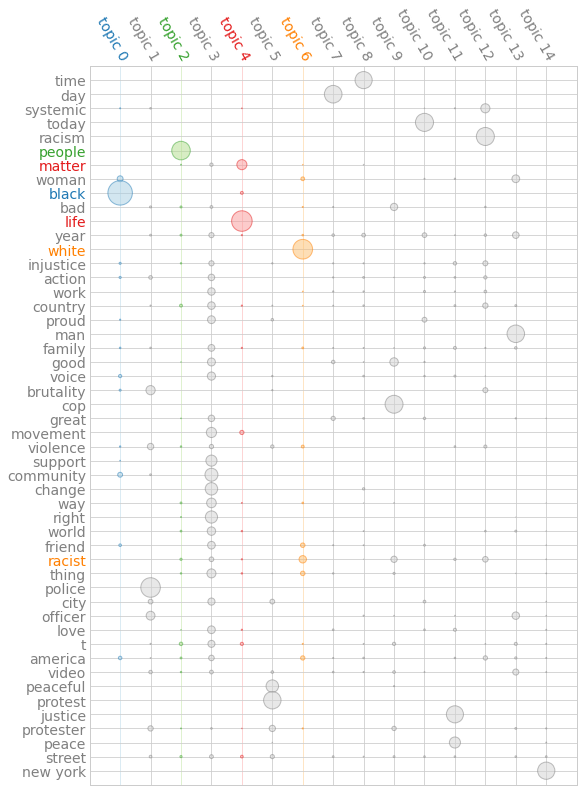

In [244]:
_ = model.termite_plot(doc_term_matrix, id_to_term, n_terms=50, highlight_topics=[0,1, 3, 5, 9])

In [245]:
#import the function CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Create our CountVectorizer object
countvec = CountVectorizer()

sklearn_dtm = countvec.fit_transform(df_analysis.liststring)
print(sklearn_dtm)

  (0, 44293)	3
  (0, 10985)	5
  (0, 42624)	7
  (0, 34107)	4
  (0, 39426)	12
  (0, 14013)	2
  (0, 40849)	457
  (0, 14703)	14
  (0, 12690)	15
  (0, 30204)	1
  (0, 54967)	7
  (0, 5622)	5
  (0, 53106)	11
  (0, 40457)	26
  (0, 22522)	30
  (0, 53537)	6
  (0, 24418)	20
  (0, 52781)	94
  (0, 58812)	6
  (0, 12987)	1
  (0, 25978)	166
  (0, 39022)	1
  (0, 25292)	9
  (0, 17073)	2
  (0, 17410)	1
  :	:
  (5, 6784)	1
  (5, 31026)	1
  (5, 43962)	1
  (5, 40861)	1
  (5, 8292)	1
  (5, 32630)	1
  (5, 50324)	1
  (5, 41557)	1
  (5, 42637)	1
  (5, 57853)	1
  (5, 39128)	1
  (5, 18452)	1
  (5, 40876)	1
  (5, 21554)	1
  (5, 624)	3
  (5, 517)	1
  (5, 15869)	1
  (5, 22662)	2
  (5, 519)	1
  (5, 15871)	1
  (5, 9369)	1
  (5, 520)	1
  (5, 15872)	1
  (5, 22664)	1
  (5, 55965)	1


In [246]:
print(countvec.get_feature_names()[-10])

zukerberg


In [247]:
dtm_df = pd.DataFrame(countvec.fit_transform(df_analysis.liststring).toarray(), columns=countvec.get_feature_names(), index = df_analysis.Theme)
dtm_df

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zukerberg,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz
Theme,,,,,,,,,,,,,,,,,,,,,
8CantWait,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8ToAbolition,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abolition,0,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BLM,152,172,1,1,1,1,1,2,28,1,...,1,1,3,1,1,3,1,1,1,1
Defund,8,40,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Reform,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
print(dtm_df.sum().sort_values(ascending=False))

black     28690
people    20467
this      20119
the       17882
we        17507
          ...  
lh            1
lhs           1
azlyn         1
liam          1
zz            1
Length: 59958, dtype: int64


In [249]:
#import the function
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvec = TfidfVectorizer()

#create the dtm, but with cells weigthed by the tf-idf score.
dtm_tfidf_df = pd.DataFrame(tfidfvec.fit_transform(df_analysis.liststring).toarray(), columns=tfidfvec.get_feature_names(), index = df_analysis.Theme)

#view results
dtm_tfidf_df

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zukerberg,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz
Theme,,,,,,,,,,,,,,,,,,,,,
8CantWait,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
8ToAbolition,0.000000,0.021352,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
Abolition,0.000000,0.002066,0.00000,0.00000,0.00000,0.001396,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
BLM,0.003679,0.002601,0.00003,0.00003,0.00003,0.000020,0.00003,0.000059,0.000827,0.00003,...,0.00003,0.00003,0.000073,0.00003,0.00003,0.000089,0.00003,0.00003,0.00003,0.00003
Defund,0.002250,0.007029,0.00000,0.00000,0.00000,0.000237,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000281,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
Reform,0.000000,0.003621,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000


In [250]:
print(dtm_tfidf_df.max().sort_values(ascending=False)[:20])

police      0.580458
policies    0.404221
black       0.359263
people      0.342251
urge        0.266572
this        0.251361
enact       0.248881
cops        0.247955
the         0.237202
need        0.235321
we          0.210220
it          0.197670
violence    0.190654
you         0.189335
reduce      0.188055
holmes      0.187963
local       0.179597
mayors      0.177352
gunfire     0.158691
joining     0.152658
dtype: float64


In [251]:
dtm_tfidf_df

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zukerberg,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz
Theme,,,,,,,,,,,,,,,,,,,,,
8CantWait,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
8ToAbolition,0.000000,0.021352,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
Abolition,0.000000,0.002066,0.00000,0.00000,0.00000,0.001396,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
BLM,0.003679,0.002601,0.00003,0.00003,0.00003,0.000020,0.00003,0.000059,0.000827,0.00003,...,0.00003,0.00003,0.000073,0.00003,0.00003,0.000089,0.00003,0.00003,0.00003,0.00003
Defund,0.002250,0.007029,0.00000,0.00000,0.00000,0.000237,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000281,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
Reform,0.000000,0.003621,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000


In [252]:
#Copy our tfidf df to a new df to add genre this is the one
dtm_tfidf_df_retweet = dtm_tfidf_df
dtm_tfidf_df_retweet['THEME'] = ["8cantwait", "8toAbolition", "abolition", "BLM", "defund", "reform"] 

In [253]:
dtm_tfidf_df_retweet

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz,THEME
Theme,,,,,,,,,,,,,,,,,,,,,
8CantWait,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,8cantwait
8ToAbolition,0.000000,0.021352,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,8toAbolition
Abolition,0.000000,0.002066,0.00000,0.00000,0.00000,0.001396,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,abolition
BLM,0.003679,0.002601,0.00003,0.00003,0.00003,0.000020,0.00003,0.000059,0.000827,0.00003,...,0.00003,0.000073,0.00003,0.00003,0.000089,0.00003,0.00003,0.00003,0.00003,BLM
Defund,0.002250,0.007029,0.00000,0.00000,0.00000,0.000237,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.000281,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,defund
Reform,0.000000,0.003621,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,reform


In [254]:
dtm_8cantwait = dtm_tfidf_df_retweet[dtm_tfidf_df_retweet['THEME']=="8cantwait"]

In [255]:
dtm_8cantwait

,00,000,0006,000and,000over,000thats,000to,005,00am,00amwhere,...,zulu,zumba,zumwalt,zuni,zuri,zurich,zuris,zy,zz,THEME
Theme,,,,,,,,,,,,,,,,,,,,,
8CantWait,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8cantwait


In [256]:
#pull out the reviews for three genres, Rap, Alternative/Indie Rock, and Jazz
dtm_8abo = dtm_tfidf_df_retweet[dtm_tfidf_df_retweet['THEME']=="8toAbolition"]
dtm_abo = dtm_tfidf_df_retweet[dtm_tfidf_df_retweet['THEME']=="abolition"]
dtm_defund = dtm_tfidf_df_retweet[dtm_tfidf_df_retweet['THEME']=="defund"]
dtm_reform = dtm_tfidf_df_retweet[dtm_tfidf_df_retweet['THEME']=="reform"]
dtm_blm = dtm_tfidf_df_retweet[dtm_tfidf_df_retweet['THEME']=="BLM"]
#print the words with the highest tf-idf scores for each genre
print("BLM")
print(dtm_blm.max(numeric_only=True).sort_values(ascending=False)[0:20])
print("8cantwait")
print(dtm_8cantwait.max(numeric_only=True).sort_values(ascending=False)[0:20])
print()
print("8toAbolition")
print(dtm_8abo.max(numeric_only=True).sort_values(ascending=False)[0:20])
print()
print("Abolition")
print(dtm_abo.max(numeric_only=True).sort_values(ascending=False)[0:20])
print("Defund")
print(dtm_defund.max(numeric_only=True).sort_values(ascending=False)[0:20])
print("Reform")
print(dtm_reform.max(numeric_only=True).sort_values(ascending=False)[0:20])

BLM
black      0.359263
people     0.244134
this       0.236862
the        0.208715
we         0.208689
you        0.189335
police     0.164110
it         0.159209
lives      0.148858
protest    0.135628
matter     0.126909
today      0.118824
white      0.117107
im         0.102562
dont       0.100256
like       0.098395
justice    0.093285
stand      0.090167
time       0.087703
support    0.086550
dtype: float64
8cantwait
policies    0.404221
police      0.383828
urge        0.266572
enact       0.248881
violence    0.190654
reduce      0.188055
we          0.187294
local       0.179597
mayors      0.177352
joining     0.152658
cities      0.149281
stake       0.144800
im          0.139421
results     0.138618
wait        0.125983
death       0.125983
power       0.125143
more        0.122623
learn       0.122623
join        0.122623
dtype: float64

8toAbolition
people       0.342251
police       0.268251
holmes       0.187963
gunfire      0.158691
cops         0.157250
bc          

In [257]:
def date_to_datetime(d):
    return dt.datetime(d.year,d.month,d.day)

In [258]:
def groupby_date(df):
    dfc = df.copy()
    dfc['date'] = pd.to_datetime(dfc['timestamp_utc'], unit= 's')
    return dfc

In [259]:
df_ma = groupby_date(master_df)

In [260]:
df_ca = df_ma

In [261]:
df_ca['date'] = pd.to_datetime(df_ca['date'])

In [262]:
df_ca['date'] = df_ca['date'].dt.strftime('%Y-%m-%d')

In [263]:
df_ca['date'] = pd.to_datetime(df_ca['date'])

In [264]:
df_ca = df_ca.loc[(df_ca['date'] >= '2020-05-25')
                     & (df_ca['date'] <= '2020-08-31')]

In [265]:
df_byfollow = df_ca.groupby(['date','Theme'])[['id']].count().unstack().fillna(0)

In [266]:
df_byfollow

id                                              
Theme      8CantWait 8ToAbolition Abolition      BLM Defund Reform
date                                                              
2020-05-25       0.0          0.0       0.0     30.0    0.0    0.0
2020-05-26       0.0          0.0       2.0    558.0    0.0    0.0
2020-05-27       0.0          0.0       3.0   1680.0    2.0    0.0
2020-05-28       0.0          0.0       7.0   3381.0    5.0    0.0
2020-05-29       0.0          0.0       8.0   5150.0    8.0    0.0
2020-05-30       0.0          0.0      19.0   6254.0   38.0    0.0
2020-05-31       1.0          0.0      56.0  10584.0  139.0    1.0
2020-06-01       0.0          0.0      35.0  11708.0  142.0    0.0
2020-06-02       1.0          0.0      29.0  14537.0  208.0    0.0
2020-06-03     233.0          0.0      26.0   8540.0  290.0    0.0
2020-06-04     362.0          0.0      54.0   8113.0  342.0    1.0
2020-06-05     176.0          0.0     127.0   8363.0  555.0    3.0
2020-06-06      71.0          0.0      83.0   7615.0  422.0    6.0
2020-06-07      52.0         11.0     131.0   5884.0  637.0   38.0
2020-06-08      37.0         12.0     120.0   5212.0  860.0   73.0
2020-06-09      19.0         17.0      74.0   3219.0  621.0   39.0
2020-06-10      22.0         12.0      49.0   2875.0  438.0   37.0
2020-06-11       5.0         10.0      24.0   2526.0  289.0   14.0
2020-06-12      16.0          3.0      30.0   2766.0  298.0   15.0
2020-06-13       4.0          6.0      35.0   2817.0  280.0   13.0
2020-06-14      11.0          2.0      28.0   3076.0  305.0   14.0
2020-06-15       5.0          6.0      21.0   2329.0  264.0   13.0
2020-06-16       5.0          2.0      23.0   1575.0  234.0   15.0
2020-06-17       3.0          4.0      18.0   1615.0  216.0    9.0
2020-06-18       3.0          4.0      28.0   1641.0  224.0    9.0
2020-06-19       6.0          3.0      27.0   3211.0  210.0   12.0
2020-06-20       1.0          3.0      27.0   2041.0  143.0    5.0
2020-06-21       2.0          4.0      15.0   1524.0  101.0    2.0
2020-06-22       2.0          1.0      25.0   1365.0  131.0    4.0
2020-06-23       2.0          1.0      26.0   1273.0  190.0    2.0
2020-06-24       2.0          3.0      30.0   1142.0  193.0    0.0
2020-06-25       1.0         13.0      31.0   1271.0  189.0    4.0
2020-06-26       1.0          1.0      22.0   1071.0  130.0    1.0
2020-06-27       0.0          4.0      16.0   1050.0  150.0    0.0
2020-06-28       2.0          2.0      22.0    979.0  105.0    2.0
2020-06-29       1.0          4.0      25.0    908.0  138.0    1.0
2020-06-30       0.0          2.0      11.0    921.0  152.0    0.0
2020-07-01       0.0          0.0       3.0    947.0  146.0    4.0
2020-07-02       0.0          1.0      20.0    896.0   83.0    2.0
2020-07-03       1.0          0.0      14.0    849.0   71.0    3.0
2020-07-04       1.0         11.0      19.0   1201.0   84.0    1.0
2020-07-05       1.0          2.0      19.0    925.0   80.0    2.0
2020-07-06       0.0          0.0       7.0    793.0   80.0    2.0
2020-07-07       2.0          1.0       9.0    678.0   75.0   14.0
2020-07-08       1.0          0.0       7.0    682.0   77.0    4.0
2020-07-09       2.0          0.0      12.0    712.0   75.0    0.0
2020-07-10       0.0          0.0      16.0    514.0   69.0    1.0
2020-07-11       1.0          0.0      39.0    498.0   55.0    2.0
2020-07-12       0.0          3.0      36.0    513.0   63.0    0.0
2020-07-13       2.0          4.0       7.0    530.0   78.0    1.0
2020-07-14       1.0          2.0      14.0    496.0   64.0    0.0
2020-07-15       2.0          1.0      16.0    473.0   73.0    1.0
2020-07-16       2.0          1.0      31.0    534.0  111.0    1.0
2020-07-17       1.0          0.0      15.0    519.0  101.0    1.0
2020-07-18       1.0          0.0      35.0    650.0   72.0    2.0
2020-07-19       0.0          0.0      23.0    423.0   79.0    0.0
2020-07-20       0.0          0.0       3.0    454.0   59.0    0.

In [267]:
import matplotlib.dates as mdates

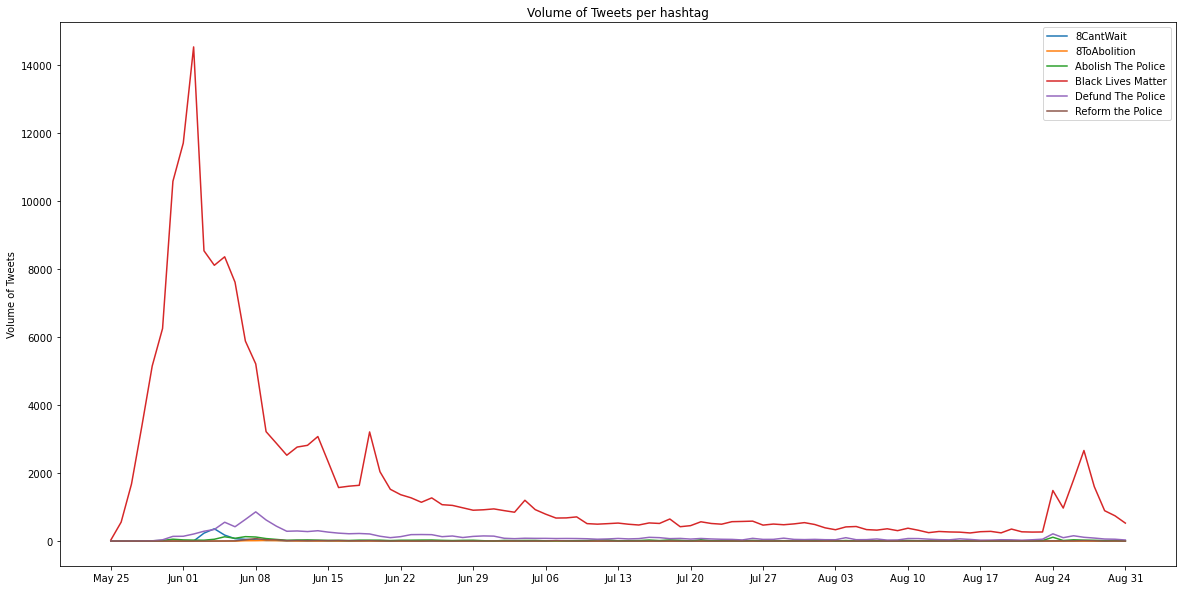

In [268]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(df_byfollow, linestyle='-')
ax.set_ylabel('Volume of Tweets')
ax.set_title('Volume of Tweets per hashtag')
ax.legend(["8CantWait","8ToAbolition","Abolish The Police", "Black Lives Matter", "Defund The Police","Reform the Police"])
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [269]:
df_byretweet = df_ca.groupby(['date','Theme'])[['retweet_count']].sum().unstack().fillna(0)

In [270]:
df_byretweet

retweet_count                                                \
Theme          8CantWait 8ToAbolition Abolition         BLM     Defund   
date                                                                     
2020-05-25           0.0          0.0       0.0    183311.0        0.0   
2020-05-26           0.0          0.0   35554.0   1239383.0        0.0   
2020-05-27           0.0          0.0     574.0   3436116.0      112.0   
2020-05-28           0.0          0.0   37644.0   7290754.0    34754.0   
2020-05-29           0.0          0.0       3.0   6840276.0      886.0   
2020-05-30           0.0          0.0  217479.0  10762722.0   258587.0   
2020-05-31           1.0          0.0  174206.0  14401901.0  1795476.0   
2020-06-01           0.0          0.0   74442.0  14423003.0  1026178.0   
2020-06-02         109.0          0.0  152610.0  11622408.0   640925.0   
2020-06-03       89465.0          0.0  316650.0  10467097.0   711111.0   
2020-06-04      421144.0          0.0  421603.0   8397033.0  1422098.0   
2020-06-05      369431.0          0.0  740124.0   7331891.0  1988494.0   
2020-06-06        6284.0          0.0  421799.0   4051082.0   999451.0   
2020-06-07         477.0         31.0  554303.0   3588588.0  1582231.0   
2020-06-08       95532.0      82271.0  191481.0   2641970.0   769949.0   
2020-06-09         765.0        274.0  418523.0   2652006.0  1205964.0   
2020-06-10        1692.0      67269.0    5070.0   1647902.0   705205.0   
2020-06-11          10.0        130.0  110560.0   2833429.0   778142.0   
2020-06-12         284.0          0.0   59072.0   2337956.0   254030.0   
2020-06-13           8.0        222.0  152197.0   1561803.0   321652.0   
2020-06-14       36995.0          0.0  398982.0   2807566.0   480508.0   
2020-06-15          22.0      24361.0  191466.0   1428095.0   224821.0   
2020-06-16          13.0         12.0    6728.0   1728617.0   872056.0   
2020-06-17           1.0         70.0  166964.0   1291994.0   547767.0   
2020-06-18           4.0        684.0   27142.0    854145.0   476185.0   
2020-06-19          51.0         50.0   64730.0   1316480.0   352240.0   
2020-06-20           0.0          4.0  128900.0    760776.0   143213.0   
2020-06-21           0.0          3.0   20613.0    905869.0   309985.0   
2020-06-22           0.0          2.0  166424.0   1173461.0   463253.0   
2020-06-23           1.0          0.0  307147.0   1199207.0   299029.0   
2020-06-24       27026.0          1.0   59989.0    723911.0   388640.0   
2020-06-25           0.0        135.0   20695.0    600126.0   253323.0   
2020-06-26           0.0       1595.0    9633.0    330514.0   288929.0   
2020-06-27           0.0        118.0     273.0    777907.0    75852.0   
2020-06-28           2.0      65032.0  188230.0   1113268.0   379254.0   
2020-06-29           6.0       7169.0   46007.0    940950.0   190778.0   
2020-06-30           0.0          0.0    1083.0    701233.0   105737.0   
2020-07-01           0.0          0.0       1.0    355044.0    37895.0   
2020-07-02           0.0          0.0      79.0   1010951.0    28529.0   
2020-07-03           0.0          0.0   65368.0    690093.0    69065.0   
2020-07-04           0.0          8.0   15677.0    822496.0   155198.0   
2020-07-05           0.0        183.0   21769.0   1553236.0   315288.0   
2020-07-06           0.0          0.0   36898.0    301419.0    15623.0   
2020-07-07           0.0          4.0   26903.0    273484.0    91655.0   
2020-07-08           1.0          0.0     385.0    123834.0    17031.0   
2020-07-09           2.0          0.0      42.0    272779.0    89432.0   
2020-07-10           0.0          0.0     254.0    158468.0     4144.0   
2020-07-11           0.0          0.0     133.0    247074.0    53039.0   
2020-07-12           0.0          6.0    9501.0    124949.0   193926.0   
2020-07-13           0.0       3120.0     419.0    226314.0    94271.0   
2020-07-14           0.0      20917.0   21273.0    302057.0    88448.0   
2020-07-15     

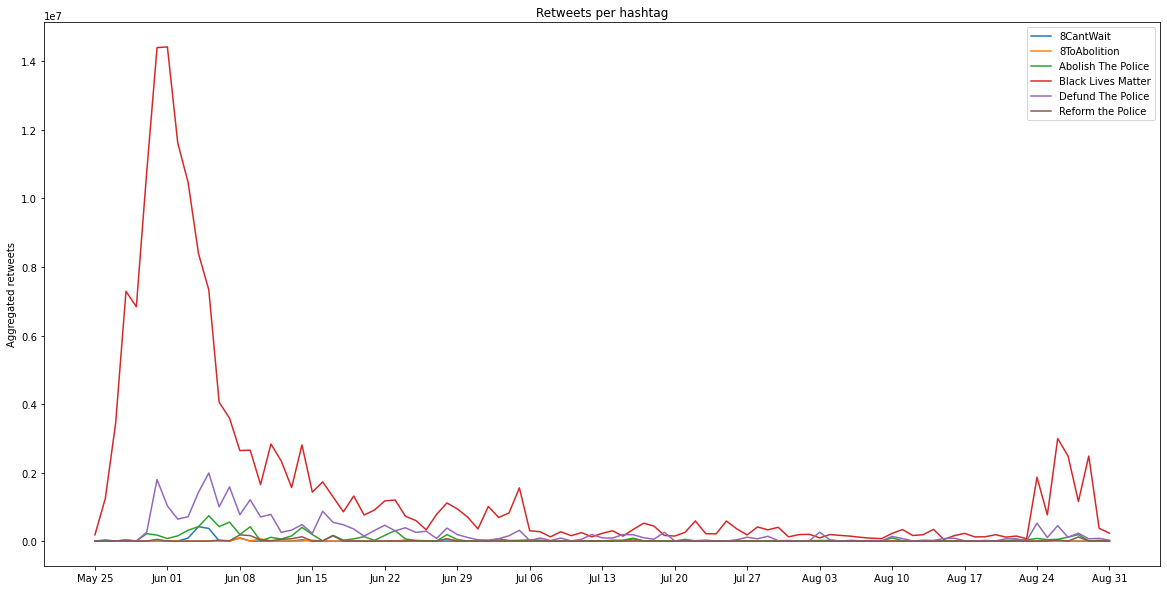

In [271]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(df_byretweet, linestyle='-')
ax.set_ylabel('Aggregated retweets')
ax.set_title('Retweets per hashtag')
ax.legend(["8CantWait","8ToAbolition","Abolish The Police", "Black Lives Matter", "Defund The Police","Reform the Police"])
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [272]:
df_userfollowers = df_ca.groupby(['date','Theme']).agg({'user_followers': ['mean', 'median','max','min']}).unstack().fillna(0) 

In [273]:
df_userfollowers

user_followers                                             \
                     mean                                              
Theme           8CantWait  8ToAbolition     Abolition            BLM   
date                                                                   
2020-05-25   0.000000e+00  0.000000e+00  0.000000e+00   61245.533333   
2020-05-26   0.000000e+00  0.000000e+00  4.615000e+03  702813.098566   
2020-05-27   0.000000e+00  0.000000e+00  1.655000e+03  154217.061905   
2020-05-28   0.000000e+00  0.000000e+00  1.120657e+04  148235.483289   
2020-05-29   0.000000e+00  0.000000e+00  1.688125e+03  406993.473204   
2020-05-30   0.000000e+00  0.000000e+00  6.316947e+04  150786.202590   
2020-05-31   8.400000e+01  0.000000e+00  3.384974e+05  123991.135771   
2020-06-01   0.000000e+00  0.000000e+00  3.744717e+05  267098.457123   
2020-06-02   7.530000e+02  0.000000e+00  1.028582e+05  122046.256036   
2020-06-03   2.379005e+05  0.000000e+00  1.238278e+05  261781.673888   
2020-06-04   1.689020e+05  0.000000e+00  3.489076e+05  262323.101319   
2020-06-05   4.342300e+05  0.000000e+00  4.329580e+05  223889.170633   
2020-06-06   1.594649e+04  0.000000e+00  8.331086e+05  176604.129481   
2020-06-07   1.254463e+04  1.626364e+03  6.233009e+05  177842.168593   
2020-06-08   9.997284e+04  1.241375e+04  8.316593e+05  125194.391788   
2020-06-09   3.603984e+04  6.141235e+03  4.048926e+04  216683.046909   
2020-06-10   7.848105e+04  4.580233e+04  6.292910e+04  343118.921391   
2020-06-11   1.431400e+03  1.000240e+04  1.464444e+05  330904.054236   
2020-06-12   4.030812e+03  7.463333e+02  2.406149e+05  253784.315257   
2020-06-13   1.867750e+03  1.549233e+04  5.767726e+04  223245.515087   
2020-06-14   1.297599e+05  5.632000e+03  5.539171e+04  259960.047789   
2020-06-15   5.481200e+03  1.807000e+03  2.336000e+03  224987.909833   
2020-06-16   3.698000e+03  9.339000e+03  8.178817e+04  226996.800635   
2020-06-17   3.755333e+03  3.048000e+03  1.560950e+04  337617.027245   
2020-06-18   1.017000e+03  7.410750e+03  7.225382e+05  161620.650823   
2020-06-19   9.009500e+03  1.727467e+04  2.678173e+06  306661.644036   
2020-06-20   3.107000e+03  3.233000e+03  4.208019e+04  120949.906418   
2020-06-21   1.771500e+03  3.633500e+03  3.448466e+05  220324.908136   
2020-06-22   2.852500e+03  2.096000e+03  5.030702e+05  544521.324542   
2020-06-23   1.361790e+05  9.670000e+02  7.713278e+05  232261.189317   
2020-06-24   6.085120e+05  9.596667e+02  1.607444e+05  300200.163748   
2020-06-25   6.280000e+02  1.833585e+04  5.151832e+04  288525.030685   
2020-06-26   8.300000e+01  5.240831e+07  3.091810e+05  209592.794585   
2020-06-27   0.000000e+00  2.669875e+04  5.394485e+05  127416.748571   
2020-06-28   1.100000e+01  9.580800e+04  3.448241e+04  200795.938713   
2020-06-29   4.230000e+02  2.751500e+03  5.477239e+05  359309.579295   
2020-06-30   0.000000e+00  8.190000e+02  1.284191e+04  150763.279045   
2020-07-01   0.000000e+00  0.000000e+00  9.406667e+02  148474.407603   
2020-07-02   0.000000e+00  8.190000e+02  2.637255e+04  369972.363839   
2020-07-03   2.735000e+03  0.000000e+00  9.405070e+05  389961.071849   
2020-07-04   4.720000e+02  1.824000e+03  2.691168e+04  369318.480433   
2020-07-05   1.410000e+02  2.105950e+04  5.173503e+05  258604.307027   
2020-07-06   0.000000e+00  0.000000e+00  2.800587e+06  288687.163934   
2020-07-07   2.300000e+02  5.120000e+02  3.858678e+04  309121.036873   
2020-07-08   3.440000e+02  0.000000e+00  9.276671e+04  242545.539589   
2020-07-09   4.420000e+02  0.000000e+00  8.046417e+03  461253.776685   
2020-07-10   0.000000e+00  0.000000e+00  3.525456e+04  248676.077821   
2020-07-11   1.623000e+03  0.000000e+00  3.149597e+04  118097.857430   
2020-07-12   0.000000e+00  1.374000e+03  5.897689e+04  143910.832359   
2020-07-13   3.445000e+02  1.116771e+06  4.380357e+04  253440.245283   
2020-07-14   1.410000e+02  9.513013e+06  1.390963e+06  205779.756048   
2020-07-15   1.226622e+06  9.339000e+03  1.287825e+

In [274]:
df_byuserbase_mean = df_ca.groupby(['date','Theme'])[['user_followers']].mean().unstack().fillna(0)

In [275]:
df_byuserbase_mean

user_followers                                             \
Theme           8CantWait  8ToAbolition     Abolition            BLM   
date                                                                   
2020-05-25   0.000000e+00  0.000000e+00  0.000000e+00   61245.533333   
2020-05-26   0.000000e+00  0.000000e+00  4.615000e+03  702813.098566   
2020-05-27   0.000000e+00  0.000000e+00  1.655000e+03  154217.061905   
2020-05-28   0.000000e+00  0.000000e+00  1.120657e+04  148235.483289   
2020-05-29   0.000000e+00  0.000000e+00  1.688125e+03  406993.473204   
2020-05-30   0.000000e+00  0.000000e+00  6.316947e+04  150786.202590   
2020-05-31   8.400000e+01  0.000000e+00  3.384974e+05  123991.135771   
2020-06-01   0.000000e+00  0.000000e+00  3.744717e+05  267098.457123   
2020-06-02   7.530000e+02  0.000000e+00  1.028582e+05  122046.256036   
2020-06-03   2.379005e+05  0.000000e+00  1.238278e+05  261781.673888   
2020-06-04   1.689020e+05  0.000000e+00  3.489076e+05  262323.101319   
2020-06-05   4.342300e+05  0.000000e+00  4.329580e+05  223889.170633   
2020-06-06   1.594649e+04  0.000000e+00  8.331086e+05  176604.129481   
2020-06-07   1.254463e+04  1.626364e+03  6.233009e+05  177842.168593   
2020-06-08   9.997284e+04  1.241375e+04  8.316593e+05  125194.391788   
2020-06-09   3.603984e+04  6.141235e+03  4.048926e+04  216683.046909   
2020-06-10   7.848105e+04  4.580233e+04  6.292910e+04  343118.921391   
2020-06-11   1.431400e+03  1.000240e+04  1.464444e+05  330904.054236   
2020-06-12   4.030812e+03  7.463333e+02  2.406149e+05  253784.315257   
2020-06-13   1.867750e+03  1.549233e+04  5.767726e+04  223245.515087   
2020-06-14   1.297599e+05  5.632000e+03  5.539171e+04  259960.047789   
2020-06-15   5.481200e+03  1.807000e+03  2.336000e+03  224987.909833   
2020-06-16   3.698000e+03  9.339000e+03  8.178817e+04  226996.800635   
2020-06-17   3.755333e+03  3.048000e+03  1.560950e+04  337617.027245   
2020-06-18   1.017000e+03  7.410750e+03  7.225382e+05  161620.650823   
2020-06-19   9.009500e+03  1.727467e+04  2.678173e+06  306661.644036   
2020-06-20   3.107000e+03  3.233000e+03  4.208019e+04  120949.906418   
2020-06-21   1.771500e+03  3.633500e+03  3.448466e+05  220324.908136   
2020-06-22   2.852500e+03  2.096000e+03  5.030702e+05  544521.324542   
2020-06-23   1.361790e+05  9.670000e+02  7.713278e+05  232261.189317   
2020-06-24   6.085120e+05  9.596667e+02  1.607444e+05  300200.163748   
2020-06-25   6.280000e+02  1.833585e+04  5.151832e+04  288525.030685   
2020-06-26   8.300000e+01  5.240831e+07  3.091810e+05  209592.794585   
2020-06-27   0.000000e+00  2.669875e+04  5.394485e+05  127416.748571   
2020-06-28   1.100000e+01  9.580800e+04  3.448241e+04  200795.938713   
2020-06-29   4.230000e+02  2.751500e+03  5.477239e+05  359309.579295   
2020-06-30   0.000000e+00  8.190000e+02  1.284191e+04  150763.279045   
2020-07-01   0.000000e+00  0.000000e+00  9.406667e+02  148474.407603   
2020-07-02   0.000000e+00  8.190000e+02  2.637255e+04  369972.363839   
2020-07-03   2.735000e+03  0.000000e+00  9.405070e+05  389961.071849   
2020-07-04   4.720000e+02  1.824000e+03  2.691168e+04  369318.480433   
2020-07-05   1.410000e+02  2.105950e+04  5.173503e+05  258604.307027   
2020-07-06   0.000000e+00  0.000000e+00  2.800587e+06  288687.163934   
2020-07-07   2.300000e+02  5.120000e+02  3.858678e+04  309121.036873   
2020-07-08   3.440000e+02  0.000000e+00  9.276671e+04  242545.539589   
2020-07-09   4.420000e+02  0.000000e+00  8.046417e+03  461253.776685   
2020-07-10   0.000000e+00  0.000000e+00  3.525456e+04  248676.077821   
2020-07-11   1.623000e+03  0.000000e+00  3.149597e+04  118097.857430   
2020-07-12   0.000000e+00  1.374000e+03  5.897689e+04  143910.832359   
2020-07-13   3.445000e+02  1.116771e+06  4.380357e+04  253440.245283   
2020-07-14   1.410000e+02  9.513013e+06  1.390963e+06  205779.756048   
2020-07-15   1.226622e+06  9.339000e+03  1.287825e+06  302120.050740   
2020-07-16   6.640000e+02  9.339000e+03  4.809365e+

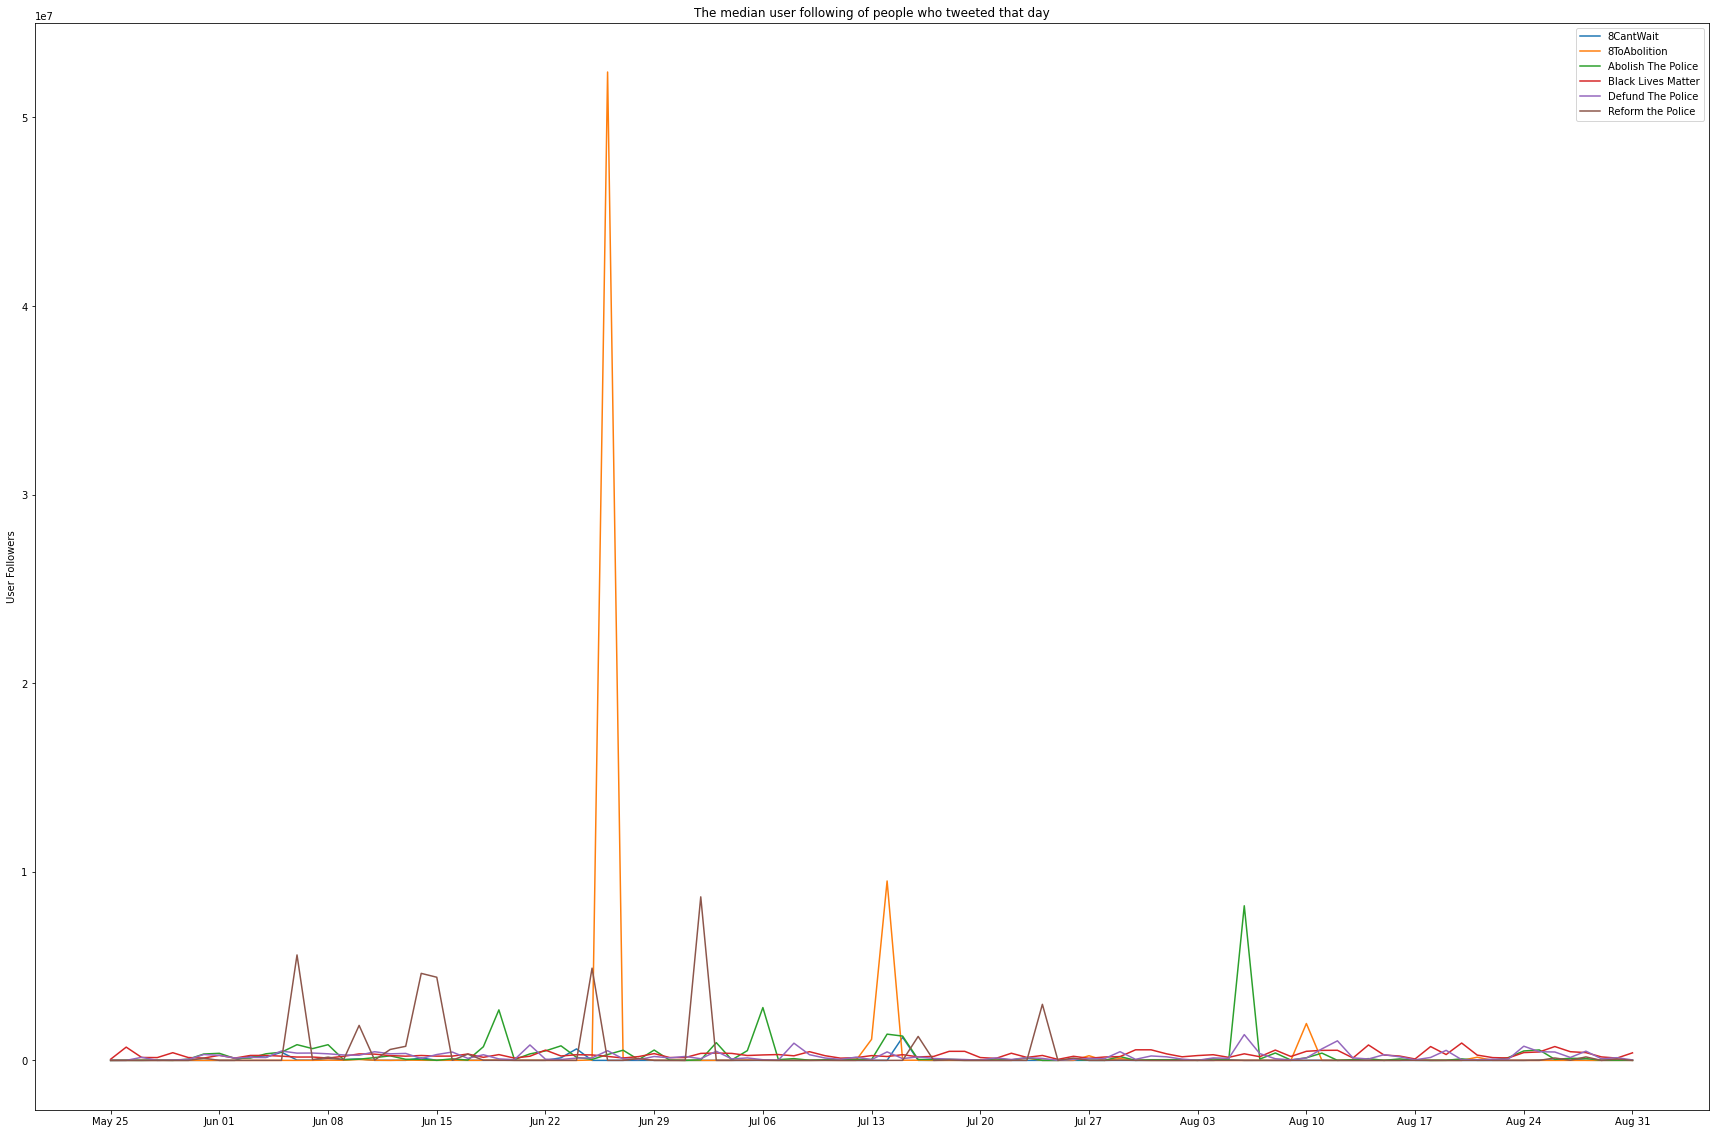

In [276]:
fig, ax = plt.subplots(figsize = (30,20))
ax.plot(df_byuserbase_mean, linestyle='-')
ax.set_ylabel('User Followers')
ax.set_title('The median user following of people who tweeted that day')
ax.legend(["8CantWait","8ToAbolition","Abolish The Police","Black Lives Matter", "Defund The Police","Reform the Police"])
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [277]:
df_authors = df_ca.groupby(['date','Theme'])['user_id'].nunique().unstack().fillna(0)

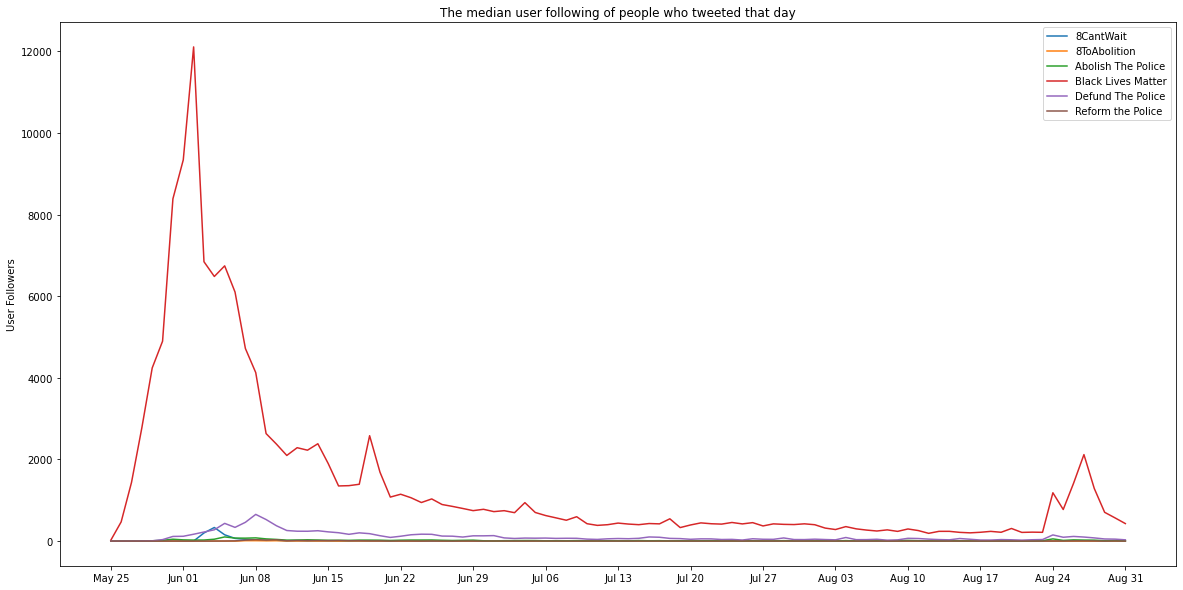

In [278]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(df_authors, linestyle='-')
ax.set_ylabel('User Followers')
ax.set_title('The median user following of people who tweeted that day')
ax.legend(["8CantWait","8ToAbolition","Abolish The Police", "Black Lives Matter", "Defund The Police","Reform the Police"])
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [279]:
tweets_w1

,id,timestamp_utc,local_time,user_screen_name,text,possibly_sensitive,retweet_count,like_count,reply_count,lang,...,links,domains,media_urls,media_files,media_types,mentioned_names,mentioned_ids,hashtags,date,hashtag
164,1266751520055459847,1590852072,2020-05-30T15:21:12,greg_doucette,to simplify following criminal justice news hours i posted set links police brutality videos facebook can t here obvsso i m putting thread,0,67631,98716,1277,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-30,[]
1093,1269214683938066435,1591439336,2020-06-06T10:28:56,guardian,teargas pepper spray accelerate spread covid 19 doctors warn,0,281,363,31,en,...,https://www.theguardian.com/us-news/2020/jun/06/teargas-coronavirus-george-floyd-protests?CMP=twt_gu#Echobox=1591439335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-06,[Echobox]
2004,1265393180922576897,1590528218,2020-05-26T21:23:38,realbezaleel,so denzel paid chadwick boseman s tuition this speech moving denzel emotional,0,18375,71309,427,en,...,https://twitter.com/realbezaleel/status/1265393180922576897/video/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-26,[]
3232,1269365236907343874,1591475230,2020-06-06T20:27:10,CoachKALoney,we turmoil were,0,13,113,10,en,...,https://twitter.com/CoachKALoney/status/1269365236907343874/photo/1,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter|JusticeforBreonnaTaylor|LibertyAndJusticeForAll,2020-06-06,"[BlackLivesMatter, JusticeforBreonnaTaylor, LibertyAndJusticeForAll]"
4641,1267535690004299783,1591039032,2020-06-01T19:17:12,EmmettJohnson_,more than just an athlete,1,7,29,0,en,...,https://twitter.com/emmetthoops1/status/1267535690004299783/photo/1,NaN,NaN,NaN,NaN,NaN,NaN,Blacklivesmatter|JusticeForGeorgeFloyd,2020-06-01,"[JusticeForGeorgeFloyd, Blacklivesmatter]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176172,1264945272846725127,1590421429,2020-05-25T15:43:49,VolviEinhorn,police ppl looking powerthey officially discriminate minority groups so time i m going defend baby action i m aware talking,0,0,0,0,en,...,NaN,NaN,NaN,NaN,NaN,ShlomoFelber,1259485461384437760,BlackLivesMatter|Chasidimlivesmatter,2020-05-25,"[BlackLivesMatter, Chasidimlivesmatter]"
176173,1264932760227065857,1590418446,2020-05-25T14:54:06,SociologistRay,on black americans continue reminded little sworn protect serve value humanity bodies minds enslaved purple heart bronze star granddaddy deaths,0,4,8,1,en,...,https://thehill.com/homenews/state-watch/499004-officer-fired-for-saying-its-unfortunate-more-black-people-didnt-die-of,NaN,NaN,NaN,NaN,NaN,NaN,BlackLivesMatter|COVID19|MemorialDay|TuskegeeAirmen,2020-05-25,"[MemorialDay, BlackLivesMatter, TuskegeeAirmen, COVID19]"
176174,1264745739340546050,1590373856,2020-05-25T02:30:56,CaliCre8ive,thanks organizing event empowering speakers left feeling inspired onward victory,0,5,12,1,en,...,NaN,NaN,NaN,NaN,NaN,BLMLA|GroundGameLA|PplsCityCouncil,2940882906|841881274352582656|1253939558514692098,BlackLivesMatter|CareNotCops|PeoplesBudgetLA,2020-05-25,"[PeoplesBudgetLA, CareNotCops, BlackLivesMatter]"
176175,1264727378691076097,1590369479,2020-05-25T01:17:59,PoeticXJustin,being black america worlds dangerous game,0,35,82,2,en,...,https://twitter.com/PoeticXJustin/status/1264727378691076097/photo/1,NaN,https://pbs.twimg.com/media/EY021jCWoAEy9qr.jpg|https://pbs.twimg.com/media/EY021kRWkAELx7N.jpg|https://pbs.twimg.com/media/EY021jJWoAEWtJq.jpg|https://pbs.twimg.com/media/EY021jbXgAchFzG.jpg,1264727378691076097_EY021jCWoAEy9qr.jpg|1264727378691076097_EY021kRWkAELx7N.jpg|1264727378691076097_EY021jJWoAEWtJq.jpg|1264727378691076097_EY021jbXgAchFzG.jpg,photo|photo|photo|photo,NaN,NaN,blacklivesmatter|blacman,2020-05-25,"[blacklivesmatter, blacman]"


In [280]:
! pip install shifterator

In [281]:
import shifterator as sh

In [282]:
df["retweet_count"].describe()

count    1.761770e+05
mean     9.421375e+02
std      1.134089e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.027389e+06
Name: retweet_count, dtype: float64

In [283]:
df_1 = df[(df["retweet_count"] > 50000)]

In [284]:
len(df_1)

903

In [285]:
df_2 = df[(df["retweet_count"] <= 50000) & (df["retweet_count"] > 1000)]

In [286]:
len(df_2)

6121

In [287]:
df_3 = df[(df["retweet_count"] <= 1000) & (df["retweet_count"] > 100)]

In [288]:
len(df_3)

4894

In [289]:
df_4 = df[(df["retweet_count"] <= 100) & (df["retweet_count"] > 0)]

In [290]:
len(df_4)

52204

In [291]:
df_5 = df[(df["retweet_count"] == 0)]

In [292]:
len(df_5)

112055

In [293]:
doc_1 = list(df_1['text'].str.lower())

In [294]:
type(doc_1)

list

In [295]:
doc_1 = list(df_1['text'].str.lower())
doc_2 = list(df_2['text'].str.lower())
doc_3 = list(df_3['text'].str.lower())
doc_4 = list(df_4['text'].str.lower())
doc_5 = list(df_5['text'].str.lower())

In [296]:
corpus = [doc_1, doc_2, doc_3, doc_4, doc_5]

In [297]:
! pip install wordcloud

In [298]:
all_words = ' '.join([word for word in df_1['clean_text']])

KeyError: 'clean_text'

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
all_words = ' '.join([word for word in df_2['clean_text']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
all_words = ' '.join([word for word in df_3['clean_text']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
all_words = ' '.join([word for word in df_4['clean_text']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
all_words = ' '.join([word for word in df_5['clean_text']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
nltk.download('punkt')

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
all_words = ' '.join([word for word in df_1['clean_text']])
words = nltk.word_tokenize(all_words)
fd = FreqDist(words)

In [ ]:
fd.most_common(10)

In [ ]:
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))
import seaborn as sns
sns.set_theme(style="ticks")
sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [ ]:
all_words = ' '.join([word for word in df_2['clean_text']])
words = nltk.word_tokenize(all_words)
fd = FreqDist(words)
top_10 = fd.most_common(10)
fdist = pd.Series(dict(top_10))
sns.set_theme(style="ticks")
sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [ ]:
all_words = ' '.join([word for word in df_3['clean_text']])
words = nltk.word_tokenize(all_words)
fd = FreqDist(words)
top_10 = fd.most_common(10)
fdist = pd.Series(dict(top_10))
sns.set_theme(style="ticks")
sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [ ]:
all_words = ' '.join([word for word in df_4['clean_text']])
words = nltk.word_tokenize(all_words)
fd = FreqDist(words)
top_10 = fd.most_common(10)
fdist = pd.Series(dict(top_10))
sns.set_theme(style="ticks")
sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [ ]:
all_words = ' '.join([word for word in df_5['clean_text']])
words = nltk.word_tokenize(all_words)
fd = FreqDist(words)
top_10 = fd.most_common(10)
fdist = pd.Series(dict(top_10))
sns.set_theme(style="ticks")
sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [ ]:
doc_1 = list(df_1['clean_text'].str.lower())
doc_2 = list(df_2['clean_text'].str.lower())
doc_3 = list(df_3['clean_text'].str.lower())
doc_4 = list(df_4['clean_text'].str.lower())
doc_5 = list(df_5['clean_text'].str.lower())

In [ ]:
res_1 = ' '.join([str(item) for item in doc_1]) 

In [ ]:
res_2 = ' '.join([str(item) for item in doc_2]) 
res_3 = ' '.join([str(item) for item in doc_3]) 
res_4 = ' '.join([str(item) for item in doc_4]) 
res_5 = ' '.join([str(item) for item in doc_5]) 

In [ ]:
texts = [res_1,res_2, res_3, res_4, res_5]

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X = vectorizer.fit_transform(texts)

In [ ]:
print(vectorizer.get_feature_names())

In [ ]:
type(texts)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

In [ ]:
X = count_vectorizer.fit_transform(texts)

In [ ]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

In [ ]:
# We'll make a new vectorizer
count_vectorizer = CountVectorizer(stop_words='english')
#count_vectorizer = CountVectorizer(stop_words=['the', 'and'])
# .fit_transfer TOKENIZES and COUNTS
X = count_vectorizer.fit_transform(texts)
print(count_vectorizer.get_feature_names())

In [ ]:
def boring_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    return words

count_vectorizer = CountVectorizer(stop_words='english', tokenizer=boring_tokenizer)
X = count_vectorizer.fit_transform(texts)
print(count_vectorizer.get_feature_names())

In [ ]:
porter_stemmer = PorterStemmer()

def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

count_vectorizer = CountVectorizer(stop_words='english', tokenizer=stemming_tokenizer)
X = count_vectorizer.fit_transform(texts)
print(count_vectorizer.get_feature_names())

In [ ]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=stemming_tokenizer, use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(texts)
pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=stemming_tokenizer, use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(texts)
pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())

In [ ]:
type(texts)

In [ ]:
texts

In [ ]:
type(corpus)

In [ ]:
# Now we tf_idf them and after topic modelling to see what it looks like

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.set_option("max_rows", 600)
from pathlib import Path  
import glob

In [ ]:
tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')

In [ ]:
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)

In [ ]:
texts = np.array(df['text']) #text contents in dataframe to array for processing
vocab_length = len(nltk.word_tokenize(list(itertools.chain.from_iterable(texts)))) #concatenate all the texts and tokenize the whole corpus

vectorizer = TfidfVectorizer(ngram_range = (1,3), max_features = vocab_length) #make Tfidf Vectorizer
tfidf_encodings = vectorizer.fit_transform(texts) #encode the text
                   
df['tfidf'] = list(tfidf_encodings.toarray()) #vectorized texts to dense list format for storage in dataframe

vectors_for_training = np.array(df['tfidf'].tolist()) #get the vectors back out of the dataframe for use in something else
X_train, y_train, X_test, y_test = train_test_split(vectors_for_training, df['hashtag'].tolist())

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(df.tfidf.tolist())

In [ ]:
df_2 = df[(df["retweet_count"] > 50000) &]

In [ ]:
filterinfDataframe = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
tweets = df['text']

In [ ]:
tweets.head()

In [ ]:
#I now extract adjectives and nouns from the tweets

In [ ]:
type(tweets)

In [ ]:
type(tweets[1])

In [ ]:
doc = nlp(df['text'])

In [ ]:
adjectives = []

for i in range (len(tweets)): 
    tweet = tweets[i]
    doc = nlp(tweet)
    
    adjective = [token.text
                  for token in doc
                  if (token.pos_ == 'ADJ')]
    adjectives.extend(adjective)

In [ ]:
from collections import Counter

In [ ]:
adj_freq = Counter(adjectives)
common_adj = adj_freq.most_common(40)
print (common_adj)

In [ ]:
nouns = []

for i in range (len(tweets)): 
    tweet = tweets[i]
    doc = nlp(tweet)
    
    noun = [token.text
                  for token in doc
                  if (token.pos_ == 'NOUN')]
    nouns.extend(noun)

In [ ]:
noun_freq = Counter(nouns)
common_noun = noun_freq.most_common(40)
print (common_noun)

In [ ]:
verbs = []

for i in range (len(tweets)): 
    tweet = tweets[i]
    doc = nlp(tweet)
    
    verb = [token.text
                  for token in doc
                  if (token.pos_ == 'VERB')]
    verbs.extend(verb)

In [ ]:
verb_freq = Counter(verbs)
common_verb = verb_freq.most_common(40)
print (common_verb)

In [ ]:
df_engagement = df[df['retweet_count'] >= 5000] 

In [ ]:
df_engagement.head()

In [ ]:
len(df_engagement)

In [ ]:
df_followers = df[df['user_followers'] >= 50000] 

In [ ]:
len(df_followers)

In [ ]:
df_followers_m = df[df['user_followers'] >= 1000000] 

In [ ]:
df_followers['retweet_count'].describe()

In [ ]:
df_followers_m['retweet_count'].describe()

In [ ]:
# Topic modeling with more than 1 million followers 

In [ ]:
import textacy.tm

In [ ]:
df_followers_m = df_followers_m[df_followers_m['text'].notna()]
documents_m = list(df_followers_m['text'].str.lower())
## instantiate the corpus object
lang = 'en_core_web_sm'
corpus = textacy.Corpus(lang)
for item in ['parser']:
  if item in corpus.spacy_lang.pipe_names:
      corpus.spacy_lang.remove_pipe(item)
## add the documents 
corpus.add_texts(documents_m)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

In [ ]:
# Topic modeling with less than 1000  followers 

In [ ]:
df_followers_b = df[df['user_followers'] <= 1000] 

In [ ]:
df_followers_b['retweet_count'].describe()

In [ ]:
df_followers_b = df_followers_b[df_followers_b['text'].notna()]
documents_b = list(df_followers_b['text'].str.lower())
## instantiate the corpus object
lang = 'en_core_web_sm'
corpus = textacy.Corpus(lang)
for item in ['parser']:
  if item in corpus.spacy_lang.pipe_names:
      corpus.spacy_lang.remove_pipe(item)
## add the documents 
corpus.add_texts(documents_b)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

In [ ]:
len(df_followers_m)

In [ ]:
df_engagement = df_engagement[df_engagement['text'].notna()]
documents_e = list(df_engagement['text'].str.lower())
## instantiate the corpus object
lang = 'en_core_web_sm'
corpus = textacy.Corpus(lang)
for item in ['parser']:
  if item in corpus.spacy_lang.pipe_names:
      corpus.spacy_lang.remove_pipe(item)
## add the documents 
corpus.add_texts(documents_e)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

In [ ]:
import gensim
import json
import pandas as pd
import gensim.downloader as api
import matplotlib.pyplot as plt

In [ ]:
#Let us now look at tweets that have gotten the most engagement, we're gonna code an engamenet function that functions like this

engagement = []
for tweet in df:
    if df[df['retweet_count']]>= 1000:
        engagement.concat(tweet)
    elif df[df['like_count']]>= 5000:
        engagement.concat(tweet)

In [ ]:
#Here goes nothing let's try the temporal analysis 

In [ ]:
import altair as alt
import datetime as dt
import pandas as pd
import numpy as np
import streamlit as st
import math
import json


In [ ]:
def date_to_datetime(d):
    return dt.datetime(d.year,d.month,d.day)

In [ ]:
def find_out_tweet_type(row):
    if type(row['retweeted_id']) == str:
        return 'retweet'
    if type(row['quoted_id']) == str:
        return 'quote'
    if type(row['to_userid']) == str:
        return 'reply'
    else:
        return 'regulartweet'

In [ ]:
def groupby_user(df):
    dfc = df.copy()
    dfc['ts_dt'] = pd.to_datetime(dfc['timestamp_utc'], unit= 's')    
    dfc = dfc.set_index("ts_dt")
    grouper = dfc.groupby([pd.Grouper(freq='1W'), 'user_followers'])
    result = grouper['user_followers'].sum().unstack('user_followers').fillna(0)
    existing_tweettypes = list(result.columns)
    result['total'] = 0
    for tweettype in existing_tweettypes:
        result['total'] += result[tweettype]
    result["datetime"] = result.index
    return result

In [ ]:
groupby_user(df_followers_m)

In [ ]:
train_df['text'] = train_df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

In [ ]:
x = df['user_followers']
y = df['retweet_count']
plt.scatter(x, y)
plt.show()

In [ ]:
from scipy import stats

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)